<a href="https://colab.research.google.com/github/stratos-karas/hello-world/blob/master/final_Dataset_B10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Δομή notebook**

Η δομή που έχει ακολουθηθεί στο notebook δεν είναι ίδια με τη ζητούμενη και αυτό επειδή βγήκε πιο φυσικό να επικεντρωνόμαστε στον κάθε ταξινομητή για baseline classification και βελτιστοποίηση και μετά να προχωρούμε στον επόμενο.

---
Επομένως η δομή που ακολουθήθηκε είναι η εξής:
1. Ομάδα
2. Απαιτούμενα
3. Εισαγωγή του Dataset
4. Ταξινομητής:
    1. Baseline Classification(Καμία βελτιστοποίηση)
    2. Βελτιστοποίηση Ταξινομητή:
        1. CV και Optimizaion
        2. Progressive Optimization:
            1. Βέλτιστος Εκτιμητής
            2. Παρουσίαση score βέλτιστου εκτιμητή
5. Επίλογος
---

Για την εξαγωγή συμπερασμάτων κατά την εκπαίδευση των εκτιμητών έχουμε δύο μεθόδους:
* **Αναλυτική Παρουσίαση**, αποτελέιται από αναγραφή του χρόνου από τη στιγμή της εκπαίδευσης μέχρι τη στιγμή που έβγαλε πρόβλεψη ο εκτιμητής, από τη λεπτομερή αναφορά ταξινόμησης του sklearn, από τον χάρτη σύγχυσης(confusion matrix), από τα δύο σκορ των μετρικών f1-macro και f1-micro και από τις βέλτιστες υπερπαραμέτρους αν και εφόσον υπάρχουν.
* **Αναφορά**, αποτελείται από τα bar plots και δύο εκτυπώσεις που μας δίνουν τα ονόματα των μέγιστων σκορ των μετρικών που έχουμε επιλέξει και τα ίδια τα σκορ.

#**Στοιχεία Ομάδας**

**Ομάδα Μ.Β.25**
* Ονοματεπώνυμο: Καραπαναγιώτης Ευστράτιος
* Αριθμός Μητρώου: 03115177

#**Απαιτούμενα**

##**Απαραίτητες βιβλιοθήκες**

###**Ενημέρωση βιβλιοθηκών**

In [3]:
!pip install -U pip
!pip install -U scikit-learn
!pip install -U numpy
!pip install -U pandas
!pip install -U tensorflow
!pip install --upgrade imbalanced-learn
!pip install colored --upgrade

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)
     |████████████████████████████████| 7.0MB 4.7MB/s 
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3


Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.17.4)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.25.3)
     |████████████████████████████████| 86.3MB 39kB/s 
     |████████████████████████████████| 3.8MB 45.5MB/s 
     |████████████████████████████████| 450kB 65.7MB/s 
     |████████████████████████████████| 81kB 13.3MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1

     |████████████████████████████████| 163kB 4.7MB/s 
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Successfully uninstalled imbalanced-learn-0.4.3
     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for colored: filename=colored-1.4.2-cp36-none-any.whl size=14003 sha256=e27f4f08db74190eb9a5bb6df5f2b840e5fa5bf41f6d2ec43c698f819303741e
  Stored in directory: /root/.cache/pip/wheels/ec/10/5e/d17d5ef644e1051a753bd98f3796789ec39bc3337cd36637f3
Successfully built colored


###**Εισαγωγή βιβλιοθηκών**

In [1]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.text
from colored import fg, attr
import seaborn as sns
import numpy as np
from colored import fg, attr
import functools
import itertools
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

import time
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


##**Δήλωση προσωπικών συναρτήσεων**

### **Συναρτήσεις για εκτύπωση στην έξοδο**

In [0]:
'''
  Συνάρτηση για όμορφη εκτύπωση ενός αλφαριθμητικού. Το κάνε bold και
  το υπογραμμίζει. Χρησιμοποιείται συνήθως στην έξοδο για να τονίσει συγκεκριμένα
  χαρακτηριστικά. Για να λειτουργήσει πρέπει να εισάγουμε 
  τη βιβλιοθήκη colored. 
'''
def pprint(string):
  print("%s%s%s" %(fg(0), attr(1), attr(4)), end="")
  print("%s{}%s".format(string) % (fg(0), attr(0)))

In [0]:
'''
  Συνάρτηση για εκτύπωση ενός πίνακα σύγχυσης (confusion matrix) σε μορφή
  heatmap. Για να λειτουργήσει πρέπει να εισάγουμε τις βιβλιοθήκες seaborn, 
  matplotlib.pyplot και matplotlib.text.
'''
def print_confusion_matrix(cnfmatrix):
  matrix = cnfmatrix / cnfmatrix.max()
  fig = plt.figure()
  ax = sns.heatmap(matrix,annot=True,cbar=False,cmap=sns.color_palette("BuGn_r"))
  
  # Επειδή οι κατηγορίες μας έχουν δηλωθεί με αρχή το 1 αντί το0
  # πρέπει να αλλάξουμε τις ετικέτες των αξόνων του heatmap
  xlabels = list(map(lambda x: x.get_text(), list(ax.xaxis.get_ticklabels())))
  ylabels = list(map(lambda y: y.get_text(), list(ax.yaxis.get_ticklabels())))

  newxlabels = [int(x)+1 for x in xlabels]
  newylabels = [int(y)+1 for y in ylabels]

  ax.set_xticklabels(newxlabels)
  ax.set_yticklabels(newylabels)

  plt.axes(ax)
  plt.title("Confusion Matrix")
  plt.ylabel("Πραγματικές τιμές")
  plt.xlabel("Προβλεπόμενες τιμές")
  plt.show()

In [0]:
'''
  print_results(names, macro_score, micro_scores):
    - η συνάρτηση αυτή είναι υπεύθυνη για την εκτύπωση των λιστών *macro_scores*, 
      *micro_scores* σε αντιστοίχιση με τη λίστα ονομάτων *names*, σε bar-plots
    - επειδή τα bar plots είναι μεγάλα συνήθως σε μέγεθος επειδή τα ονόματα,
      αφορούν όλους τους συνδιασμούς της αρχιτεκτονικής, συνήθως, η συνάρτηση,
      δημιουργεί και ένα υπόμνημα για υποβοήθηση
  ---------------------------------------------------------------------------
  Χρησιμοποιείται στο notebook κάθε φορά μετά από μια μεγάλη αναζήτηση
  βέλτιστων αρχιτεκτονικών προεπεξεργασίας.
  --------------------------------------------------------------------------- 
'''
def print_results(names, macro_scores, micro_scores):
  plt.figure(figsize=(20, 5))
  plt.title("Macro avg f1 scores για όλες τις δυνατές αρχιτεκτονικές")
  plt.xlabel("Αρχιτεκτονικές")
  plt.ylabel("Macro scores")
  plt.bar(range(1, len(names)+1), macro_scores)
  plt.show()
  print()
  plt.figure(figsize=(20, 5))
  plt.title("Micro f1 scores για όλες τις δυνατές αρχιτεκτονικές")
  plt.xlabel("Αρχιτεκτονικές")
  plt.ylabel("Micro scores")
  plt.bar(range(1, len(names)+1), micro_scores)
  plt.show()
  print()

  pprint("Υπόμνημα")
  for i in range(0, len(names)):
    print("{}) {}".format(i+1, names[i]))

  macromax = macro_scores.index(max(macro_scores))
  micromax = micro_scores.index(max(micro_scores))
  print()

  print("Max Macro Average f1 score σημειώθηκε για την αρχιτεκτονική {} με ποσοστό {}%".format(names[macromax], macro_scores[macromax]))
  print("Max Micro Average f1 score σημειώθηκε για την αρχιτεκτονική {} με ποσοστό {}%".format(names[micromax], micro_scores[micromax]))

### **Συναρτήσεις αυτοματοποίησης εκπαίδευσης και εξαγωγής προβλέψεων**

In [0]:
'''
  Στο σημείο αυτό ορίζουμε όλες τις δυνατές αρχιτεκτονικές που θα δούμε
  προς εξέταση όταν θα προσπαθήσουμε να βελτιστοποιήσουμε τις προβλέψεις των
  εκτιμητών. 
  Επίσης δημιουργούμε δύο λεξικά για τα ονόματα των αρχιτεκτονικών
  cv_names και για τα βήματα των pipes. Και τα δύο λεξικά έχουν ως κλειδιά
  κωδικοποιημένες τις ονομασίες των σταδίων προεπεξεργασίας και συντόμευση.
  Αυτό το κάνουμε για να "χτίζουμε" τόσο τα ονόματα όσο και τα στάδια προεπεξεργασίας
  επειδή θα χρησιμοποιούνται συχνά στη συνέχεια.
'''

# Αρχικοποίηση όλων των μετασχηματιστών
selector = VarianceThreshold()
scaler_std = StandardScaler()
scaler_mmx = MinMaxScaler()
ros = RandomOverSampler()
rus = RandomUnderSampler()
pca = PCA()

# Ορισμός των λεξικών για εύκολη πρόσβαση στα ονόματα και τα στάδια 
# προεπεξεργασίας
cv_names = {'npp': 'Κανένα στάδιο προεπεξεργασίας',\
            'var': 'Variance Threshold',\
            'std': 'Standard scaling',\
            'mmx': 'Minmax scaling',\
            'osm': 'Oversampling',\
            'usm': 'Undersampling',\
            'pca': 'PCA'}

cv_steps = {'npp': [],\
            'var': ('selector', selector),\
            'std': ('scaler', scaler_std),\
            'mmx': ('scaler', scaler_mmx),\
            'osm': ('sampler', ros),\
            'usm': ('sampler', rus),\
            'pca': ('pca', pca)}          

'''
  all_combinations():
    απλή συνάρτηση που δημιουργεί όλους τους συνδιασμούς των αρχιτεκτονικών 
    προεπεξεργασίας
  ---------------------------------------------------------------------------  
  Τη χρησιμοποιούμε συνήθως όταν θέλουμε να δημιουργήσουμε
  μια αναλυτική παρουσίαση των αποδόσεων των αρχιτεκτονικών σε συνδιασμό
  με έναν ταξινομητή.
  ---------------------------------------------------------------------------
'''
def all_combinations():
  yield "npp"
  stdstages = ['var', 'std', 'osm', 'pca']
  for i in range(0, len(stdstages)):
    combo = stdstages[i]
    for j in range(i+1, len(stdstages)):
      combo = combo + "|" + stdstages[j]
      yield combo
      
      if 'std' in combo:
        combo1 = combo.replace('std', 'mmx')
        yield combo1
      
      if 'osm' in combo:
        combo2 = combo.replace('osm', 'usm')
        yield combo2

      if 'osm' in combo1:
        combo3 = combo1.replace('osm', 'usm')
        yield combo3

'''
  create_names_steps_dict(code, sel_varthresholds, pca_n_components):
    - είναι υπεύθυνη για τη δημιουργία της ονομασίας της αρχιτεκτονικής, 
      των σταδίων/βημάτων ενός pipe και του λεξικού με τις υπερπαραμέτρους 
      των σταδίων προεπεξεργασίας σύμφωνα με το *code* που λαμβάνει ως είσοδο.
    - οι είσοδοι *sel_varthresholds* και *pca_n_components* χρησιμοποιούνται
      στη συνέχεια από τη συνάρτηση GridSearchCV ως χώρος αναζήτησης για
      την βελτιστοποίηση των υπερπαραμέτρων.
  ---------------------------------------------------------------------------
  Χρηισιμοποιείται κυρίως όταν θέλουμε να χτίσουμε γρήγορα αρχιτεκτονικές με
  τη βοήθεια των κωδικών-κλειδιών των λεξικών που έχουν ορισθεί παρπάνω, για
  να αποφεύγουμε τη συνεχώς μακροσκελή δήλωση σταδίων και ονομάτων(αυτο κυρίως
  όταν θέλουμε να παρουσιάσουμε αποτελέσματα). Στο notebook χρησιμοποιείται
  πολύ συχνά σε συνδιασμό με την all_combinations όπου δημιουργεί συνεχώς
  κωδικούς για τις διάφορες αρχιτεκτονικές και τους μεταβιβάζει στην
  create_names_steps_dict.
  ---------------------------------------------------------------------------
'''
def create_names_steps_dict(code, sel_varthresholds=[], pca_n_components=[]):
  if 'npp' in code:
    return cv_names['npp'], cv_steps['npp'], {}
  
  names = "Input"
  steps = []
  out_dict = {}
  
  if 'var' in code:
    names = names + " > " + cv_names['var']
    steps.append(cv_steps['var'])
    out_dict['selector__threshold'] = sel_varthresholds

  if 'std' in code:
    names = names + " > " + cv_names['std']
    steps.append(cv_steps['std'])

  if 'mmx' in code:
    names = names + " > " + cv_names['mmx']
    steps.append(cv_steps['mmx'])

  if 'osm' in code:
    names = names + " > " + cv_names['osm']
    steps.append(cv_steps['osm'])

  if 'usm' in code:
    names = names + " > " + cv_names['usm']
    steps.append(cv_steps['usm'])
  
  if 'pca' in code:
    names = names + " > " + cv_names['pca']
    steps.append(cv_steps['pca'])
    out_dict['pca__n_components'] = pca_n_components
  
  return names, steps, out_dict

In [0]:
'''
  estimation(classifier, stepslist, train, train_targets, test, test_targets, cval, in_dict, mem):
    - η συνάρτηση αυτή όπως δηλώνει και το όνομά της είναι υπεύθυνη για τις 
      διάφορες εκτιμήσεις. 
    - όταν δέχεται τιμή του *cval* μεγαλύτερη του μηδενός
      εκτελεί cross-validation και επιστρέφει έναν εκτιμητή που έχει προκύψει 
      από την GridSearchCV (έχει δηλαδή όλες τις βέλτιστες τιμές των 
      υπερπαραμέτρων του σταδίου προεπεξεργασίας και του ταξινομητή).
      Για να λειτουργήσει σωστά σε αυτή την κατάσταση θα πρέπει στην είσοδο
      *in_dict* να παρέχουμε και ένα λεξικό με το χώρο αναζήτησης της κάθε
      υπερπαραμέτρου για cross-validation.
    - Όταν δε δέχεται τιμή για τη παράμετρο cval ή η τιμή είναι μικρότερη του 
      μηδενός, τότε ο εκτιμητής(estimator) είναι το pipe.
    - μετά εκπαιδεύει τον estimator και δημιουργεί προβλέψεις, τις οποίες
      χρησιμοποιεί για να παράγει:
        1. την αναφορά ταξινόμησης (classification report)
        2. το χάρτη σύγχυσης (confusion matrix)
        3. τη μετρική f1 macro avg
        4. τη μετρική f1 micro avg
    - αν έχουμε estimation με *cval > 0* εκτυπώνει και τις τιμές που βελτιστοποιούν
      τις υπερπαραμέτρους του εκτιμητή.
    - επιστρέφει τις μετρικές f1 macro avg και f1 micro avg.
  ----------------------------------------------------------------------------
  Η συνάρτηση αυτή είναι η πιο χρησιμοποιημένη στην έκταση όλου του notebook
  τόσο για baseline classification όσο και για optimization των εκτιμητών.
  Το θετικό είναι ότι μπορεί να χρησιμοποιηθεί για όλες τις περιπτώσεις
  αν θελουμε να κάνουμε προβλέψεις. Είτε, δηλαδή, χωρίς cross-validation, με
  ή χωρίς στάδια προεπεξεργασίας είτε με cross-validation με ή χωρίς στάδια
  προεπεξεργασίας και υπερπαραμέτρους προς βελτιστοποίηση του ταξινομητή.

  Συνηθισμένη χρήση:
    *name*, *steps*, *indic* = create_names_steps_dict(code,valthresholds,pcaparams)
    *indic*[...] = .._list
    .
    ...εδώ αρχικοποιούμε τους χώρους αναζήτησης των ταξινομητών για κάθε 
    ...υπερπαράμετρό τους
    .
    *indic*[...] = .._list

    pprint(*name*)
    
    estimation(clf,*steps*,<..train_Set..>,<..test_Set..>,cval=5,in_dict=*indic*,mem='tmp')
  ----------------------------------------------------------------------------
'''
def estimation(classifier, stepslist, train, train_targets, test, test_targets, cval=-1, in_dict=None, mem=None):
  
  # Επέκτεινε τη λίστα των βημάτων του pipeline ώστε να περιλαμβάνουν και τον ταξινομητή
  aux = stepslist.copy()
  aux.append(('classifier', classifier))
  
  # Δημιουργία του pipe
  pipe = Pipeline(steps=aux, memory=mem)
  if cval > 0:
    # Αν θέλουμε να βελτιστοποιήσουμε τις υπερπαραμέτρους της αρχιτεκτονικής και του ταξινομητή
    estimator = GridSearchCV(pipe, in_dict, cv=cval, scoring='f1_micro', n_jobs=-1)
  else:
    # Διαφορετικά μια απλή εκτέλεση του μοντέλου
    estimator = pipe

  start_time = time.time()
  estimator.fit(train, train_targets)
  pred = estimator.predict(test)

  # Εκτύπωση συνολικού χρόνου εκπαίδευσης και πρόβλεψης
  timestr = "Συνολικός χρόνος fit και predict: {} seconds".format((time.time() - start_time))
  for i in range(0, len(timestr)+3):
    print("*", end="")
  print("*")
  print("* ", end="")
  print(timestr+" *")
  for i in range(0, len(timestr)+4):
    print("*", end="")
  print()
  
  # Εκτύπωσε την αναφορά ταξινόμησης
  print(classification_report(test_targets, pred))
  # Εισήγαγε την ως λεξικό για να λάβουμε τις μετρικές
  report = classification_report(test_targets, pred, output_dict=True)

  # Confusion matrix
  matrix = confusion_matrix(test_targets, pred)
  print_confusion_matrix(matrix)
  print()

  print("Macro avg f1 score: {}%".format(report['macro avg']['f1-score']*100))
  print("Accuracy(micro avg) f1 score: {}%".format(report['accuracy']*100))
  print()

  # Αν κάνουμε cross validation τότε για να ελέγξουμε τη σύγκλιση των παραμέτρων τυπώνουμε και τα εξής:
  if cval > 0:
    pprint("Βέλτιστες τιμές υπερπαραμέτρων:")
    print(estimator.best_params_)
  print()

  return report['macro avg']['f1-score'], report['accuracy']

#**Εισαγωγή του Dataset**

Το dataset αποτελείται από καταγραφές ηλεκτροεγκεφαλογραφήματος 500 ατόμων για 23.6 δευτερόλεπτα το καθένα. Τα 23.6 δευτερόλεπτα χωρίζονται σε 4097 δείγματα-χρόνους.

Στη συνέχεια η κάθε χρονική ακολουθία δειγμάτων μεγέθους 4097 κομματιάζεται σε 23 ομάδες των 178 χρονικών δειγμάτων και ανακατεύεται. Οπότε συνολικά ως είσοδο έχουμε $23 \times 178 = 11500$ δείγματα (γραμμές) με 178 χαρακτηριστικά (κολώνες). Διακρίνονται 5 κατηγορίες εγκεφαλικής δραστηριότητας:

1. Επιληπτική κρίση
2. Το δείγμα προέκυψε από την  περιοχή του εγκεφάλου με τον καρκίνο
3. Αναγνωρίστηκε η τοποθεσία του καρκίνου και καταγράφονται οι υγιείς περιοχές
4. Τα μάτια του ασθενή είναι κλειστά
5. Τα μάτια του ασθενή είναι ανοιχτά

Σύμφωνα και με τη πηγή _UCI Machine Learning Repository_ αλλά και με τα αποτελέσματα παρακάτω, το dataset μπορεί πολύ εύκολα να θεωρηθεί dataset αναγνώρισης επιληπτικών κρίσεων. (εξού και το όνομά του στο repo).

##**Εισαγωγή και εκτύπωση dataset**

Το dataset έχει ήδη μετατραπεί σε csv μορφή από το UCI ML Repo οπότε η εισαγωγή και εξαγωγή των χαρακτηριστικών του δεν είναι δύσκολη υπόθεση.

In [11]:
# Διάβασμα των δεδομένων που είναι σε csv μορφή ήδη
fd = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00388/data.csv")
print(fd)

       Unnamed: 0   X1   X2   X3   X4   X5  ...  X174  X175  X176  X177  X178  y
0      X21.V1.791  135  190  229  223  192  ...  -103  -127  -116   -83   -51  4
1      X15.V1.924  386  382  356  331  320  ...   157   156   154   143   129  1
2         X8.V1.1  -32  -39  -47  -37  -32  ...   -12   -30   -35   -35   -36  5
3       X16.V1.60 -105 -101  -96  -92  -89  ...   -85   -77   -72   -69   -65  5
4       X20.V1.54   -9  -65  -98 -102  -78  ...   -41   -65   -83   -89   -73  5
...           ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ... ..
11495  X22.V1.114  -22  -22  -23  -26  -36  ...    -1   -18   -37   -47   -48  2
11496  X19.V1.354  -47  -11   28   77  141  ...    27    48    77   117   170  1
11497    X8.V1.28   14    6  -13  -16   10  ...   -67   -30    -2    -1    -8  5
11498  X10.V1.932  -40  -25   -9  -12   -2  ...   116    86    68    59    55  3
11499  X16.V1.210   29   41   57   72   74  ...     5     4    -2     2    20  4

[11500 rows x 180 columns]


1. Όπως μπορούμε να διακρίνουμε το dataframe περιέχει τόσο επικεφαλίδες όσο και αρίθμηση γραμμών.
2. Τα χαρακτηριστικά είναι χρονικά δείγματα ενός δευτερολέπτου. Αριθμούν σε 178 με ονομασίες $X_i \ \forall i \in {1..178}$.
3. Η πρώτη στήλη παρατηρούμε ότι είναι τελέιως αχρείαστη για την εκπαίδευση των εκτιμητών. Μάλλον αποτελεί αναγνωριστικό όνομα για το κάθε δείγμα που έχει "ξεχαστεί" με τα δεδομένα.

In [12]:
import numpy as np
import pandas as pd

# Αποθήκευση των ονομάτων των χαρακτηριστικών
feature_names = np.array(list(fd.columns[1:179])).T

# Μετατροπή του Dataframe σε NumpyArray
vd = fd.values

# Απόκτηση των δεδομένων για τα χαρακτηριστικά από το dataset
cmpr = [0 if i == 0 or i == 179 else 1 for i in range(0,180)]
features = np.compress(cmpr, vd, 1).astype(int)

label_names = np.array([1,2,3,4,5])

# Απόκτηση των δεδομένων για τις ετικέτες/κατηγορίες από το dataset
cmpr = [1 if i == 179 else 0 for i in range(0,180)]
labels = np.compress(cmpr, vd, 1).flatten().astype(int)

pprint("Ονόματα κατηγοριών")
print(label_names)
print()
pprint("Έξοδοι")
print(labels)
print()
pprint("Διαστάσεις εξόδου")
print(labels.shape)
print()

pprint("Ονόματα χαρακτηριστικών")
print(feature_names)
print()
pprint("Είσοδοι")
print(features)
print()
pprint("Διαστάσεις εισόδων")
print(features.shape)
print()

Ονόματα κατηγοριών
[1 2 3 4 5]

Έξοδοι
[4 1 5 ... 5 3 4]

Διαστάσεις εξόδου
(11500,)

Ονόματα χαρακτηριστικών
['X1' 'X2' 'X3' 'X4' 'X5' 'X6' 'X7' 'X8' 'X9' 'X10' 'X11' 'X12' 'X13'
 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20' 'X21' 'X22' 'X23' 'X24' 'X25'
 'X26' 'X27' 'X28' 'X29' 'X30' 'X31' 'X32' 'X33' 'X34' 'X35' 'X36' 'X37'
 'X38' 'X39' 'X40' 'X41' 'X42' 'X43' 'X44' 'X45' 'X46' 'X47' 'X48' 'X49'
 'X50' 'X51' 'X52' 'X53' 'X54' 'X55' 'X56' 'X57' 'X58' 'X59' 'X60' 'X61'
 'X62' 'X63' 'X64' 'X65' 'X66' 'X67' 'X68' 'X69' 'X70' 'X71' 'X72' 'X73'
 'X74' 'X75' 'X76' 'X77' 'X78' 'X79' 'X80' 'X81' 'X82' 'X83' 'X84' 'X85'
 'X86' 'X87' 'X88' 'X89' 'X90' 'X91' 'X92' 'X93' 'X94' 'X95' 'X96' 'X97'
 'X98' 'X99' 'X100' 'X101' 'X102' 'X103' 'X104' 'X105' 'X106' 'X107'
 'X108' 'X109' 'X110' 'X111' 'X112' 'X113' 'X114' 'X115' 'X116' 'X117'
 'X118' 'X119' 'X120' 'X121' 'X122' 'X123' 'X124' 'X125' 'X126' 'X127'
 'X128' 'X129' 'X130' 'X131' 'X132' 'X133' 'X134' 'X135' 'X136' 'X137'
 'X138' 'X139' 'X140' 'X141

In [0]:
for x in range(1, 6):
  print(list(labels).count(x))

2300
2300
2300
2300
2300


1. Παρατηρούμε πως δεν υπάρχουν τιμές που να απουσιάζουν από το dataset, αν και ήδη το γνωρίζαμε αυτό από την ιστοσελίδα του UCI στα χαρακτηριστικά του dataset και συγκεκριμενα στο _"Missing Values?: N/A"_ .

2. Σημαντική παρατήρηση αποτελεί το γεγονός ότι το dataset μας είναι ισορροπημένο με όλες τις κατηγορίες να έχουν πλήθος δειγμάτων 2300.

##**Διαχωρισμός dataset σε train set και test set**

Χωρίζουμε από αυτό το σημείο τα δεδομένα μας σε train και test προκειμένου να εξάγουμε από αυτά κάποια συμπεράσματα για τις διάφορες βελτιστοποιήσεις που θα εφαρμόσουμε στις αρχιτεκτονικές. Επίσης επιλέγουμε την πολιτική του stratify στα labels για δίκαιο διαμοιρασμό του dataset στα train και test ως προς τις κατηγορίες.

In [0]:
from sklearn.model_selection import train_test_split
# Τα αρχικά δεδομένα εκπαίδευσης και ελέγχου όπως προκύπτουν απευθείας από τα αρχικό dataset
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=42, stratify=labels)

Επειδή το πλήθος των δειγμάτων είναι πολύ μεγάλο για τους ταξινομητές MLP και kNN θα χωρίσουμε το dataset σε ακόμα μια ομάδα train και test sets οι οποίες θα έχουν όμως μικρότερο πλήθος δειγμάτων (1000 δείγματα).

In [0]:
from sklearn.utils import shuffle

sdata, starget = shuffle(X_train, y_train, random_state=17)
samples = 1000
data = sdata[0:samples-1,:]
target = starget[0:samples-1]

trimmed_X_train, trimmed_X_test, trimmed_y_train, trimmed_y_test = train_test_split(data, target, test_size=0.30, random_state=42, stratify=target)

In [16]:
pprint("Διαστάσεις των train sets")
print(X_train.shape)
print(y_train.shape)
pprint("Διαστάσεις των test sets")
print(X_test.shape)
print(y_test.shape)
print()

pprint("Διαστάσεις των train sets από 1000 δείγματα")
print(trimmed_X_train.shape)
print(trimmed_y_train.shape)
pprint("Διαστάσεις των test sets από 1000 δείγματα")
print(trimmed_X_test.shape)
print(trimmed_y_test.shape)

Διαστάσεις των train sets
(8050, 178)
(8050,)
Διαστάσεις των test sets
(3450, 178)
(3450,)

Διαστάσεις των train sets από 1000 δείγματα
(699, 178)
(699,)
Διαστάσεις των test sets από 1000 δείγματα
(300, 178)
(300,)


##**Μελέτη δειγμάτων**

###**Ως προς τις διαστάσεις**

Παρατηρούμε ότι το dataset φέρει 178 διαστάσεις και 5 κατηγορίες, άρα θέλουμε το λιγότερο $178^5 = 178689902368$ δείγματα, πολλά περισσότερα από αυτά που έχουμε στη διάθεσή μας. Άρα ήδη υπάρχει υποψία για μείωση της διαστατικότητας. Θα εφαρμόσουμε επομένως στο pipeline και μια μέθοδο μείωσης των διαστάσεων (variance selector ή/και pca)

In [0]:
max(X_train.var(axis=0))

31377.51466224294

In [0]:
varthreshold = [0, 3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000, 27000, 29000]

###**Ως προς την ισορροπία**

Είναι επίσης σημαντικό τα δείγματα εισόδου προς εκπαίδευση να μην υποστηρίζουν μια κλάση περισσότερο από μια άλλη. Αυτό μπορούμε να το ελέγξουμε εύκολα όπως φαίνεται παρακάτω.

In [0]:
for x in range(1, 6):
  print(list(y_train).count(x))

1610
1610
1610
1610
1610


Παρατηρούμε ότι έχουμε ισορροπημένο train dataset μετά την εφαρμογή του stratify κατα τη διαδικασία test_and_split. Επομένως η εφαρμογή κάποιου sampling σταδίου προεπεξεργασίας είναι πολύ πιθανό να μην αποφέρει καλύτερα σκορ πρόβλεψης.

Σίγουρα καλή μέθοδος για βελτίωση της εκπαίδευσης ενός ταξινομητή είναι η κανονικοποίηση των τιμών των δειγμάτων του training set. Επομένως θα γίνει εφαρμογή και ενός μετασχηματιστή για αυτό το σκοπό.

###**Ως προς τις κύριες συνιστώσες**

Στη συνέχεια χρησμοποιούμε τις δυνατότητες του PCA για αναπαραστήσουμε τα δείγματα εισόδου εκφρασμένα σε δύο διαστάσεις.

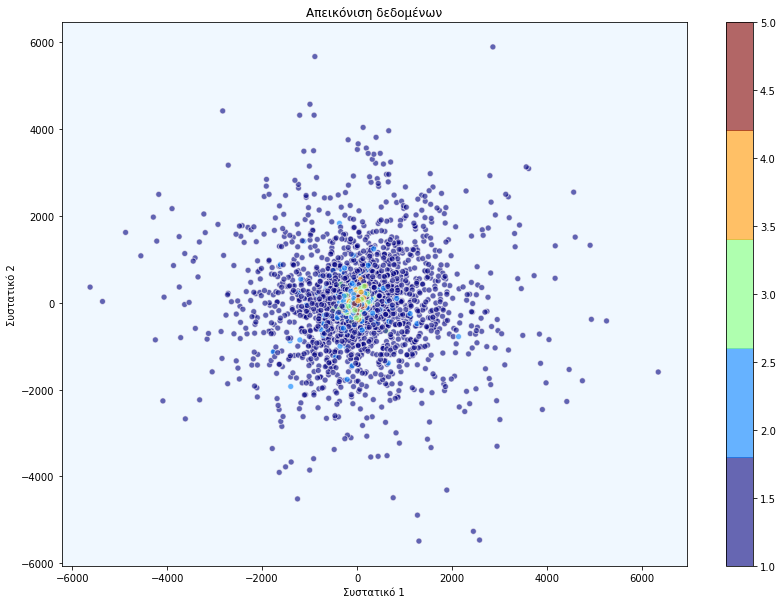

In [0]:
pca = PCA(2)  # project from 18 to 2 dimensions
projected = pca.fit_transform(features)

plt.figure(figsize=(14,10))
plt.title("Απεικόνιση δεδομένων")
s = plt.scatter(projected[:, 0], projected[:, 1],
            c=labels, edgecolor='snow', alpha=0.6,
            cmap=plt.cm.get_cmap('jet',5))
plt.xlabel('Συστατικό 1')
plt.ylabel('Συστατικό 2')
cbar = plt.colorbar()
plt.axes().set_facecolor("aliceblue")
plt.show()

Μπορούμε εύκολα να παρατηρήσουμε ότι οι κατηγορίες 3,4 και 5 είναι συγκεντρωμένες περισσότερο προς το κέντρο των δειγμάτων ενώ η κατηγορία 1 που αφορά τις επιληπτικές κρίσεις διαχέεται στο διάγραμμα. Επίσης δεν υπάρχουν τιμές της κατηγορίας 1 που να επισκιάζουν αυτές των κατηγοριών 3,4,5 σχηματίζοντας κάπως ένα κυκλικό φράγμα/διαχωριστικό μεταξύ αυτών των δύο κατηγοριών. Επομένως, ενισχύεται η άποψη ότι είναι καλύτερο να διακριθούν τα δείγματα σε δύο κατηγορίες. Η διάκριση μεταξύ των 3,4,5 φαντάζει δύσκολη από αυτή την απεικόνιση οπότε η σύμπτυξη σε μια κατηγορία είναι καλύτερη κίνηση. Πρόβλημα δημιουργεί ως έναν βαθμό η κατηγορία 2 η οποία παρουσιάζει διακυμάνσεις που θυμίζουν τόσο την κατηγορία 1 αλλά και συγκεντρωτισμό όπως οι κατηγορίες 3,4 και 5.

Στο σημείο αυτό θα χρησιμοποιήσουμε το PCA ξανά για να δούμε το ποσοστό πληροφορίας που μπορούμε να διατηρήσουμε σε σχέση με το πλήθος των χαρακτηριστικών που εκφράζουν τα δείγματα.

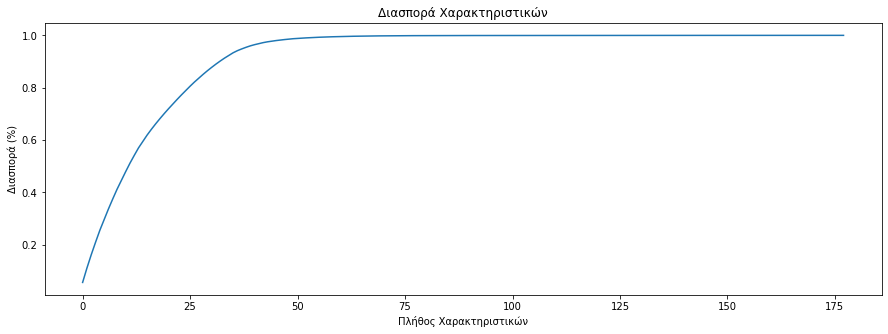

In [0]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Πλήθος Χαρακτηριστικών')
plt.ylabel('Διασπορά (%)') #for each component
plt.title('Διασπορά Χαρακτηριστικών')
plt.show()

Βλέπουμε ότι για το PCA διατηρείται ένα καλό ποσοστό διακύμανσης ($\approx 70\%$) για πλήθος χαρακτηριστικών $\geq 25$. Έτσι για το Cross validation στη συνέχεια γνωρίζουμε πάνω κάτω την ελάχιστη τιμή για το πλήθος των χαρακτηριστικών(διαστάσεων) στο οποίο μπορούμε να μειώσουμε τις εισόδους για εκπαίδευση. 

In [0]:
n_components = [20, 25, 30, 40, 50, 60, 70, 75, 80, 90, 100]

#**Dummy Classifiers**

Στην ενότητα αυτή θα εξετάσουμε την ικανότητα πρόβλεψης όλων των dummy classifiers. Θα μελετήσουμε την απόδοσή τους και για τις δύο περιπτώσεις.

##**Ταξινόμηση με 5 κατηγορίες**

Αρχικά ορίζουμε όλους τους dummy classifiers και τους εισάγουμε σε μια λίστα. Σε μια λίστα αποθηκεύουμε επίσης και τα ονόματά τους προκειμένου να παρουσιάζουμε στη συνέχεια τα αποτελέσματα σε ένα barplot

In [0]:
from sklearn.dummy import DummyClassifier

dc_uniform = DummyClassifier(strategy='uniform')
dc_most_frequent = DummyClassifier(strategy='most_frequent')
dc_prior = DummyClassifier(strategy='prior')
dc_stratified = DummyClassifier(strategy='stratified')
dc_const_1 = DummyClassifier(strategy='constant', constant=1)
dc_const_2 = DummyClassifier(strategy='constant', constant=2)
dc_const_3 = DummyClassifier(strategy='constant', constant=3)
dc_const_4 = DummyClassifier(strategy='constant', constant=4)
dc_const_5 = DummyClassifier(strategy='constant', constant=5)

dcs = [dc_uniform, dc_most_frequent, dc_prior, dc_stratified, dc_const_1, dc_const_2, dc_const_3, dc_const_4, dc_const_5]
dc_names = ["Dummy Uniform", "Dummy Most Frequent", "Dummy Stratified", "Dummy Prior",\
               "Dummy Constant 1", "Dummy Constant 2", "Dummy Constant 3", "Dummy Constant 4", "Dummy Constant 5"]

Όπως ήδη γνωρίζουμε δεν έχει νόημα η βελτιστοποίηση των dummy ταξινομητών καθώς έχουν πολύ απλές πολιτικές ταξινόμησης, χωρίς υπερπαραμέτρους και χρησιμοποιούνται κυρίως ως ένα κατώτατο όριο ικανότητα πρόβλεψης των επόμενων εκτιμητών.

Dummy Uniform
*******************************************************************
* Συνολικός χρόνος fit και predict: 0.0020530223846435547 seconds *
*******************************************************************
              precision    recall  f1-score   support

           1       0.20      0.21      0.21       690
           2       0.18      0.18      0.18       690
           3       0.21      0.20      0.21       690
           4       0.21      0.21      0.21       690
           5       0.21      0.21      0.21       690

    accuracy                           0.20      3450
   macro avg       0.20      0.20      0.20      3450
weighted avg       0.20      0.20      0.20      3450



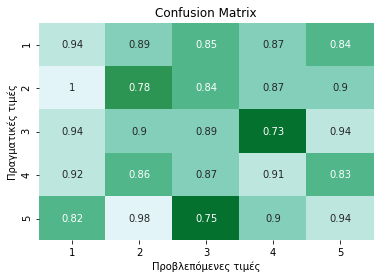


Macro avg f1 score: 20.31929960378843%
Accuracy(micro avg) f1 score: 20.318840579710145%


Dummy Most Frequent
*******************************************************************
* Συνολικός χρόνος fit και predict: 0.0009927749633789062 seconds *
*******************************************************************
              precision    recall  f1-score   support

           1       0.20      1.00      0.33       690
           2       0.00      0.00      0.00       690
           3       0.00      0.00      0.00       690
           4       0.00      0.00      0.00       690
           5       0.00      0.00      0.00       690

    accuracy                           0.20      3450
   macro avg       0.04      0.20      0.07      3450
weighted avg       0.04      0.20      0.07      3450



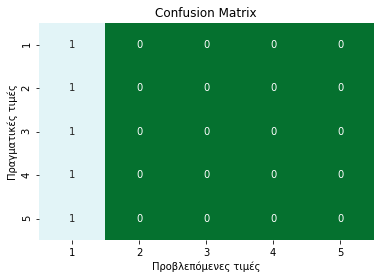


Macro avg f1 score: 6.666666666666668%
Accuracy(micro avg) f1 score: 20.0%


Dummy Stratified
*******************************************************************
* Συνολικός χρόνος fit και predict: 0.0009167194366455078 seconds *
*******************************************************************
              precision    recall  f1-score   support

           1       0.20      1.00      0.33       690
           2       0.00      0.00      0.00       690
           3       0.00      0.00      0.00       690
           4       0.00      0.00      0.00       690
           5       0.00      0.00      0.00       690

    accuracy                           0.20      3450
   macro avg       0.04      0.20      0.07      3450
weighted avg       0.04      0.20      0.07      3450



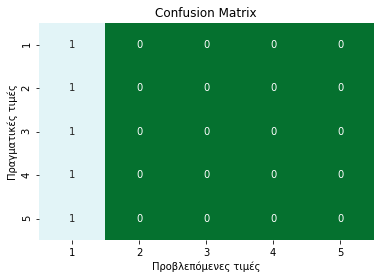


Macro avg f1 score: 6.666666666666668%
Accuracy(micro avg) f1 score: 20.0%


Dummy Prior
*******************************************************************
* Συνολικός χρόνος fit και predict: 0.0018870830535888672 seconds *
*******************************************************************
              precision    recall  f1-score   support

           1       0.20      0.20      0.20       690
           2       0.23      0.22      0.22       690
           3       0.20      0.22      0.21       690
           4       0.21      0.21      0.21       690
           5       0.21      0.20      0.20       690

    accuracy                           0.21      3450
   macro avg       0.21      0.21      0.21      3450
weighted avg       0.21      0.21      0.21      3450



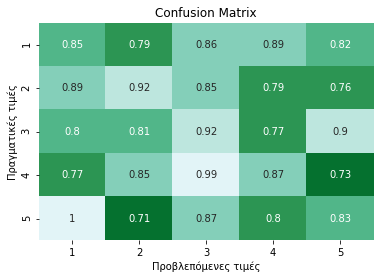


Macro avg f1 score: 20.841812351571196%
Accuracy(micro avg) f1 score: 20.840579710144926%


Dummy Constant 1
******************************************************************
* Συνολικός χρόνος fit και predict: 0.001308441162109375 seconds *
******************************************************************
              precision    recall  f1-score   support

           1       0.20      1.00      0.33       690
           2       0.00      0.00      0.00       690
           3       0.00      0.00      0.00       690
           4       0.00      0.00      0.00       690
           5       0.00      0.00      0.00       690

    accuracy                           0.20      3450
   macro avg       0.04      0.20      0.07      3450
weighted avg       0.04      0.20      0.07      3450



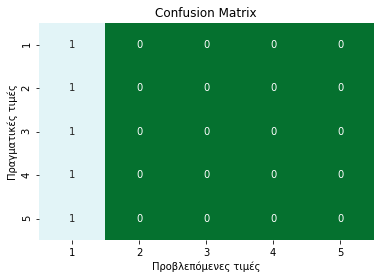


Macro avg f1 score: 6.666666666666668%
Accuracy(micro avg) f1 score: 20.0%


Dummy Constant 2
******************************************************************
* Συνολικός χρόνος fit και predict: 0.001196146011352539 seconds *
******************************************************************
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       690
           2       0.20      1.00      0.33       690
           3       0.00      0.00      0.00       690
           4       0.00      0.00      0.00       690
           5       0.00      0.00      0.00       690

    accuracy                           0.20      3450
   macro avg       0.04      0.20      0.07      3450
weighted avg       0.04      0.20      0.07      3450



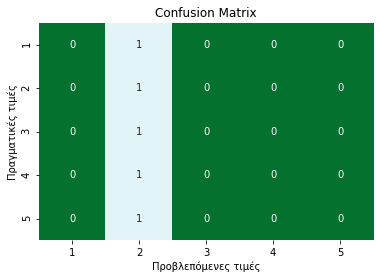


Macro avg f1 score: 6.666666666666668%
Accuracy(micro avg) f1 score: 20.0%


Dummy Constant 3
*******************************************************************
* Συνολικός χρόνος fit και predict: 0.0008068084716796875 seconds *
*******************************************************************
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       690
           2       0.00      0.00      0.00       690
           3       0.20      1.00      0.33       690
           4       0.00      0.00      0.00       690
           5       0.00      0.00      0.00       690

    accuracy                           0.20      3450
   macro avg       0.04      0.20      0.07      3450
weighted avg       0.04      0.20      0.07      3450



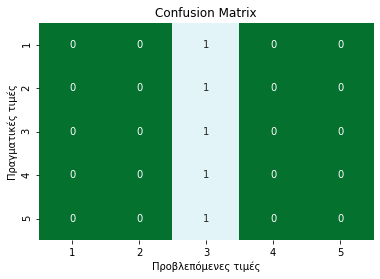


Macro avg f1 score: 6.666666666666668%
Accuracy(micro avg) f1 score: 20.0%


Dummy Constant 4
*******************************************************************
* Συνολικός χρόνος fit και predict: 0.0009286403656005859 seconds *
*******************************************************************
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       690
           2       0.00      0.00      0.00       690
           3       0.00      0.00      0.00       690
           4       0.20      1.00      0.33       690
           5       0.00      0.00      0.00       690

    accuracy                           0.20      3450
   macro avg       0.04      0.20      0.07      3450
weighted avg       0.04      0.20      0.07      3450



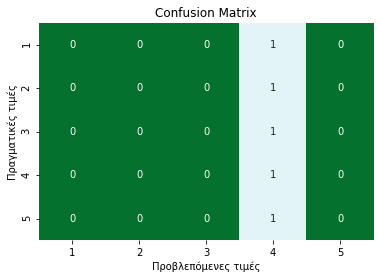


Macro avg f1 score: 6.666666666666668%
Accuracy(micro avg) f1 score: 20.0%


Dummy Constant 5
*******************************************************************
* Συνολικός χρόνος fit και predict: 0.0017244815826416016 seconds *
*******************************************************************
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       690
           2       0.00      0.00      0.00       690
           3       0.00      0.00      0.00       690
           4       0.00      0.00      0.00       690
           5       0.20      1.00      0.33       690

    accuracy                           0.20      3450
   macro avg       0.04      0.20      0.07      3450
weighted avg       0.04      0.20      0.07      3450



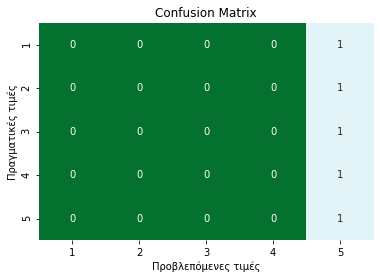


Macro avg f1 score: 6.666666666666668%
Accuracy(micro avg) f1 score: 20.0%




In [0]:
macro_scores = []
micro_scores = []

for i in range(0, len(dcs)):
  pprint(dc_names[i])
  macro, micro = estimation(dcs[i], [], X_train, y_train, X_test, y_test)
  macro_scores.append(macro)
  micro_scores.append(micro)

Παρακάτω παρουσιάζουμε σε bar plot τα αποτελέσματα των dummy ταξινομητών

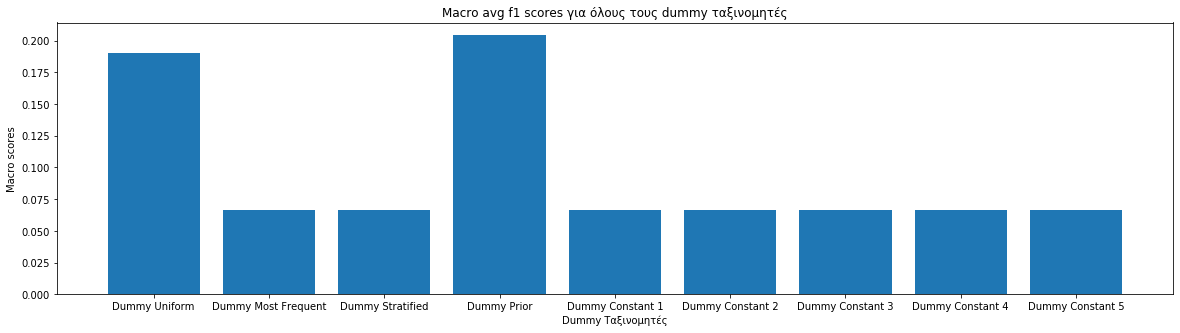

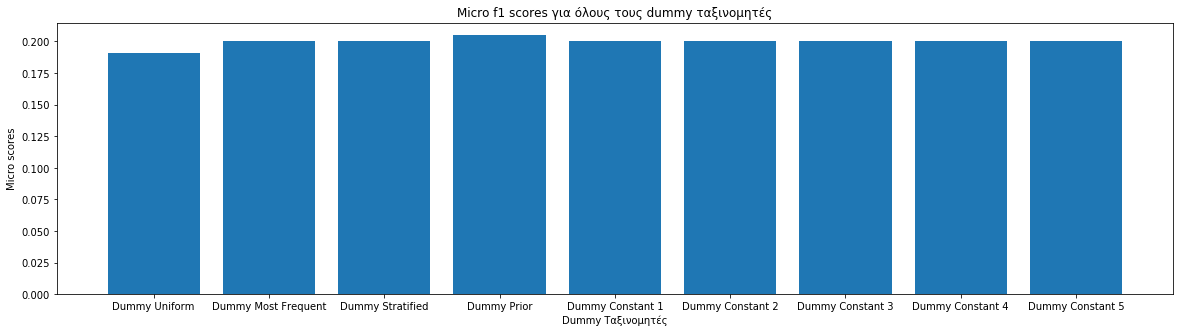

In [0]:
plt.figure(figsize=(20, 5))
plt.title("Macro avg f1 scores για όλους τους dummy ταξινομητές")
plt.xlabel("Dummy Ταξινομητές")
plt.ylabel("Macro scores")
plt.bar(dc_names, macro_scores)
plt.show()
print()
plt.figure(figsize=(20, 5))
plt.title("Micro f1 scores για όλους τους dummy ταξινομητές")
plt.xlabel("Dummy Ταξινομητές")
plt.ylabel("Micro scores")
plt.bar(dc_names, micro_scores)
plt.show()
print()

In [0]:
print("Καλύτερος dummy ταξινομητής ως προς f1-macro: {} με score {}%".format(dc_names[macro_scores.index(max(macro_scores))],\
                                                                             max(macro_scores)*100))
print("Καλύτερος dummy ταξινομητής ως προς f1-micro: {} με score {}%".format(dc_names[micro_scores.index(max(micro_scores))],
                                                                             max(micro_scores)*100))

Καλύτερος dummy ταξινομητής ως προς f1-macro: Dummy Prior με score 20.841812351571196%
Καλύτερος dummy ταξινομητής ως προς f1-micro: Dummy Prior με score 20.840579710144926%


Βλέπουμε ότι και για τα δύο σκορ f1 macro, f1 micro(accuracy) ο ταξινομητής dummy prior είναι ο καλύτερος σε σχέση με τους υπόλοιπους με το χαμηλό το σκορ των $\approx 21\%$.

##**Δυαδική ταξινόμηση**

Σε αυτή την υποενότητα θα μελετήσουμε πόσο καλά οι dummy ταξινομητές ανταπεξέλχονται με δυαδικό διαχωρισμό των κατηγοριών.

Αρχικά μετατρέπουμε τόσο τους στόχους εκπαίδευσης όσο και του ελέγχου σε νέους δυαδικούς. Όπου εμφανίζονται οι αριθμοί 2,3,4,5 μέσα στους πίνακες αυτούς τους μετατρέπουμε σε 2. Οπότε στο τέλος έχουμε δύο κατηγορίες. Την κατηγορία 1 που αφορά τις επιληπτικές κρίσεις και την κατηγορία 2 που αφορά μη επιληπτικές συμπεριφορές.

In [0]:
bin_y_train = y_train.copy()
for i in range(0, len(y_train)):
  if y_train[i] > 1:
    bin_y_train[i] = 2

bin_y_test = y_test.copy()
for i in range(0, len(y_test)):
  if y_test[i] > 1:
    bin_y_test[i] = 2

Dummy Uniform
*******************************************************************
* Συνολικός χρόνος fit και predict: 0.0015096664428710938 seconds *
*******************************************************************
              precision    recall  f1-score   support

           1       0.20      0.51      0.29       690
           2       0.80      0.50      0.62      2760

    accuracy                           0.50      3450
   macro avg       0.50      0.50      0.45      3450
weighted avg       0.68      0.50      0.55      3450



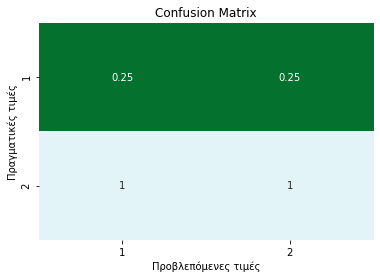


Macro avg f1 score: 45.33063858860545%
Accuracy(micro avg) f1 score: 50.23188405797101%


Dummy Most Frequent
*******************************************************************
* Συνολικός χρόνος fit και predict: 0.0007274150848388672 seconds *
*******************************************************************
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       690
           2       0.80      1.00      0.89      2760

    accuracy                           0.80      3450
   macro avg       0.40      0.50      0.44      3450
weighted avg       0.64      0.80      0.71      3450



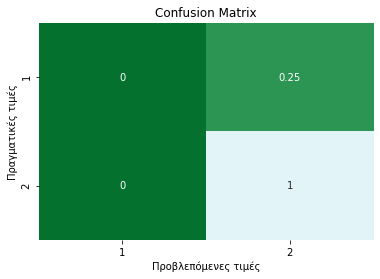


Macro avg f1 score: 44.44444444444445%
Accuracy(micro avg) f1 score: 80.0%


Dummy Stratified
*******************************************************************
* Συνολικός χρόνος fit και predict: 0.0007252693176269531 seconds *
*******************************************************************
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       690
           2       0.80      1.00      0.89      2760

    accuracy                           0.80      3450
   macro avg       0.40      0.50      0.44      3450
weighted avg       0.64      0.80      0.71      3450



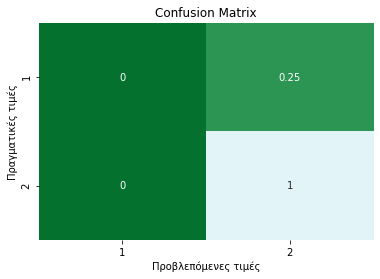


Macro avg f1 score: 44.44444444444445%
Accuracy(micro avg) f1 score: 80.0%


Dummy Prior
**************************************************************
* Συνολικός χρόνος fit και predict: 0.00091552734375 seconds *
**************************************************************
              precision    recall  f1-score   support

           1       0.23      0.23      0.23       690
           2       0.81      0.81      0.81      2760

    accuracy                           0.69      3450
   macro avg       0.52      0.52      0.52      3450
weighted avg       0.69      0.69      0.69      3450



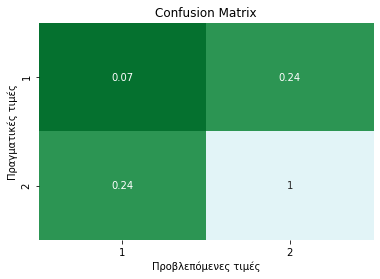


Macro avg f1 score: 51.61143670755454%
Accuracy(micro avg) f1 score: 69.01449275362319%


Dummy Constant 1
*******************************************************************
* Συνολικός χρόνος fit και predict: 0.0007252693176269531 seconds *
*******************************************************************
              precision    recall  f1-score   support

           1       0.20      1.00      0.33       690
           2       0.00      0.00      0.00      2760

    accuracy                           0.20      3450
   macro avg       0.10      0.50      0.17      3450
weighted avg       0.04      0.20      0.07      3450



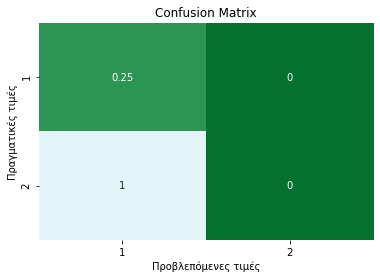


Macro avg f1 score: 16.666666666666668%
Accuracy(micro avg) f1 score: 20.0%


Dummy Constant 2
*******************************************************************
* Συνολικός χρόνος fit και predict: 0.0007328987121582031 seconds *
*******************************************************************
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       690
           2       0.80      1.00      0.89      2760

    accuracy                           0.80      3450
   macro avg       0.40      0.50      0.44      3450
weighted avg       0.64      0.80      0.71      3450



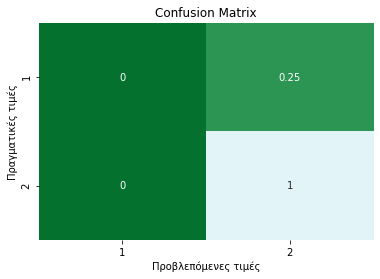


Macro avg f1 score: 44.44444444444445%
Accuracy(micro avg) f1 score: 80.0%




In [0]:
macro_scores = []
micro_scores = []

for i in range(0, len(dcs[:6])):
  pprint(dc_names[i])
  macro, micro = estimation(dcs[i], [], X_train, bin_y_train, X_test, bin_y_test)
  macro_scores.append(macro)
  micro_scores.append(micro)

Παρακάτω παρουσιάζουμε τα αποτελέσματα των ταξινομητών σε bar plot.

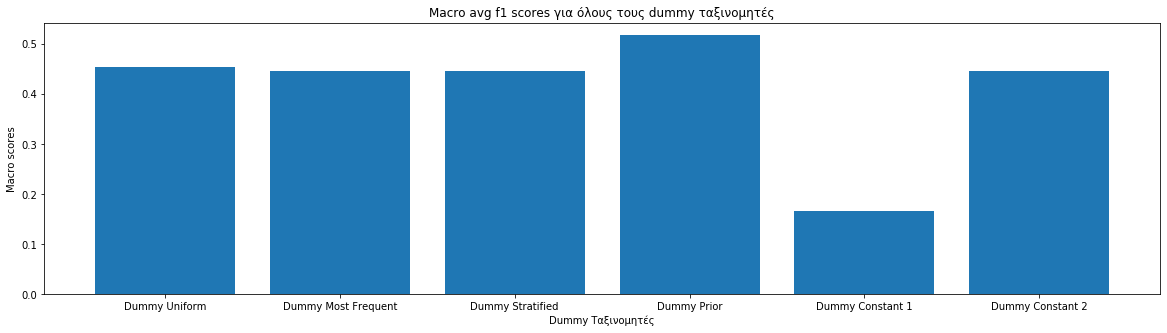

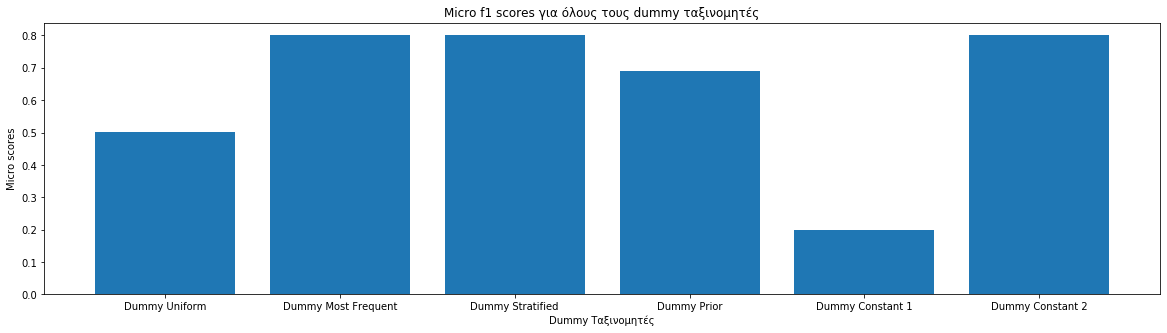

In [0]:
plt.figure(figsize=(20, 5))
plt.title("Macro avg f1 scores για όλους τους dummy ταξινομητές")
plt.xlabel("Dummy Ταξινομητές")
plt.ylabel("Macro scores")
plt.bar(dc_names[:6], macro_scores)
plt.show()
print()
plt.figure(figsize=(20, 5))
plt.title("Micro f1 scores για όλους τους dummy ταξινομητές")
plt.xlabel("Dummy Ταξινομητές")
plt.ylabel("Micro scores")
plt.bar(dc_names[:6], micro_scores)
plt.show()
print()

In [0]:
print("Καλύτερος dummy ταξινομητής ως προς f1-macro: {} με score {}%".format(dc_names[macro_scores.index(max(macro_scores))],\
                                                                             max(macro_scores)*100))
print("Καλύτερος dummy ταξινομητής ως προς f1-micro: {} με score {}%".format(dc_names[micro_scores.index(max(micro_scores))],
                                                                             max(micro_scores)*100))

Καλύτερος dummy ταξινομητής ως προς f1-macro: Dummy Prior με score 51.61143670755454%
Καλύτερος dummy ταξινομητής ως προς f1-micro: Dummy Most Frequent με score 80.0%


Αρχικά παρατηρούμε ότι τα score όλων των dummy ταξινομητών έχουν αυξηθεί. Αυτό δε μας εκπλήσσει καθώς η δουλειά τους πλέον έχει περιοριστεί στην ταξινόμηση μόνο δύο κατηγοριών.

Ο ταξινομητής dummy prior συνεχίζει να πετυχαίνει καλύτερο f1-macro score σε σύγκριση με τους υπόλοιπους ταξινομητές αλλά σε σχέση με πριν δεν παρουσιάζει τόσο μεγάλη απόκλιση από αυτούς. Όσον αφορά τωρα το f1-micro score, ο ταξινομητής Dummt Stratified πετυχαίνει το καλύτερο micro score. Πάλι η εικόνα όλων των dummy ταξινομητών έχει αλλάξει στο micro score, όπου παρουσιάζουν μεγαλύτερες διαφορές μεταξύ τους, σε σύγκριση με πριν που τα δείγματα διακρίνονταν σε 5 κατηγορίες.

#**Gaussian Naive-Bayes**

Στην ενότητα αυτή χρησιμοποιούμε τον ταξινομητή Naive Bayes με συνάρτηση πυκνότητας πιθανότητας την γκαουσιάνη συνάρτηση (ή συνάρτηση κανονικής κατανομής). Το θετικό με τον ταξινομητή αυτόν είναι ότι μπορεί και διαχειρίζεται μεγάλο πλήθος δειγμάτων χωρίς σημαντική χρονική επιβάρυνση. Για το λόγο αυτό θα χρησιμοποιήσουμε και για την εκπαίδευση για τον έλεγχό του όλα τα δεδομένα.

Θα μελετήσουμε πάλι τη συμπεριφορά της συνολικής αρχιτεκτονικής και του ταξινομητή για τις δύο περιπτώσεις:

1. Με 5 κατηγορίες
2. Με 2 κατηγορίες



In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

Και για τις δύο περιπτώσεις ακολουθούμε τα εξής βήματα:

1. Καμία βελτιστοποίηση και CV (Γ. Βaseline Classification)
2. CrossValidation και βελτιστοποίηση υπερπαραμέτρων (Δ. Βελτιστοποίηση ταξινομητών)
3. Progressive Βελτιστοποίηση (Δ. Βελτιστοποίηση ταξινομητών)

##**Ταξινόμηση με 5 κατηγορίες**

###**Καμία βελτιστοποίηση και CV**

*****************************************************************
* Συνολικός χρόνος fit και predict: 0.04837322235107422 seconds *
*****************************************************************
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       690
           2       0.22      0.16      0.18       690
           3       0.32      0.20      0.25       690
           4       0.42      0.28      0.34       690
           5       0.37      0.77      0.50       690

    accuracy                           0.45      3450
   macro avg       0.45      0.45      0.43      3450
weighted avg       0.45      0.45      0.43      3450



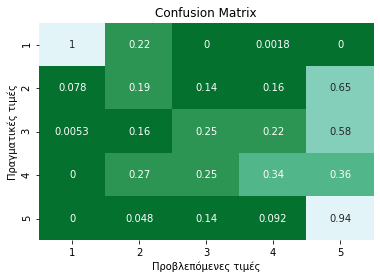


Macro avg f1 score: 42.69642787710903%
Accuracy(micro avg) f1 score: 44.57971014492754%




In [0]:
_, _ = estimation(gnb, [], X_train, y_train, X_test, y_test)

###**CrossValidation και Optimization**

Κανένα στάδιο προεπεξεργασίας
****************************************************************
* Συνολικός χρόνος fit και predict: 3.4409990310668945 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       690
           2       0.22      0.16      0.18       690
           3       0.32      0.20      0.25       690
           4       0.42      0.28      0.34       690
           5       0.37      0.77      0.50       690

    accuracy                           0.45      3450
   macro avg       0.45      0.45      0.43      3450
weighted avg       0.45      0.45      0.43      3450



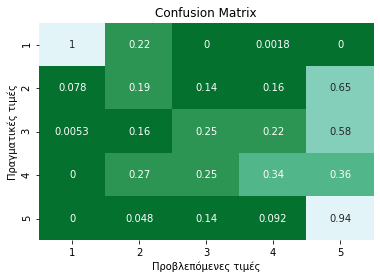


Macro avg f1 score: 42.69642787710903%
Accuracy(micro avg) f1 score: 44.57971014492754%

Βέλτιστες τιμές υπερπαραμέτρων:
{}

Input > Variance Threshold > Standard scaling
***************************************************************
* Συνολικός χρόνος fit και predict: 5.156452894210815 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       690
           2       0.22      0.16      0.18       690
           3       0.32      0.21      0.25       690
           4       0.42      0.28      0.33       690
           5       0.37      0.77      0.50       690

    accuracy                           0.45      3450
   macro avg       0.45      0.45      0.43      3450
weighted avg       0.45      0.45      0.43      3450



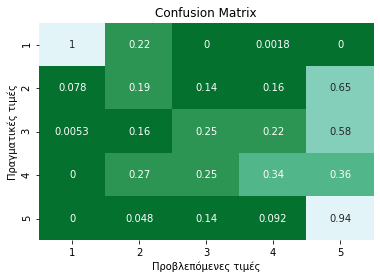


Macro avg f1 score: 42.65427864383932%
Accuracy(micro avg) f1 score: 44.52173913043478%

Βέλτιστες τιμές υπερπαραμέτρων:
{'selector__threshold': 24000}

Input > Variance Threshold > Minmax scaling
***************************************************************
* Συνολικός χρόνος fit και predict: 2.952233076095581 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       690
           2       0.22      0.16      0.18       690
           3       0.32      0.21      0.25       690
           4       0.42      0.28      0.33       690
           5       0.37      0.77      0.50       690

    accuracy                           0.45      3450
   macro avg       0.45      0.45      0.43      3450
weighted avg       0.45      0.45      0.43      3450



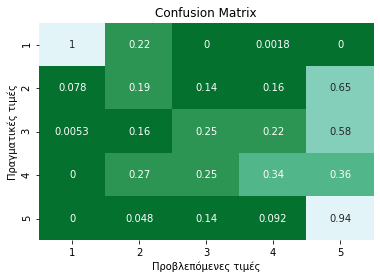


Macro avg f1 score: 42.65427864383932%
Accuracy(micro avg) f1 score: 44.52173913043478%

Βέλτιστες τιμές υπερπαραμέτρων:
{'selector__threshold': 24000}

Input > Variance Threshold > Standard scaling > Oversampling
****************************************************************
* Συνολικός χρόνος fit και predict: 3.5394492149353027 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       690
           2       0.22      0.16      0.18       690
           3       0.32      0.21      0.25       690
           4       0.42      0.28      0.33       690
           5       0.37      0.77      0.50       690

    accuracy                           0.45      3450
   macro avg       0.45      0.45      0.43      3450
weighted avg       0.45      0.45      0.43      3450



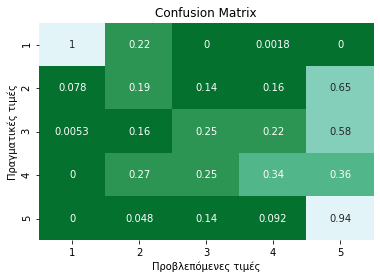


Macro avg f1 score: 42.65427864383932%
Accuracy(micro avg) f1 score: 44.52173913043478%

Βέλτιστες τιμές υπερπαραμέτρων:
{'selector__threshold': 24000}

Input > Variance Threshold > Minmax scaling > Oversampling
***************************************************************
* Συνολικός χρόνος fit και predict: 3.621109962463379 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       690
           2       0.22      0.16      0.18       690
           3       0.32      0.21      0.25       690
           4       0.42      0.28      0.33       690
           5       0.37      0.77      0.50       690

    accuracy                           0.45      3450
   macro avg       0.45      0.45      0.43      3450
weighted avg       0.45      0.45      0.43      3450



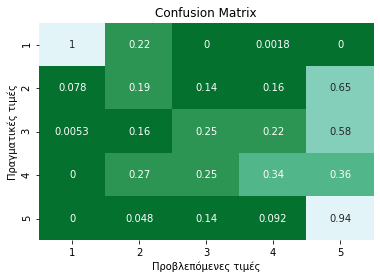


Macro avg f1 score: 42.65427864383932%
Accuracy(micro avg) f1 score: 44.52173913043478%

Βέλτιστες τιμές υπερπαραμέτρων:
{'selector__threshold': 24000}

Input > Variance Threshold > Standard scaling > Undersampling
***************************************************************
* Συνολικός χρόνος fit και predict: 3.513995885848999 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       690
           2       0.22      0.16      0.18       690
           3       0.32      0.21      0.25       690
           4       0.42      0.28      0.33       690
           5       0.37      0.77      0.50       690

    accuracy                           0.45      3450
   macro avg       0.45      0.45      0.43      3450
weighted avg       0.45      0.45      0.43      3450



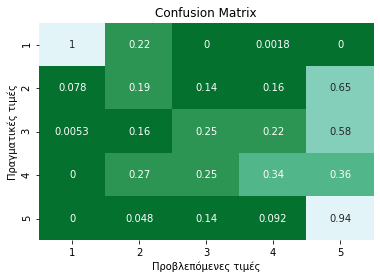


Macro avg f1 score: 42.65427864383932%
Accuracy(micro avg) f1 score: 44.52173913043478%

Βέλτιστες τιμές υπερπαραμέτρων:
{'selector__threshold': 24000}

Input > Variance Threshold > Minmax scaling > Undersampling
***************************************************************
* Συνολικός χρόνος fit και predict: 3.474612236022949 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       690
           2       0.22      0.16      0.18       690
           3       0.32      0.21      0.25       690
           4       0.42      0.28      0.33       690
           5       0.37      0.77      0.50       690

    accuracy                           0.45      3450
   macro avg       0.45      0.45      0.43      3450
weighted avg       0.45      0.45      0.43      3450



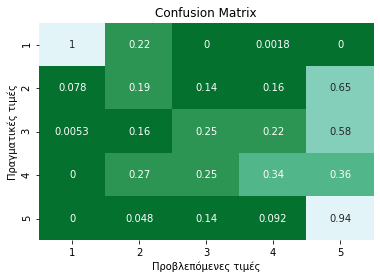


Macro avg f1 score: 42.65427864383932%
Accuracy(micro avg) f1 score: 44.52173913043478%

Βέλτιστες τιμές υπερπαραμέτρων:
{'selector__threshold': 24000}

Input > Variance Threshold > Standard scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 53.20551657676697 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       690
           2       0.39      0.19      0.26       690
           3       0.46      0.76      0.57       690
           4       0.78      0.69      0.73       690
           5       0.67      0.69      0.68       690

    accuracy                           0.64      3450
   macro avg       0.65      0.64      0.63      3450
weighted avg       0.65      0.64      0.63      3450



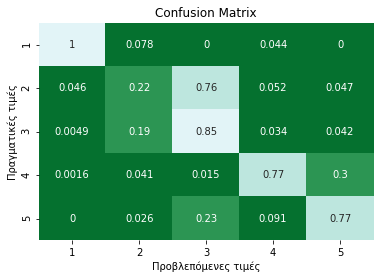


Macro avg f1 score: 63.074471467088976%
Accuracy(micro avg) f1 score: 64.28985507246377%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 50, 'selector__threshold': 24000}

Input > Variance Threshold > Minmax scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 53.76627230644226 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       690
           2       0.37      0.18      0.24       690
           3       0.45      0.76      0.56       690
           4       0.78      0.68      0.72       690
           5       0.67      0.68      0.68       690

    accuracy                           0.64      3450
   macro avg       0.64      0.64      0.62      3450
weighted avg       0.64      0.64      0.62      3450



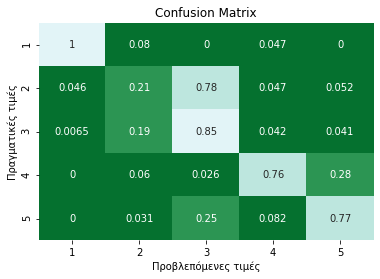


Macro avg f1 score: 62.490854489711445%
Accuracy(micro avg) f1 score: 63.65217391304348%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 50, 'selector__threshold': 0}

Input > Variance Threshold > Standard scaling > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 54.11356806755066 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       690
           2       0.39      0.19      0.26       690
           3       0.46      0.76      0.57       690
           4       0.78      0.69      0.73       690
           5       0.67      0.69      0.68       690

    accuracy                           0.64      3450
   macro avg       0.65      0.64      0.63      3450
weighted avg       0.65      0.64      0.63      3450



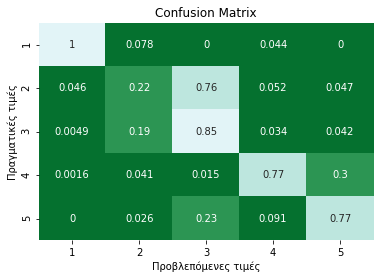


Macro avg f1 score: 63.074471467088976%
Accuracy(micro avg) f1 score: 64.28985507246377%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 50, 'selector__threshold': 24000}

Input > Variance Threshold > Minmax scaling > Undersampling > PCA
**************************************************************
* Συνολικός χρόνος fit και predict: 54.4646954536438 seconds *
**************************************************************
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       690
           2       0.37      0.18      0.24       690
           3       0.45      0.76      0.56       690
           4       0.78      0.68      0.72       690
           5       0.67      0.68      0.68       690

    accuracy                           0.64      3450
   macro avg       0.64      0.64      0.62      3450
weighted avg       0.64      0.64      0.62      3450



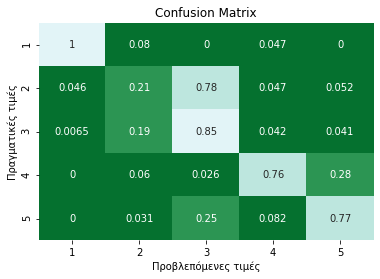


Macro avg f1 score: 62.490854489711445%
Accuracy(micro avg) f1 score: 63.65217391304348%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 50, 'selector__threshold': 0}

Input > Standard scaling > Oversampling
****************************************************************
* Συνολικός χρόνος fit και predict: 0.9280102252960205 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       690
           2       0.22      0.16      0.18       690
           3       0.32      0.20      0.25       690
           4       0.42      0.28      0.34       690
           5       0.37      0.77      0.50       690

    accuracy                           0.45      3450
   macro avg       0.45      0.45      0.43      3450
weighted avg       0.45      0.45      0.43      3450



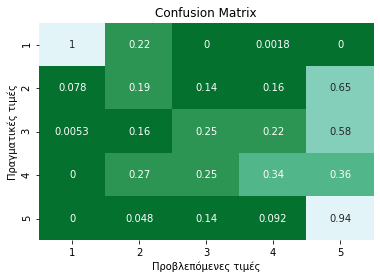


Macro avg f1 score: 42.69642787710903%
Accuracy(micro avg) f1 score: 44.57971014492754%

Βέλτιστες τιμές υπερπαραμέτρων:
{}

Input > Minmax scaling > Oversampling
****************************************************************
* Συνολικός χρόνος fit και predict: 0.9013862609863281 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       690
           2       0.22      0.16      0.18       690
           3       0.32      0.20      0.25       690
           4       0.42      0.28      0.34       690
           5       0.37      0.77      0.50       690

    accuracy                           0.45      3450
   macro avg       0.45      0.45      0.43      3450
weighted avg       0.45      0.45      0.43      3450



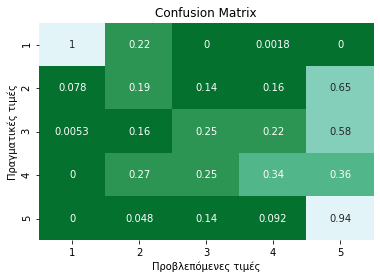


Macro avg f1 score: 42.69642787710903%
Accuracy(micro avg) f1 score: 44.57971014492754%

Βέλτιστες τιμές υπερπαραμέτρων:
{}

Input > Standard scaling > Undersampling
****************************************************************
* Συνολικός χρόνος fit και predict: 0.5909943580627441 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       690
           2       0.22      0.16      0.18       690
           3       0.32      0.20      0.25       690
           4       0.42      0.28      0.34       690
           5       0.37      0.77      0.50       690

    accuracy                           0.45      3450
   macro avg       0.45      0.45      0.43      3450
weighted avg       0.45      0.45      0.43      3450



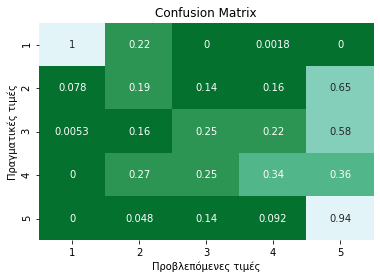


Macro avg f1 score: 42.69642787710903%
Accuracy(micro avg) f1 score: 44.57971014492754%

Βέλτιστες τιμές υπερπαραμέτρων:
{}

Input > Minmax scaling > Undersampling
****************************************************************
* Συνολικός χρόνος fit και predict: 0.6099019050598145 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       690
           2       0.22      0.16      0.18       690
           3       0.32      0.20      0.25       690
           4       0.42      0.28      0.34       690
           5       0.37      0.77      0.50       690

    accuracy                           0.45      3450
   macro avg       0.45      0.45      0.43      3450
weighted avg       0.45      0.45      0.43      3450



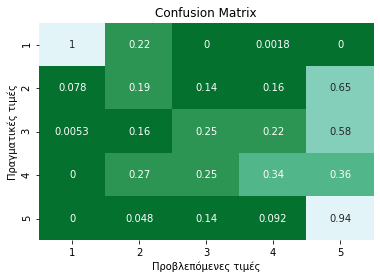


Macro avg f1 score: 42.69642787710903%
Accuracy(micro avg) f1 score: 44.57971014492754%

Βέλτιστες τιμές υπερπαραμέτρων:
{}

Input > Standard scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 9.591110706329346 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       690
           2       0.39      0.19      0.26       690
           3       0.45      0.76      0.57       690
           4       0.77      0.68      0.72       690
           5       0.66      0.67      0.66       690

    accuracy                           0.64      3450
   macro avg       0.64      0.64      0.63      3450
weighted avg       0.64      0.64      0.63      3450



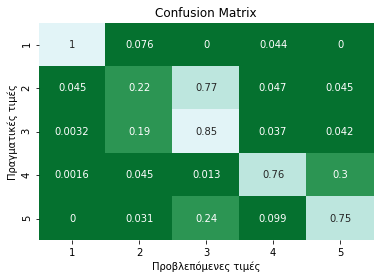


Macro avg f1 score: 62.640600216440575%
Accuracy(micro avg) f1 score: 63.82608695652174%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 50}

Input > Minmax scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 2.748473882675171 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       690
           2       0.37      0.18      0.24       690
           3       0.45      0.76      0.56       690
           4       0.78      0.68      0.72       690
           5       0.67      0.68      0.68       690

    accuracy                           0.64      3450
   macro avg       0.64      0.64      0.62      3450
weighted avg       0.64      0.64      0.62      3450



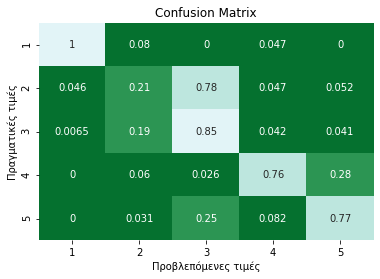


Macro avg f1 score: 62.490854489711445%
Accuracy(micro avg) f1 score: 63.65217391304348%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 50}

Input > Standard scaling > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 9.690937995910645 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       690
           2       0.39      0.19      0.26       690
           3       0.45      0.76      0.57       690
           4       0.77      0.68      0.72       690
           5       0.66      0.67      0.66       690

    accuracy                           0.64      3450
   macro avg       0.64      0.64      0.63      3450
weighted avg       0.64      0.64      0.63      3450



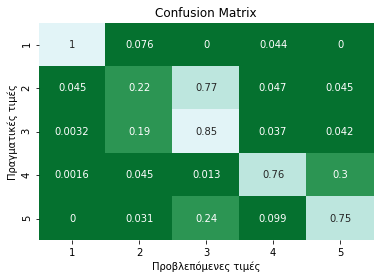


Macro avg f1 score: 62.640600216440575%
Accuracy(micro avg) f1 score: 63.82608695652174%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 50}

Input > Minmax scaling > Undersampling > PCA
**************************************************************
* Συνολικός χρόνος fit και predict: 9.66057825088501 seconds *
**************************************************************
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       690
           2       0.37      0.18      0.24       690
           3       0.45      0.76      0.56       690
           4       0.78      0.68      0.72       690
           5       0.67      0.68      0.68       690

    accuracy                           0.64      3450
   macro avg       0.64      0.64      0.62      3450
weighted avg       0.64      0.64      0.62      3450



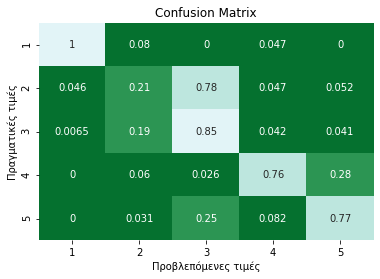


Macro avg f1 score: 62.490854489711445%
Accuracy(micro avg) f1 score: 63.65217391304348%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 50}

Input > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 9.640578746795654 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       690
           2       0.40      0.19      0.26       690
           3       0.46      0.76      0.57       690
           4       0.77      0.68      0.72       690
           5       0.67      0.70      0.68       690

    accuracy                           0.64      3450
   macro avg       0.65      0.64      0.63      3450
weighted avg       0.65      0.64      0.63      3450



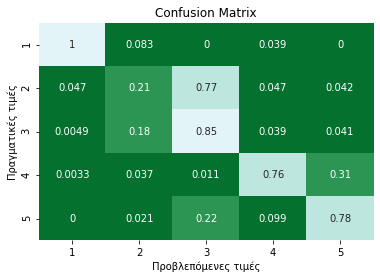


Macro avg f1 score: 63.10284166218726%
Accuracy(micro avg) f1 score: 64.40579710144928%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 50}

Input > Undersampling > PCA
**************************************************************
* Συνολικός χρόνος fit και predict: 9.21491289138794 seconds *
**************************************************************
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       690
           2       0.40      0.19      0.26       690
           3       0.46      0.76      0.57       690
           4       0.77      0.68      0.72       690
           5       0.67      0.70      0.68       690

    accuracy                           0.64      3450
   macro avg       0.65      0.64      0.63      3450
weighted avg       0.65      0.64      0.63      3450



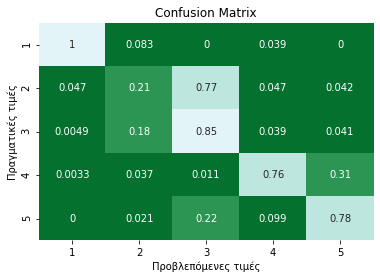


Macro avg f1 score: 63.10284166218726%
Accuracy(micro avg) f1 score: 64.40579710144928%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 50}

Input > Minmax scaling > Undersampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 2.9048192501068115 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       690
           2       0.37      0.18      0.24       690
           3       0.45      0.76      0.56       690
           4       0.78      0.68      0.72       690
           5       0.67      0.68      0.68       690

    accuracy                           0.64      3450
   macro avg       0.64      0.64      0.62      3450
weighted avg       0.64      0.64      0.62      3450



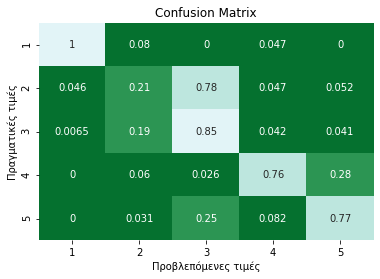


Macro avg f1 score: 62.490854489711445%
Accuracy(micro avg) f1 score: 63.65217391304348%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 50}



In [0]:
macro_scores = []
micro_scores = []
names = []
combos = all_combinations()
for code in combos:
  name, steps, indic = create_names_steps_dict(code, varthreshold, n_components)
  pprint(name)
  macro, micro = estimation(gnb, steps, X_train, y_train, X_test, y_test, cval=5, in_dict=indic, mem='tmp')
  macro_scores.append(macro)
  micro_scores.append(micro)
  names.append(name)

Στη συνέχεια για τις διάφορες αρχιτεκτονικές με τον GNB ταξινομητή παρουσιάζουμε ένα bar plot των αποδόσεών τους.

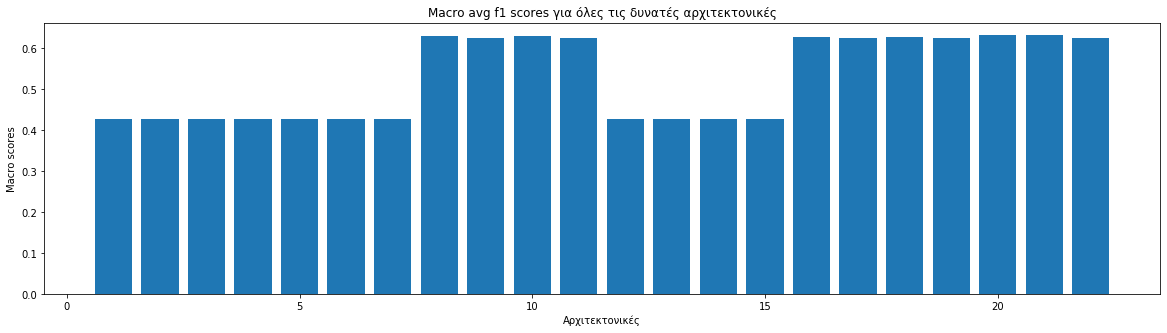

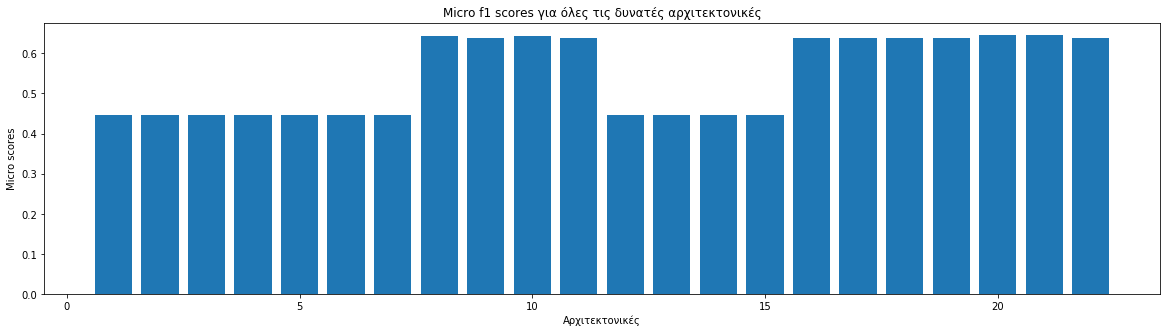


Υπόμνημα
1) Κανένα στάδιο προεπεξεργασίας
2) Input > Variance Threshold > Standard scaling
3) Input > Variance Threshold > Minmax scaling
4) Input > Variance Threshold > Standard scaling > Oversampling
5) Input > Variance Threshold > Minmax scaling > Oversampling
6) Input > Variance Threshold > Standard scaling > Undersampling
7) Input > Variance Threshold > Minmax scaling > Undersampling
8) Input > Variance Threshold > Standard scaling > Oversampling > PCA
9) Input > Variance Threshold > Minmax scaling > Oversampling > PCA
10) Input > Variance Threshold > Standard scaling > Undersampling > PCA
11) Input > Variance Threshold > Minmax scaling > Undersampling > PCA
12) Input > Standard scaling > Oversampling
13) Input > Minmax scaling > Oversampling
14) Input > Standard scaling > Undersampling
15) Input > Minmax scaling > Undersampling
16) Input > Standard scaling > Oversampling > PCA
17) Input > Minmax scaling > Oversampling > PCA
18) Input > Standard scaling > Undersampling > PCA
19) 

In [0]:
print_results(names, macro_scores, micro_scores)

Από την παραπάνω αναφορά η καλύτερη αρχιτεκτονική είναι η _Input > Oversampling > PCA_ και για τις δύο μετρικές μας. Αναζητώντας παραπάνω την αναλυτική παρουσίαση βλέπουμε ότι οι βέλτιστες τιμές των υπερπαραμέτρων είναι:
{'pca__n_components': 50}.

###**Progressive Optimization**

Προχωράμε περαιτέρω την αναζήτησή μας προσπαθώντας να βελτιστοποιήσουμε την υπερπαράμετρο του PCA.

****************************************************************
* Συνολικός χρόνος fit και predict: 13.361758708953857 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       690
           2       0.39      0.19      0.26       690
           3       0.47      0.76      0.58       690
           4       0.78      0.67      0.72       690
           5       0.67      0.73      0.70       690

    accuracy                           0.65      3450
   macro avg       0.65      0.65      0.63      3450
weighted avg       0.65      0.65      0.63      3450



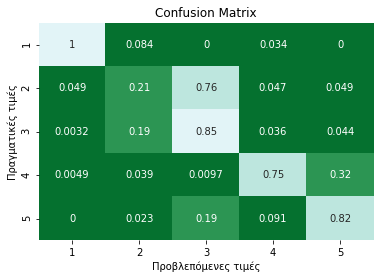


Macro avg f1 score: 63.462137944162635%
Accuracy(micro avg) f1 score: 64.84057971014494%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 47}



In [0]:
gnb_n_components = [i for i in range(40, 61)]

name, steps, indic = create_names_steps_dict("osm|pca", pca_n_components=gnb_n_components)
_, _ = estimation(gnb, steps, X_train, y_train, X_test, y_test, cval=5, in_dict=indic, mem='tmp')

---

Βλέπουμε τελικά ότι η βέλτιστη αριχτεκτονική για ταξινόμηση με 5 κατηγορίες, με ταξινομητή τον GNB, είναι η _Input > Oversampling > PCA_ με υπερπαράμετρο του PCA, n_components = 47.

F1-macro score: 63.46%
F1-micro score: 64.84%

**Δηλαδή, ακρίβεια των 64.84%**

---

Επαναλαμβάνουμε την εύρεση της optimal λύσης για το multilabeled classification πρόβλημα με GNB.

*****************************************************************
* Συνολικός χρόνος fit και predict: 0.27675676345825195 seconds *
*****************************************************************
              precision    recall  f1-score   support

           1       0.95      0.89      0.92       690
           2       0.39      0.19      0.26       690
           3       0.47      0.76      0.58       690
           4       0.78      0.67      0.72       690
           5       0.67      0.73      0.70       690

    accuracy                           0.65      3450
   macro avg       0.65      0.65      0.63      3450
weighted avg       0.65      0.65      0.63      3450



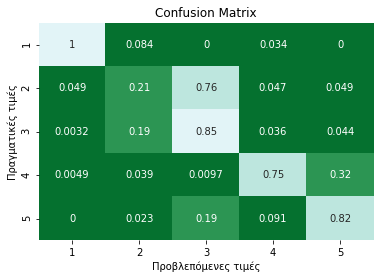


Macro avg f1 score: 63.462137944162635%
Accuracy(micro avg) f1 score: 64.84057971014494%

Βέλτιστες τιμές υπερπαραμέτρων:
{}



In [0]:
gnb_pca = PCA(n_components=47)
steps = [('sampler', ros), ('pca', gnb_pca)]
_, _ = estimation(gnb, steps, X_train, y_train, X_test, y_test, cval=5, in_dict={}, mem='tmp')

##**Δυαδική ταξινόμηση**

Εκπαιδεύουμε πάλι τους εκτιμητές αυτή τη φορά με τις δύο κατηγορίες μόνο.

###**Καμία βελτιστοποίηση και CV**

*****************************************************************
* Συνολικός χρόνος fit και predict: 0.03884100914001465 seconds *
*****************************************************************
              precision    recall  f1-score   support

           1       0.89      0.89      0.89       690
           2       0.97      0.97      0.97      2760

    accuracy                           0.96      3450
   macro avg       0.93      0.93      0.93      3450
weighted avg       0.96      0.96      0.96      3450



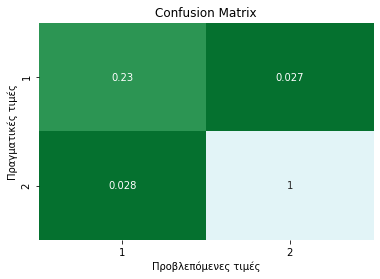


Macro avg f1 score: 93.34600673153463%
Accuracy(micro avg) f1 score: 95.73913043478261%




In [0]:
_, _ = estimation(gnb, [], X_train, bin_y_train, X_test, bin_y_test)

###**CrossValidation και Optimization**

Κανένα στάδιο προεπεξεργασίας
****************************************************************
* Συνολικός χρόνος fit και predict: 3.9037959575653076 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.89      0.89      0.89       690
           2       0.97      0.97      0.97      2760

    accuracy                           0.96      3450
   macro avg       0.93      0.93      0.93      3450
weighted avg       0.96      0.96      0.96      3450



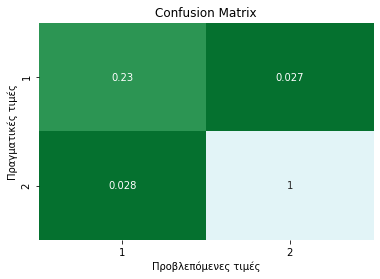


Macro avg f1 score: 93.34600673153463%
Accuracy(micro avg) f1 score: 95.73913043478261%

Βέλτιστες τιμές υπερπαραμέτρων:
{}

Input > Variance Threshold > Standard scaling
****************************************************************
* Συνολικός χρόνος fit και predict: 5.3740832805633545 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.89      0.89      0.89       690
           2       0.97      0.97      0.97      2760

    accuracy                           0.96      3450
   macro avg       0.93      0.93      0.93      3450
weighted avg       0.96      0.96      0.96      3450



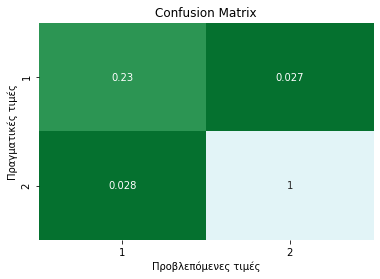


Macro avg f1 score: 93.34600673153463%
Accuracy(micro avg) f1 score: 95.73913043478261%

Βέλτιστες τιμές υπερπαραμέτρων:
{'selector__threshold': 0}

Input > Variance Threshold > Minmax scaling
****************************************************************
* Συνολικός χρόνος fit και predict: 2.9267373085021973 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.89      0.89      0.89       690
           2       0.97      0.97      0.97      2760

    accuracy                           0.96      3450
   macro avg       0.93      0.93      0.93      3450
weighted avg       0.96      0.96      0.96      3450



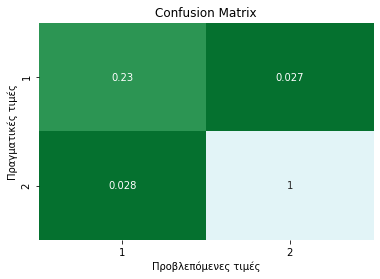


Macro avg f1 score: 93.34600673153463%
Accuracy(micro avg) f1 score: 95.73913043478261%

Βέλτιστες τιμές υπερπαραμέτρων:
{'selector__threshold': 0}

Input > Variance Threshold > Standard scaling > Oversampling
***************************************************************
* Συνολικός χρόνος fit και predict: 4.162403583526611 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.89      0.89      0.89       690
           2       0.97      0.97      0.97      2760

    accuracy                           0.96      3450
   macro avg       0.93      0.93      0.93      3450
weighted avg       0.96      0.96      0.96      3450



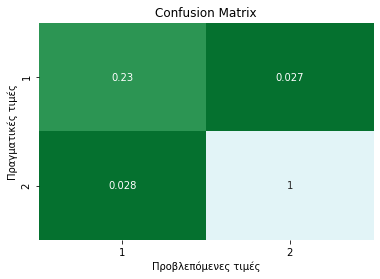


Macro avg f1 score: 93.34600673153463%
Accuracy(micro avg) f1 score: 95.73913043478261%

Βέλτιστες τιμές υπερπαραμέτρων:
{'selector__threshold': 0}

Input > Variance Threshold > Minmax scaling > Oversampling
***************************************************************
* Συνολικός χρόνος fit και predict: 4.129958152770996 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.89      0.90      0.89       690
           2       0.97      0.97      0.97      2760

    accuracy                           0.96      3450
   macro avg       0.93      0.93      0.93      3450
weighted avg       0.96      0.96      0.96      3450



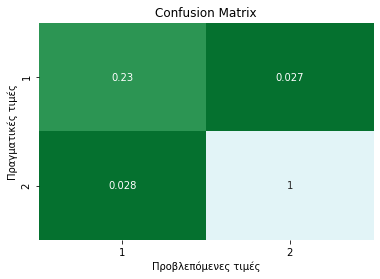


Macro avg f1 score: 93.3948571941112%
Accuracy(micro avg) f1 score: 95.76811594202898%

Βέλτιστες τιμές υπερπαραμέτρων:
{'selector__threshold': 0}

Input > Variance Threshold > Standard scaling > Undersampling
****************************************************************
* Συνολικός χρόνος fit και predict: 3.1606717109680176 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.89      0.89      0.89       690
           2       0.97      0.97      0.97      2760

    accuracy                           0.96      3450
   macro avg       0.93      0.93      0.93      3450
weighted avg       0.96      0.96      0.96      3450



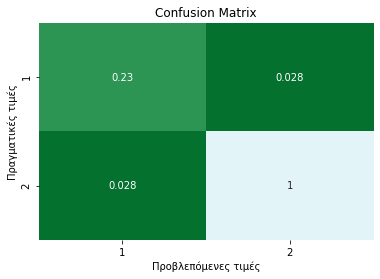


Macro avg f1 score: 93.16494569021584%
Accuracy(micro avg) f1 score: 95.6231884057971%

Βέλτιστες τιμές υπερπαραμέτρων:
{'selector__threshold': 27000}

Input > Variance Threshold > Minmax scaling > Undersampling
****************************************************************
* Συνολικός χρόνος fit και predict: 3.0465595722198486 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.89      0.90      0.89       690
           2       0.97      0.97      0.97      2760

    accuracy                           0.96      3450
   macro avg       0.93      0.93      0.93      3450
weighted avg       0.96      0.96      0.96      3450



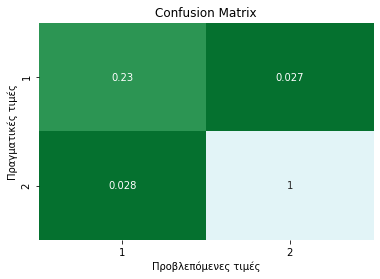


Macro avg f1 score: 93.3948571941112%
Accuracy(micro avg) f1 score: 95.76811594202898%

Βέλτιστες τιμές υπερπαραμέτρων:
{'selector__threshold': 0}

Input > Variance Threshold > Standard scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 71.57829451560974 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.91      0.94      0.93       690
           2       0.99      0.98      0.98      2760

    accuracy                           0.97      3450
   macro avg       0.95      0.96      0.95      3450
weighted avg       0.97      0.97      0.97      3450



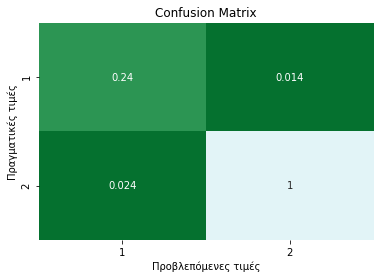


Macro avg f1 score: 95.35998642653777%
Accuracy(micro avg) f1 score: 96.98550724637681%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 20, 'selector__threshold': 24000}

Input > Variance Threshold > Minmax scaling > Oversampling > PCA
**************************************************************
* Συνολικός χρόνος fit και predict: 71.4307770729065 seconds *
**************************************************************
              precision    recall  f1-score   support

           1       0.90      0.94      0.92       690
           2       0.99      0.97      0.98      2760

    accuracy                           0.97      3450
   macro avg       0.95      0.96      0.95      3450
weighted avg       0.97      0.97      0.97      3450



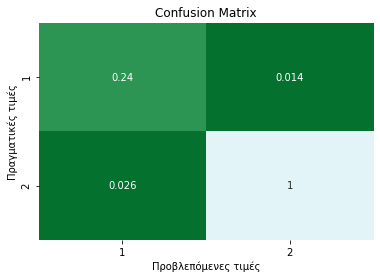


Macro avg f1 score: 95.23368623723836%
Accuracy(micro avg) f1 score: 96.89855072463767%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 20, 'selector__threshold': 0}

Input > Variance Threshold > Standard scaling > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 36.33423614501953 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.89      0.96      0.92       690
           2       0.99      0.97      0.98      2760

    accuracy                           0.97      3450
   macro avg       0.94      0.96      0.95      3450
weighted avg       0.97      0.97      0.97      3450



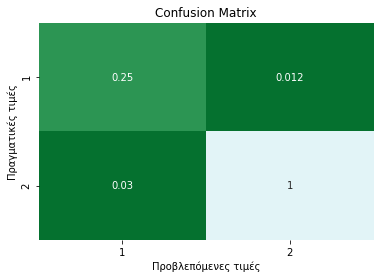


Macro avg f1 score: 95.10172537710446%
Accuracy(micro avg) f1 score: 96.78260869565217%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 20, 'selector__threshold': 24000}

Input > Variance Threshold > Minmax scaling > Undersampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 36.694783449172974 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.90      0.94      0.92       690
           2       0.99      0.97      0.98      2760

    accuracy                           0.97      3450
   macro avg       0.94      0.96      0.95      3450
weighted avg       0.97      0.97      0.97      3450



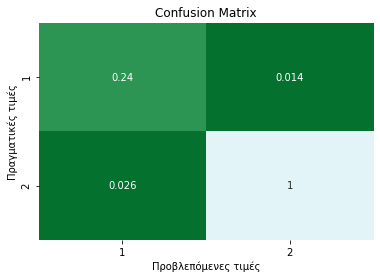


Macro avg f1 score: 95.1497014560956%
Accuracy(micro avg) f1 score: 96.84057971014492%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 20, 'selector__threshold': 0}

Input > Standard scaling > Oversampling
***************************************************************
* Συνολικός χρόνος fit και predict: 1.124115228652954 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.89      0.90      0.89       690
           2       0.97      0.97      0.97      2760

    accuracy                           0.96      3450
   macro avg       0.93      0.93      0.93      3450
weighted avg       0.96      0.96      0.96      3450



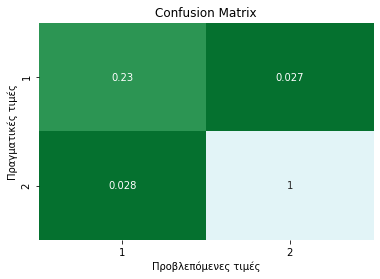


Macro avg f1 score: 93.3948571941112%
Accuracy(micro avg) f1 score: 95.76811594202898%

Βέλτιστες τιμές υπερπαραμέτρων:
{}

Input > Minmax scaling > Oversampling
****************************************************************
* Συνολικός χρόνος fit και predict: 1.0242547988891602 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.89      0.90      0.90       690
           2       0.97      0.97      0.97      2760

    accuracy                           0.96      3450
   macro avg       0.93      0.94      0.93      3450
weighted avg       0.96      0.96      0.96      3450



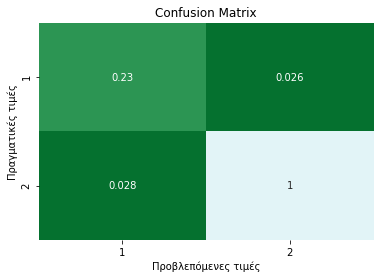


Macro avg f1 score: 93.44365296458943%
Accuracy(micro avg) f1 score: 95.79710144927536%

Βέλτιστες τιμές υπερπαραμέτρων:
{}

Input > Standard scaling > Undersampling
*****************************************************************
* Συνολικός χρόνος fit και predict: 0.45929765701293945 seconds *
*****************************************************************
              precision    recall  f1-score   support

           1       0.88      0.91      0.90       690
           2       0.98      0.97      0.97      2760

    accuracy                           0.96      3450
   macro avg       0.93      0.94      0.94      3450
weighted avg       0.96      0.96      0.96      3450



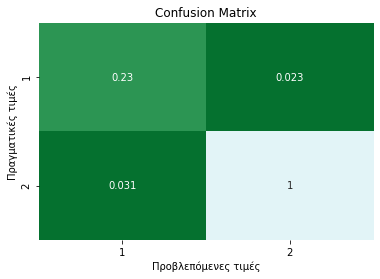


Macro avg f1 score: 93.59626609159618%
Accuracy(micro avg) f1 score: 95.85507246376812%

Βέλτιστες τιμές υπερπαραμέτρων:
{}

Input > Minmax scaling > Undersampling
*****************************************************************
* Συνολικός χρόνος fit και predict: 0.46486806869506836 seconds *
*****************************************************************
              precision    recall  f1-score   support

           1       0.89      0.91      0.90       690
           2       0.98      0.97      0.97      2760

    accuracy                           0.96      3450
   macro avg       0.93      0.94      0.94      3450
weighted avg       0.96      0.96      0.96      3450



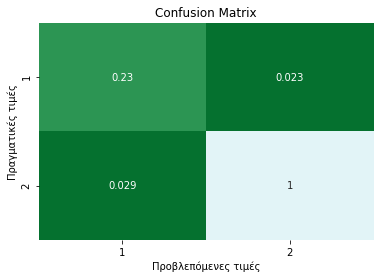


Macro avg f1 score: 93.76210620328001%
Accuracy(micro avg) f1 score: 95.97101449275362%

Βέλτιστες τιμές υπερπαραμέτρων:
{}

Input > Standard scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 15.09765338897705 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.90      0.95      0.93       690
           2       0.99      0.97      0.98      2760

    accuracy                           0.97      3450
   macro avg       0.95      0.96      0.95      3450
weighted avg       0.97      0.97      0.97      3450



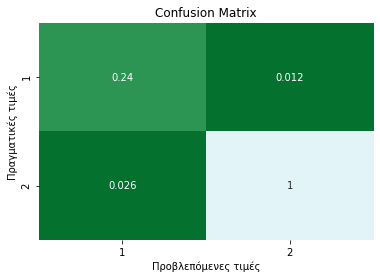


Macro avg f1 score: 95.46832696658385%
Accuracy(micro avg) f1 score: 97.04347826086956%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 20}

Input > Minmax scaling > Oversampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 14.437882423400879 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.90      0.95      0.92       690
           2       0.99      0.97      0.98      2760

    accuracy                           0.97      3450
   macro avg       0.94      0.96      0.95      3450
weighted avg       0.97      0.97      0.97      3450



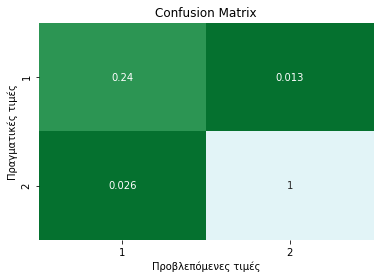


Macro avg f1 score: 95.2436938518478%
Accuracy(micro avg) f1 score: 96.89855072463767%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 20}

Input > Standard scaling > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 4.987669944763184 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.89      0.95      0.92       690
           2       0.99      0.97      0.98      2760

    accuracy                           0.97      3450
   macro avg       0.94      0.96      0.95      3450
weighted avg       0.97      0.97      0.97      3450



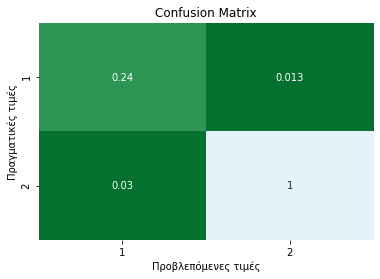


Macro avg f1 score: 94.96151896943911%
Accuracy(micro avg) f1 score: 96.69565217391303%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 20}

Input > Minmax scaling > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 4.787867069244385 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.89      0.95      0.92       690
           2       0.99      0.97      0.98      2760

    accuracy                           0.97      3450
   macro avg       0.94      0.96      0.95      3450
weighted avg       0.97      0.97      0.97      3450



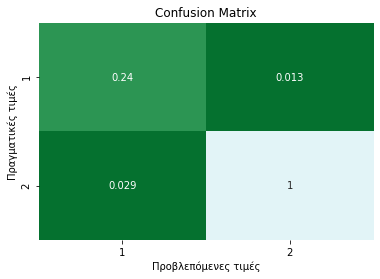


Macro avg f1 score: 94.99792847390563%
Accuracy(micro avg) f1 score: 96.72463768115942%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 20}

Input > Oversampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 14.116889715194702 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.90      0.95      0.92       690
           2       0.99      0.97      0.98      2760

    accuracy                           0.97      3450
   macro avg       0.94      0.96      0.95      3450
weighted avg       0.97      0.97      0.97      3450



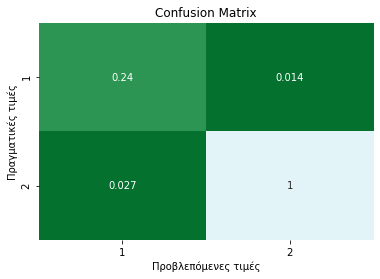


Macro avg f1 score: 95.15479093319075%
Accuracy(micro avg) f1 score: 96.84057971014492%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 20}

Input > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 4.303842306137085 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.90      0.94      0.92       690
           2       0.98      0.97      0.98      2760

    accuracy                           0.97      3450
   macro avg       0.94      0.96      0.95      3450
weighted avg       0.97      0.97      0.97      3450



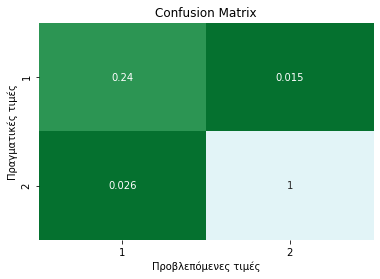


Macro avg f1 score: 95.00833236445375%
Accuracy(micro avg) f1 score: 96.7536231884058%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 20}

Input > Minmax scaling > Undersampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 2.1853508949279785 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.89      0.95      0.92       690
           2       0.99      0.97      0.98      2760

    accuracy                           0.97      3450
   macro avg       0.94      0.96      0.95      3450
weighted avg       0.97      0.97      0.97      3450



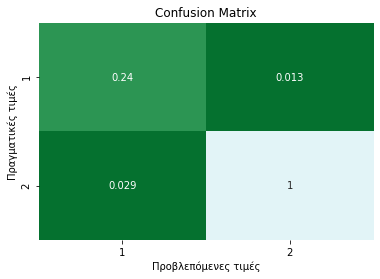


Macro avg f1 score: 94.99792847390563%
Accuracy(micro avg) f1 score: 96.72463768115942%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 20}



In [0]:
macro_scores = []
micro_scores = []
names = []
xxx = all_combinations()
for code in xxx:
  name, steps, indic = create_names_steps_dict(code, varthreshold, n_components)
  pprint(name)
  macro, micro = estimation(gnb, steps, X_train, bin_y_train, X_test, bin_y_test, cval=5, in_dict=indic, mem='tmp')
  macro_scores.append(macro)
  micro_scores.append(micro)
  names.append(name)

Στη συνέχεια για τις διάφορες αρχιτεκτονικές με τον GNB ταξινομητή παρουσιάζουμε ένα bar plot των αποδόσεών τους.

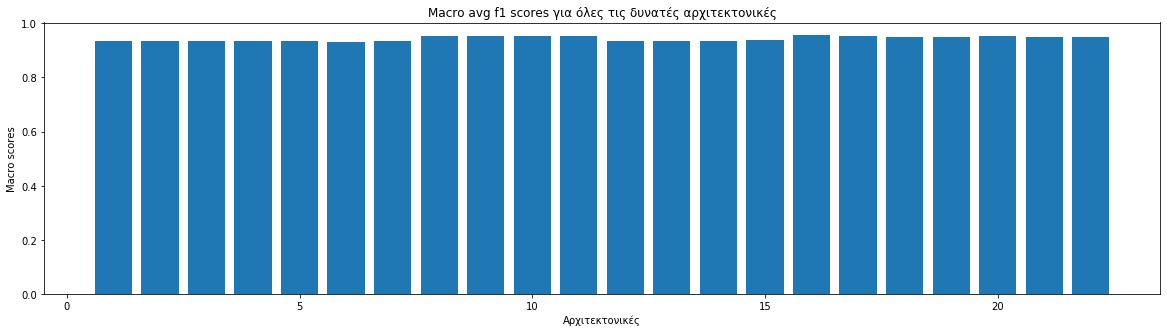

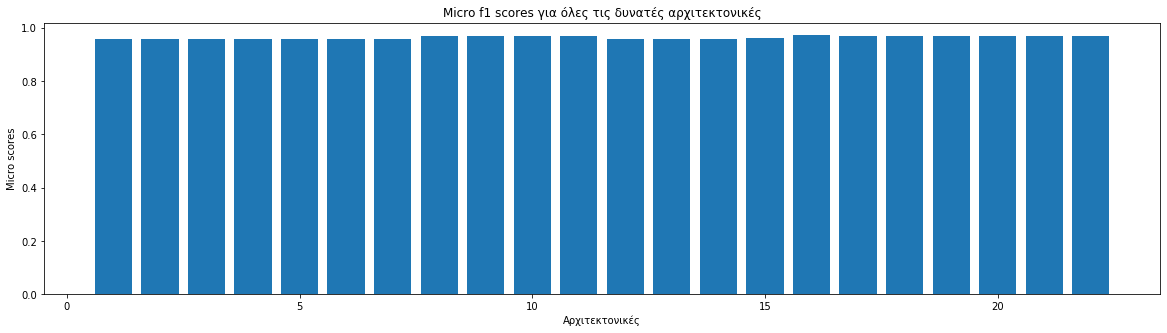


Υπόμνημα
1) Κανένα στάδιο προεπεξεργασίας
2) Input > Variance Threshold > Standard scaling
3) Input > Variance Threshold > Minmax scaling
4) Input > Variance Threshold > Standard scaling > Oversampling
5) Input > Variance Threshold > Minmax scaling > Oversampling
6) Input > Variance Threshold > Standard scaling > Undersampling
7) Input > Variance Threshold > Minmax scaling > Undersampling
8) Input > Variance Threshold > Standard scaling > Oversampling > PCA
9) Input > Variance Threshold > Minmax scaling > Oversampling > PCA
10) Input > Variance Threshold > Standard scaling > Undersampling > PCA
11) Input > Variance Threshold > Minmax scaling > Undersampling > PCA
12) Input > Standard scaling > Oversampling
13) Input > Minmax scaling > Oversampling
14) Input > Standard scaling > Undersampling
15) Input > Minmax scaling > Undersampling
16) Input > Standard scaling > Oversampling > PCA
17) Input > Minmax scaling > Oversampling > PCA
18) Input > Standard scaling > Undersampling > PCA
19) 

In [0]:
print_results(names, macro_scores, micro_scores)

Από τα προηγούμενα αποτελέσματα διαπιστώνουμε ότι η καλύτερη αρχιτεκτονική για τον gaussianNB ταξινομητή είναι η _Input > Standard scaling > Oversampling > PCA_ . Επομένως πάνω σε αυτήν θα επιχειρήσουμε να βελτιστοποιήσουμε τον ταξινομητή. Οι υπερπαράμετροι των μετασχηματιστών είναι {'pca__n_components': 20}, επομένως θα επικεντρωθούμε στην βελτιστοποίηση αυτών.

###**Progressive Optimization**

Αφού η καλύτερη τιμή της υπερπαρμέτρου n_components του PCA θεωρήθηκε η 20, θα ψάξουμε στο διάστημα [10, 30] ξανά για να αναζητήσουμε βέλτιστη τιμή για αυτή.

***************************************************************
* Συνολικός χρόνος fit και predict: 19.93817663192749 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.91      0.96      0.93       690
           2       0.99      0.98      0.98      2760

    accuracy                           0.97      3450
   macro avg       0.95      0.97      0.96      3450
weighted avg       0.97      0.97      0.97      3450



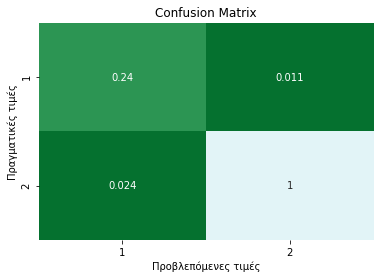


Macro avg f1 score: 95.81936996887023%
Accuracy(micro avg) f1 score: 97.27536231884058%

Βέλτιστες τιμές υπερπαραμέτρων:
{'pca__n_components': 17}



In [0]:
gnb_n_components = [i for i in range(10, 31)]

name, steps, indic = create_names_steps_dict("std|osm|pca", pca_n_components=gnb_n_components)
_, _ = estimation(gnb, steps, X_train, bin_y_train, X_test, bin_y_test, cval=5, in_dict=indic, mem='tmp')

---

Βλέπουμε τελικά ότι η βέλτιστη αριχτεκτονική για δυαδική ταξινόμηση, με ταξινομητή τον GNB, είναι η _Input > Standard scaling > Oversampling > PCA_ με υπερπαράμετρο του PCA, n_components = 17.

F1-macro score: 95.82%
F1-micro score: 97.28%

**Δηλαδή, ακρίβεια των 97.28%**

---

Επαναλαμβάνουμε την εύρεση της optimal λύσης για το binary classification πρόβλημα με GNB.

***************************************************************
* Συνολικός χρόνος fit και predict: 3.680952310562134 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.91      0.96      0.93       690
           2       0.99      0.98      0.98      2760

    accuracy                           0.97      3450
   macro avg       0.95      0.97      0.96      3450
weighted avg       0.97      0.97      0.97      3450



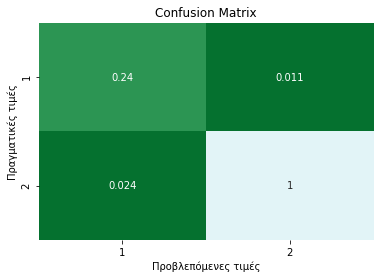


Macro avg f1 score: 95.81936996887023%
Accuracy(micro avg) f1 score: 97.27536231884058%

Βέλτιστες τιμές υπερπαραμέτρων:
{}



In [0]:
gnb_pca = PCA(n_components=17)
steps = [('scaler ', scaler_std), ('sampler', ros), ('pca', gnb_pca)]
_, _ = estimation(gnb, steps, X_train, bin_y_train, X_test, bin_y_test, cval=5, in_dict={}, mem='tmp')

#**kNearestNeighbor**

Στην ενότητα αυτή χρησιμοποιούμε τον ταξινομητή KNeighborsClassifier, ο οποίος επιλέγει ένα δείγμα σε ποιά κατηγορία ανήκει σύμφωνα με τους k γείτονές του δείγματος αυτού. Το αρνητικό με τον kNN ταξινομητή είναι ότι κατά το στάδιο του testing χρησιμοποιεί και το training set για να κάνει προβλέψεις, επομένως είναι και χρονοβόρος και κοστίζει σε μνήμη (αφού αποθηκεύει το training set για τις πράξεις). Για τους λόγους αυτούς από το αρχικό dataset θα χρησιμοποιήσουμε μόνο 1000 δείγματα για training και testing.

Θα μελετήσουμε πάλι τη συμπεριφορά της συνολικής αρχιτεκτονικής και του ταξινομητή για τις δύο περιπτώσεις:

1. Με 5 κατηγορίες
2. Με 2 κατηγορίες



In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_jobs=-1)

Και για τις δύο περιπτώσεις ακολουθούμε τα εξής βήματα:

1. Καμία βελτιστοποίηση και CV (Γ. Βaseline Classification)
2. CrossValidation και βελτιστοποίηση υπερπαραμέτρων (Δ. Βελτιστοποίηση ταξινομητών)
3. Progressive Βελτιστοποίηση (Δ. Βελτιστοποίηση ταξινομητών)

##**Ταξινόμηση με 5 κατηγορίες**

###**Καμία βελτιστοποίηση και CV**

*****************************************************************
* Συνολικός χρόνος fit και predict: 0.13781094551086426 seconds *
*****************************************************************
              precision    recall  f1-score   support

           1       1.00      0.45      0.62        60
           2       0.27      0.38      0.32        60
           3       0.24      0.58      0.34        59
           4       0.44      0.12      0.19        59
           5       0.16      0.08      0.11        62

    accuracy                           0.32       300
   macro avg       0.42      0.32      0.31       300
weighted avg       0.42      0.32      0.31       300



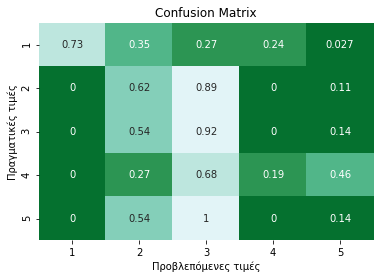


Macro avg f1 score: 31.444842742950264%
Accuracy(micro avg) f1 score: 32.0%




In [0]:
_, _ = estimation(knn, [], trimmed_X_train, trimmed_y_train, trimmed_X_test, trimmed_y_test)

###**CrossValidation και Optimization**

Κανένα στάδιο προεπεξεργασίας
***************************************************************
* Συνολικός χρόνος fit και predict: 8.217867851257324 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.97      0.65      0.78        60
           2       0.34      0.45      0.39        60
           3       0.28      0.58      0.38        59
           4       0.67      0.20      0.31        59
           5       0.26      0.18      0.21        62

    accuracy                           0.41       300
   macro avg       0.50      0.41      0.41       300
weighted avg       0.50      0.41      0.41       300



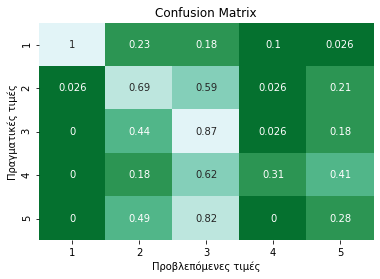


Macro avg f1 score: 41.39179196003278%
Accuracy(micro avg) f1 score: 41.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1}

Input > Variance Threshold > Standard scaling
***************************************************************
* Συνολικός χρόνος fit και predict: 53.33818984031677 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.89      0.70      0.79        60
           2       0.28      0.50      0.36        60
           3       0.28      0.46      0.35        59
           4       0.65      0.19      0.29        59
           5       0.47      0.24      0.32        62

    accuracy                           0.42       300
   macro avg       0.51      0.42      0.42       300
weighted avg       0.51      0.42      0.42       300



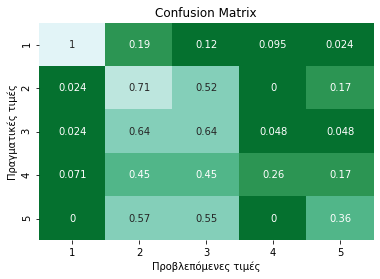


Macro avg f1 score: 41.98398606539505%
Accuracy(micro avg) f1 score: 41.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 3, 'selector__threshold': 29000}

Input > Variance Threshold > Minmax scaling
****************************************************************
* Συνολικός χρόνος fit και predict: 53.106682538986206 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.93      0.62      0.74        60
           2       0.30      0.37      0.33        60
           3       0.32      0.54      0.40        59
           4       0.45      0.25      0.33        59
           5       0.32      0.27      0.30        62

    accuracy                           0.41       300
   macro avg       0.46      0.41      0.42       300
weighted avg       0.46      0.41      0.42       300



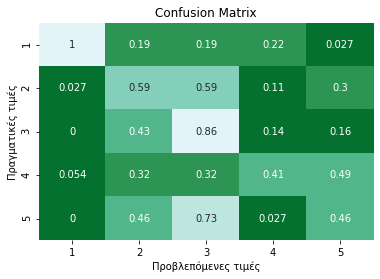


Macro avg f1 score: 41.85226125320894%
Accuracy(micro avg) f1 score: 41.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'selector__threshold': 29000}

Input > Variance Threshold > Standard scaling > Oversampling
***************************************************************
* Συνολικός χρόνος fit και predict: 54.41240215301514 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.92      0.57      0.70        60
           2       0.29      0.37      0.33        60
           3       0.31      0.56      0.40        59
           4       0.44      0.24      0.31        59
           5       0.34      0.27      0.30        62

    accuracy                           0.40       300
   macro avg       0.46      0.40      0.41       300
weighted avg       0.46      0.40      0.41       300



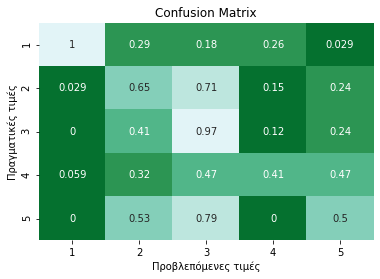


Macro avg f1 score: 40.76441180049427%
Accuracy(micro avg) f1 score: 40.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'selector__threshold': 29000}

Input > Variance Threshold > Minmax scaling > Oversampling
****************************************************************
* Συνολικός χρόνος fit και predict: 54.450886726379395 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.93      0.62      0.74        60
           2       0.30      0.37      0.33        60
           3       0.32      0.54      0.40        59
           4       0.45      0.25      0.33        59
           5       0.32      0.27      0.30        62

    accuracy                           0.41       300
   macro avg       0.46      0.41      0.42       300
weighted avg       0.46      0.41      0.42       300



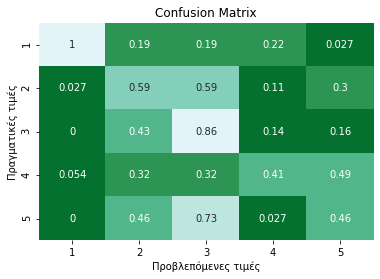


Macro avg f1 score: 41.85226125320894%
Accuracy(micro avg) f1 score: 41.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'selector__threshold': 29000}

Input > Variance Threshold > Standard scaling > Undersampling
***************************************************************
* Συνολικός χρόνος fit και predict: 54.21391153335571 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.92      0.57      0.70        60
           2       0.30      0.38      0.34        60
           3       0.31      0.56      0.40        59
           4       0.44      0.24      0.31        59
           5       0.35      0.27      0.31        62

    accuracy                           0.40       300
   macro avg       0.46      0.40      0.41       300
weighted avg       0.46      0.40      0.41       300



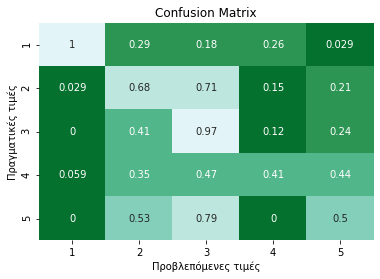


Macro avg f1 score: 41.07161135951864%
Accuracy(micro avg) f1 score: 40.33333333333333%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'selector__threshold': 29000}

Input > Variance Threshold > Minmax scaling > Undersampling
****************************************************************
* Συνολικός χρόνος fit και predict: 54.366178035736084 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.93      0.62      0.74        60
           2       0.30      0.37      0.33        60
           3       0.32      0.54      0.40        59
           4       0.44      0.25      0.32        59
           5       0.33      0.27      0.30        62

    accuracy                           0.41       300
   macro avg       0.46      0.41      0.42       300
weighted avg       0.46      0.41      0.42       300



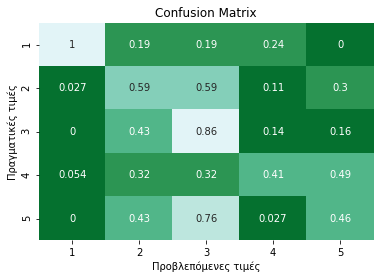


Macro avg f1 score: 41.83306653731102%
Accuracy(micro avg) f1 score: 41.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'selector__threshold': 29000}

Input > Variance Threshold > Standard scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 572.5219147205353 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.92      0.60      0.73        60
           2       0.39      0.53      0.45        60
           3       0.30      0.47      0.37        59
           4       0.69      0.19      0.29        59
           5       0.36      0.40      0.38        62

    accuracy                           0.44       300
   macro avg       0.53      0.44      0.44       300
weighted avg       0.53      0.44      0.44       300



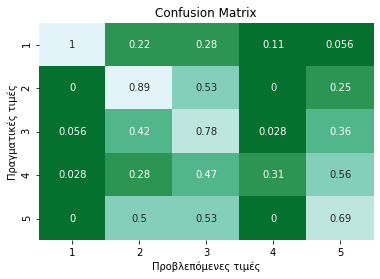


Macro avg f1 score: 44.36517900206128%
Accuracy(micro avg) f1 score: 44.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 3, 'pca__n_components': 25, 'selector__threshold': 21000}

Input > Variance Threshold > Minmax scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 572.0609548091888 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.93      0.62      0.74        60
           2       0.40      0.38      0.39        60
           3       0.31      0.49      0.38        59
           4       0.62      0.34      0.44        59
           5       0.32      0.39      0.35        62

    accuracy                           0.44       300
   macro avg       0.51      0.44      0.46       300
weighted avg       0.51      0.44      0.46       300



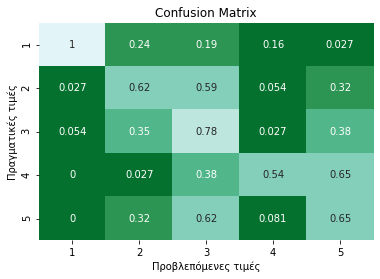


Macro avg f1 score: 45.92758576324084%
Accuracy(micro avg) f1 score: 44.333333333333336%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 30, 'selector__threshold': 18000}

Input > Variance Threshold > Standard scaling > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 572.7577667236328 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.97      0.65      0.78        60
           2       0.26      0.30      0.28        60
           3       0.32      0.54      0.40        59
           4       0.45      0.29      0.35        59
           5       0.30      0.26      0.28        62

    accuracy                           0.41       300
   macro avg       0.46      0.41      0.42       300
weighted avg       0.46      0.41      0.42       300



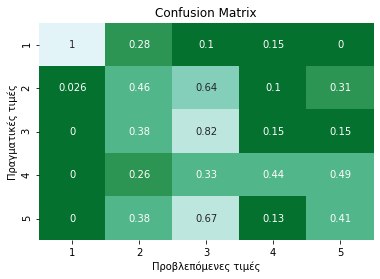


Macro avg f1 score: 41.80723648390089%
Accuracy(micro avg) f1 score: 40.666666666666664%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 20, 'selector__threshold': 27000}

Input > Variance Threshold > Minmax scaling > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 573.3135960102081 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.92      0.60      0.73        60
           2       0.43      0.38      0.40        60
           3       0.32      0.49      0.39        59
           4       0.54      0.34      0.42        59
           5       0.32      0.40      0.35        62

    accuracy                           0.44       300
   macro avg       0.50      0.44      0.46       300
weighted avg       0.50      0.44      0.46       300



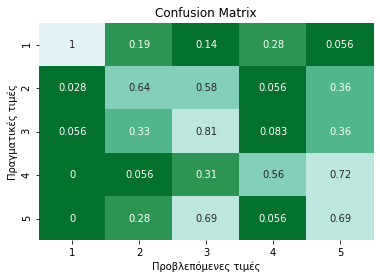


Macro avg f1 score: 45.77449523227799%
Accuracy(micro avg) f1 score: 44.333333333333336%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 25, 'selector__threshold': 18000}

Input > Standard scaling > Oversampling
****************************************************************
* Συνολικός χρόνος fit και predict: 5.2333290576934814 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.95      0.62      0.75        60
           2       0.34      0.47      0.39        60
           3       0.27      0.53      0.36        59
           4       0.65      0.22      0.33        59
           5       0.29      0.21      0.24        62

    accuracy                           0.41       300
   macro avg       0.50      0.41      0.41       300
weighted avg       0.50      0.41      0.41       300



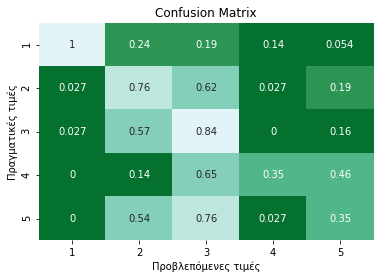


Macro avg f1 score: 41.433056672368984%
Accuracy(micro avg) f1 score: 40.666666666666664%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1}

Input > Minmax scaling > Oversampling
***************************************************************
* Συνολικός χρόνος fit και predict: 5.090650320053101 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.92      0.60      0.73        60
           2       0.37      0.45      0.41        60
           3       0.29      0.58      0.38        59
           4       0.68      0.25      0.37        59
           5       0.33      0.26      0.29        62

    accuracy                           0.43       300
   macro avg       0.52      0.43      0.44       300
weighted avg       0.52      0.43      0.44       300



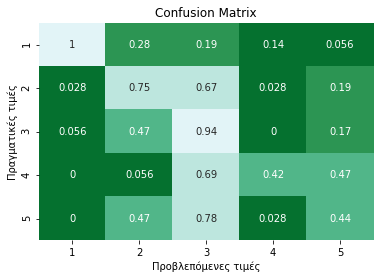


Macro avg f1 score: 43.57496034213251%
Accuracy(micro avg) f1 score: 42.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1}

Input > Standard scaling > Undersampling
***************************************************************
* Συνολικός χρόνος fit και predict: 5.015824556350708 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.95      0.62      0.75        60
           2       0.33      0.45      0.38        60
           3       0.26      0.53      0.35        59
           4       0.65      0.22      0.33        59
           5       0.26      0.18      0.21        62

    accuracy                           0.40       300
   macro avg       0.49      0.40      0.40       300
weighted avg       0.49      0.40      0.40       300



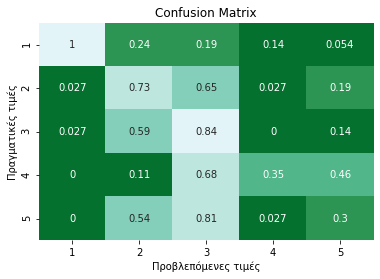


Macro avg f1 score: 40.41363100954829%
Accuracy(micro avg) f1 score: 39.666666666666664%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1}

Input > Minmax scaling > Undersampling
***************************************************************
* Συνολικός χρόνος fit και predict: 5.069848299026489 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.92      0.60      0.73        60
           2       0.38      0.45      0.41        60
           3       0.29      0.58      0.38        59
           4       0.68      0.25      0.37        59
           5       0.33      0.26      0.29        62

    accuracy                           0.43       300
   macro avg       0.52      0.43      0.44       300
weighted avg       0.52      0.43      0.44       300



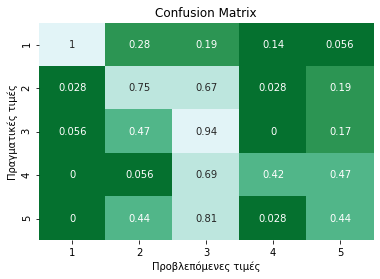


Macro avg f1 score: 43.593311391064205%
Accuracy(micro avg) f1 score: 42.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1}

Input > Standard scaling > Oversampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 54.359731912612915 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.95      0.67      0.78        60
           2       0.38      0.37      0.37        60
           3       0.26      0.39      0.31        59
           4       0.67      0.37      0.48        59
           5       0.30      0.37      0.33        62

    accuracy                           0.43       300
   macro avg       0.51      0.43      0.46       300
weighted avg       0.51      0.43      0.45       300



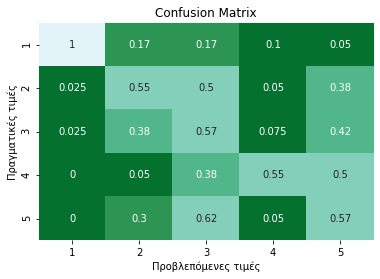


Macro avg f1 score: 45.50232070001886%
Accuracy(micro avg) f1 score: 43.333333333333336%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 25}

Input > Minmax scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 54.12502932548523 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.93      0.62      0.74        60
           2       0.41      0.37      0.39        60
           3       0.30      0.46      0.36        59
           4       0.59      0.32      0.42        59
           5       0.28      0.37      0.32        62

    accuracy                           0.43       300
   macro avg       0.50      0.43      0.44       300
weighted avg       0.50      0.43      0.44       300



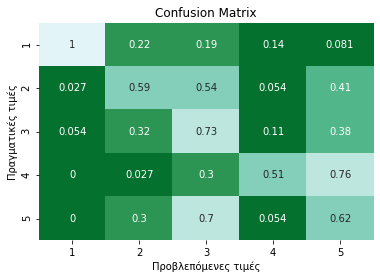


Macro avg f1 score: 44.415774183469296%
Accuracy(micro avg) f1 score: 42.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 25}

Input > Standard scaling > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 54.17604875564575 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.95      0.65      0.77        60
           2       0.37      0.37      0.37        60
           3       0.26      0.39      0.31        59
           4       0.58      0.31      0.40        59
           5       0.30      0.39      0.34        62

    accuracy                           0.42       300
   macro avg       0.49      0.42      0.44       300
weighted avg       0.49      0.42      0.44       300



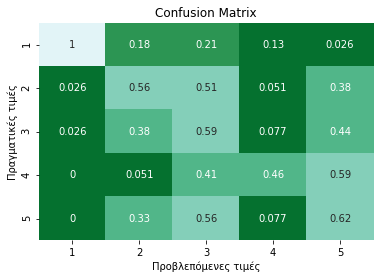


Macro avg f1 score: 43.81728213414663%
Accuracy(micro avg) f1 score: 42.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 25}

Input > Minmax scaling > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 54.26830244064331 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.93      0.62      0.74        60
           2       0.43      0.37      0.40        60
           3       0.30      0.49      0.37        59
           4       0.56      0.32      0.41        59
           5       0.27      0.34      0.30        62

    accuracy                           0.43       300
   macro avg       0.50      0.43      0.44       300
weighted avg       0.50      0.43      0.44       300



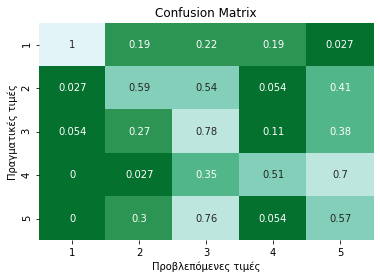


Macro avg f1 score: 44.331671438153656%
Accuracy(micro avg) f1 score: 42.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 25}

Input > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 52.81541872024536 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.95      0.62      0.75        60
           2       0.39      0.42      0.40        60
           3       0.27      0.44      0.33        59
           4       0.60      0.25      0.36        59
           5       0.28      0.34      0.31        62

    accuracy                           0.41       300
   macro avg       0.50      0.41      0.43       300
weighted avg       0.50      0.41      0.43       300



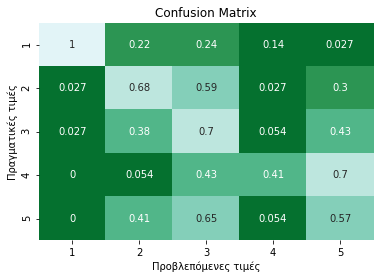


Macro avg f1 score: 42.95492174936488%
Accuracy(micro avg) f1 score: 41.333333333333336%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 30}

Input > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 52.58517861366272 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.95      0.60      0.73        60
           2       0.39      0.42      0.40        60
           3       0.27      0.47      0.34        59
           4       0.64      0.31      0.41        59
           5       0.30      0.32      0.31        62

    accuracy                           0.42       300
   macro avg       0.51      0.42      0.44       300
weighted avg       0.51      0.42      0.44       300



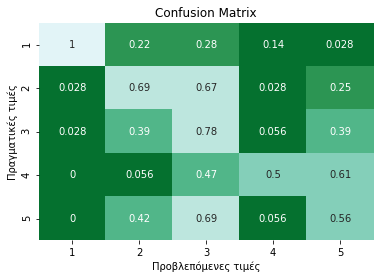


Macro avg f1 score: 44.15542139318996%
Accuracy(micro avg) f1 score: 42.333333333333336%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 30}

Input > Minmax scaling > Undersampling > PCA
**************************************************************
* Συνολικός χρόνος fit και predict: 53.4920928478241 seconds *
**************************************************************
              precision    recall  f1-score   support

           1       0.93      0.62      0.74        60
           2       0.43      0.37      0.40        60
           3       0.30      0.49      0.37        59
           4       0.56      0.32      0.41        59
           5       0.27      0.34      0.30        62

    accuracy                           0.43       300
   macro avg       0.50      0.43      0.44       300
weighted avg       0.50      0.43      0.44       300



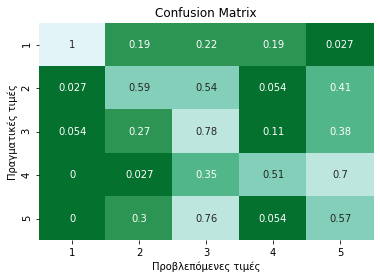


Macro avg f1 score: 44.331671438153656%
Accuracy(micro avg) f1 score: 42.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 25}



In [0]:
macro_scores = []
micro_scores = []
names = []

k_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
knn = KNeighborsClassifier(n_jobs=-1)
combos = all_combinations()
for code in combos:
  name, steps, indic = create_names_steps_dict(code, varthreshold, n_components)
  indic['classifier__n_neighbors'] = k_list

  pprint(name)

  macro, micro = estimation(knn, steps, trimmed_X_train, trimmed_y_train, trimmed_X_test, trimmed_y_test, cval=5, in_dict=indic, mem='tmp')
  macro_scores.append(macro)
  micro_scores.append(micro)
  names.append(name)

Στη συνέχεια για τις διάφορες αρχιτεκτονικές με τον kNN ταξινομητή παρουσιάζουμε ένα bar plot των αποδόσεών τους.

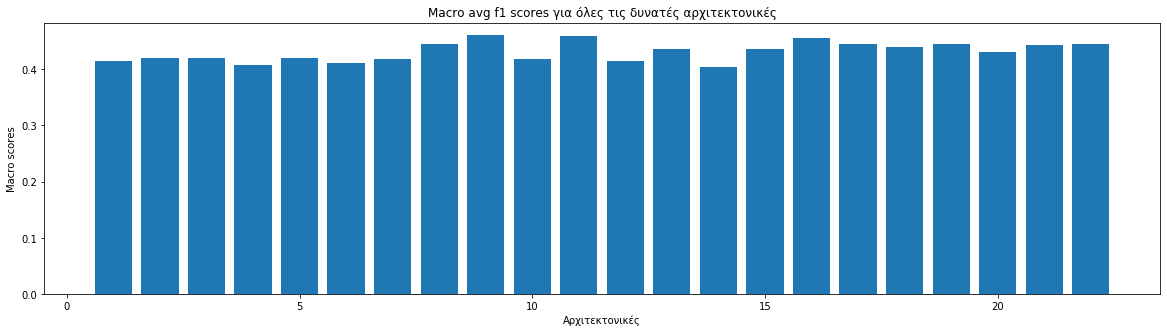

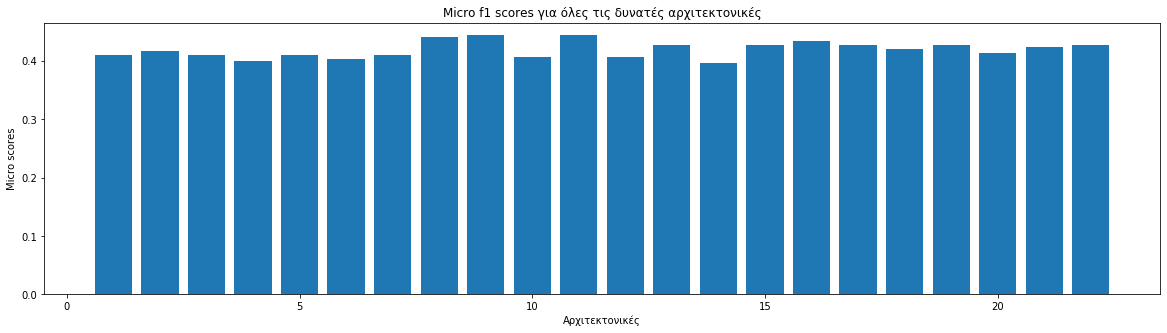


Υπόμνημα
1) Κανένα στάδιο προεπεξεργασίας
2) Input > Variance Threshold > Standard scaling
3) Input > Variance Threshold > Minmax scaling
4) Input > Variance Threshold > Standard scaling > Oversampling
5) Input > Variance Threshold > Minmax scaling > Oversampling
6) Input > Variance Threshold > Standard scaling > Undersampling
7) Input > Variance Threshold > Minmax scaling > Undersampling
8) Input > Variance Threshold > Standard scaling > Oversampling > PCA
9) Input > Variance Threshold > Minmax scaling > Oversampling > PCA
10) Input > Variance Threshold > Standard scaling > Undersampling > PCA
11) Input > Variance Threshold > Minmax scaling > Undersampling > PCA
12) Input > Standard scaling > Oversampling
13) Input > Minmax scaling > Oversampling
14) Input > Standard scaling > Undersampling
15) Input > Minmax scaling > Undersampling
16) Input > Standard scaling > Oversampling > PCA
17) Input > Minmax scaling > Oversampling > PCA
18) Input > Standard scaling > Undersampling > PCA
19) 

In [0]:
print_results(names, macro_scores, micro_scores)

Σύμφωνα με την αναφορά προκύπτει ότι ο καλύτερος εκτιμητής θα έχει τις ακόλουθες  τιμές για υπερπαραμέτρους
{'classifier__n_neighbors': 1, 'pca__n_components': 30, 'selector__threshold': 18000}. Ως καλύτερη αρχιτεκτονική προκύπτει η _Input > Variance Threshold > Minmax scaling > Oversampling > PCA_ και για τις δύο μετρικές μας.

###**Progressive Optimization**

Προχωράμε σε περαιτέρω βελτίωση των υπερπαραμέτρων της αρχιτεκτονικής σε αυτή την υποενότητα. Εκτελούμε αυτό τον έλεγχο κυρίως για να συμπληρωθεί η συνολική αναφορά καθώς ήδη παρατηρούμε ότι τα ποσοστά πρόβλεψης είναι πολύ χαμηλα.

***************************************************************
* Συνολικός χρόνος fit και predict: 332.7855520248413 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.98      0.80      0.88       690
           2       0.47      0.65      0.54       690
           3       0.44      0.59      0.50       690
           4       0.78      0.43      0.55       690
           5       0.39      0.36      0.37       690

    accuracy                           0.56      3450
   macro avg       0.61      0.56      0.57      3450
weighted avg       0.61      0.56      0.57      3450



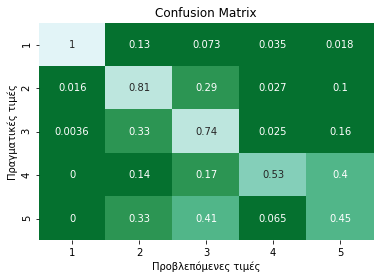


Macro avg f1 score: 56.98236575024691%
Accuracy(micro avg) f1 score: 56.34782608695652%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 26, 'selector__threshold': 17000}



In [0]:
knn_thresholds = [17000, 17300, 17600, 17900, 18000, 18300, 18600, 18900]
knn_pcas = [x for x in range(26, 40)]

name, steps, indic = create_names_steps_dict("var|mmx|osm|pca", sel_varthresholds=knn_thresholds, pca_n_components=knn_pcas)
indic['classifier__n_neighbors'] = [1]
_, _ = estimation(knn,steps, X_train, y_train, X_test, y_test, cval=5, in_dict=indic, mem='tmp')

Τα νολυμερα μας ενημερωνουμε ότι πρέπει να μειώσουμε τόσο το threshold του VarianceThreshold όσο και του PCA αλλά γνωρίζουμε ήδη ότι περαιτέρω μείωση αυτών των χαρακτηριστικών δε θα επιφέρει βελτίωση καθώς αρχίζει να μειώνεται η ποιότητα της πληροφορίας εκπαίδευσης.

---

Βλέπουμε τελικά ότι η βέλτιστη αριχτεκτονική για ταξινόμηση με 5 κατηγορίες, με ταξινομητή τον kNN, είναι η _Input > Variance Threshold > Minmax scaling > Oversampling > PCA_ με:

1. n_neighbors = 1, για kNN
2. n_components = 26, για PCA
3. threshold = 17000, για VarianceThreshold

ως βέλτιστες υπερπαραμέτρους.

Και scores:

1. F1-macro score: 56.98%
2. F1-micro score: 56.35%

**Δηλαδή, ακρίβεια των 56.35%**

---

###**Σημαντική παρατήρηση**

Όπως είδαμε και στην αρχική απεικόνιση των δειγμάτων με τη βοήθεια του PCA οι κατηγορίες 3,4,5 ήταν πολύ κοντά η μία στην άλλη. Ο kNN προσπαθώντας να αποφασίσει σε ποια κατηγορία ανήκει ένα δείγμα κοιτάζει τους γείτονές του. Όταν όμως οι γείτονες ενός δείγματος είναι τόσοι πολλοί με πολλές διαφορετικές κατηγορίες ο kNN δεν έχει καλή ιδέα/ευκρίνια για τα σύνορα. Για το λόγο αυτό παρατηρούμε μειωμένα ποσοστά πρόβλεψης.

##**Δυαδική Ταξινόμηση**

Όπως και πριν μετατρέπουμε τόσο τους στόχους εκπαίδευσης όσο και του ελέγχου σε νέους δυαδικούς. Όπου εμφανίζονται οι αριθμοί 2,3,4,5 μέσα στους πίνακες αυτούς τους μετατρέπουμε σε 2. 

In [0]:
bin_trimmed_y_train = trimmed_y_train.copy()
for i in range(0, len(trimmed_y_train)):
  if trimmed_y_train[i] > 1:
    bin_trimmed_y_train[i] = 2

bin_trimmed_y_test = trimmed_y_test.copy()
for i in range(0, len(trimmed_y_test)):
  if trimmed_y_test[i] > 1:
    bin_trimmed_y_test[i] = 2

###**Χωρίς βελτιστοποίηση και CV**

*****************************************************************
* Συνολικός χρόνος fit και predict: 0.11730074882507324 seconds *
*****************************************************************
              precision    recall  f1-score   support

           1       1.00      0.28      0.44        60
           2       0.85      1.00      0.92       240

    accuracy                           0.86       300
   macro avg       0.92      0.64      0.68       300
weighted avg       0.88      0.86      0.82       300



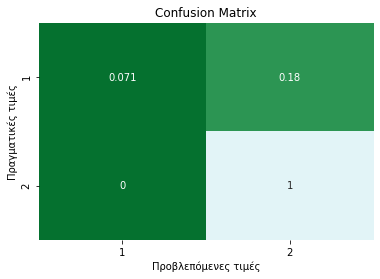


Macro avg f1 score: 67.96702341635421%
Accuracy(micro avg) f1 score: 85.66666666666667%




In [0]:
_, _ = estimation(knn, [], trimmed_X_train, bin_trimmed_y_train, trimmed_X_test, bin_trimmed_y_test)

###**CrossValidation και optimization**

Κανένα στάδιο προεπεξεργασίας
****************************************************************
* Συνολικός χρόνος fit και predict: 1.3580682277679443 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.97      0.65      0.78        60
           2       0.92      1.00      0.96       240

    accuracy                           0.93       300
   macro avg       0.95      0.82      0.87       300
weighted avg       0.93      0.93      0.92       300



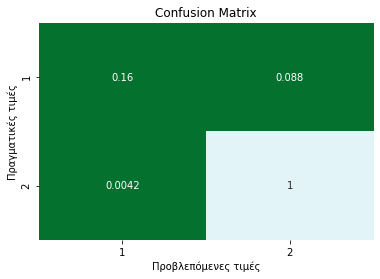


Macro avg f1 score: 86.8%
Accuracy(micro avg) f1 score: 92.66666666666666%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1}

Input > Variance Threshold > Standard scaling
****************************************************************
* Συνολικός χρόνος fit και predict: 13.319857358932495 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.92      0.57      0.70        60
           2       0.90      0.99      0.94       240

    accuracy                           0.90       300
   macro avg       0.91      0.78      0.82       300
weighted avg       0.90      0.90      0.89       300



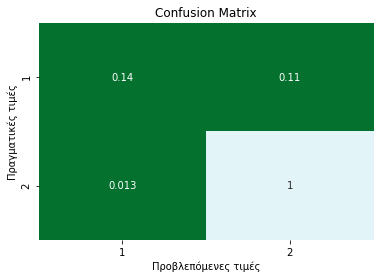


Macro avg f1 score: 82.16884261441659%
Accuracy(micro avg) f1 score: 90.33333333333333%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'selector__threshold': 29000}

Input > Variance Threshold > Minmax scaling
***************************************************************
* Συνολικός χρόνος fit και predict: 13.34821629524231 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.93      0.62      0.74        60
           2       0.91      0.99      0.95       240

    accuracy                           0.91       300
   macro avg       0.92      0.80      0.84       300
weighted avg       0.91      0.91      0.91       300



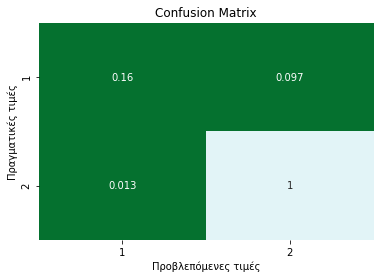


Macro avg f1 score: 84.39999999999999%
Accuracy(micro avg) f1 score: 91.33333333333333%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'selector__threshold': 29000}

Input > Variance Threshold > Standard scaling > Oversampling
****************************************************************
* Συνολικός χρόνος fit και predict: 13.942012548446655 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.90      0.73      0.81        60
           2       0.94      0.98      0.96       240

    accuracy                           0.93       300
   macro avg       0.92      0.86      0.88       300
weighted avg       0.93      0.93      0.93       300



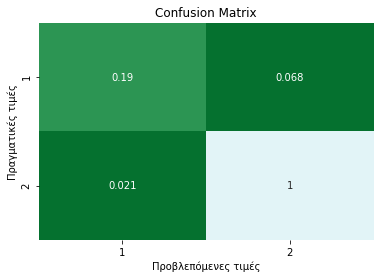


Macro avg f1 score: 88.22847960537379%
Accuracy(micro avg) f1 score: 93.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 5, 'selector__threshold': 29000}

Input > Variance Threshold > Minmax scaling > Oversampling
****************************************************************
* Συνολικός χρόνος fit και predict: 13.915894508361816 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.94      0.73      0.82        60
           2       0.94      0.99      0.96       240

    accuracy                           0.94       300
   macro avg       0.94      0.86      0.89       300
weighted avg       0.94      0.94      0.93       300



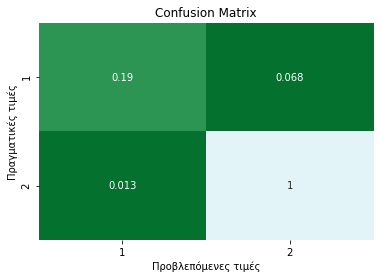


Macro avg f1 score: 89.19451763947603%
Accuracy(micro avg) f1 score: 93.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 5, 'selector__threshold': 29000}

Input > Variance Threshold > Standard scaling > Undersampling
****************************************************************
* Συνολικός χρόνος fit και predict: 13.322914123535156 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.91      0.80      0.85        60
           2       0.95      0.98      0.97       240

    accuracy                           0.94       300
   macro avg       0.93      0.89      0.91       300
weighted avg       0.94      0.94      0.94       300



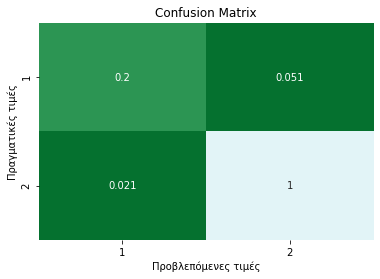


Macro avg f1 score: 90.73249622939798%
Accuracy(micro avg) f1 score: 94.33333333333334%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'selector__threshold': 29000}

Input > Variance Threshold > Minmax scaling > Undersampling
***************************************************************
* Συνολικός χρόνος fit και predict: 13.28281044960022 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.92      0.80      0.86        60
           2       0.95      0.98      0.97       240

    accuracy                           0.95       300
   macro avg       0.94      0.89      0.91       300
weighted avg       0.95      0.95      0.95       300



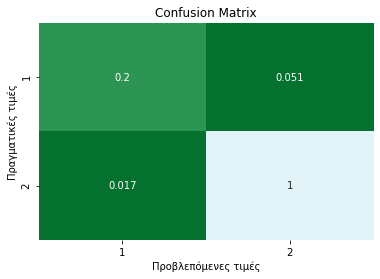


Macro avg f1 score: 91.21779859484778%
Accuracy(micro avg) f1 score: 94.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'selector__threshold': 29000}

Input > Variance Threshold > Standard scaling > Oversampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 144.52944707870483 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.90      0.78      0.84        60
           2       0.95      0.98      0.96       240

    accuracy                           0.94       300
   macro avg       0.93      0.88      0.90       300
weighted avg       0.94      0.94      0.94       300



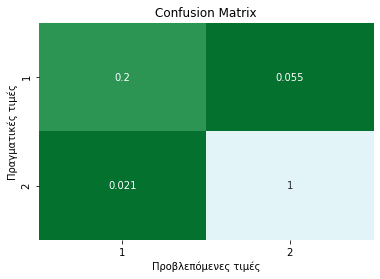


Macro avg f1 score: 90.12002341920376%
Accuracy(micro avg) f1 score: 94.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 5, 'pca__n_components': 20, 'selector__threshold': 29000}

Input > Variance Threshold > Minmax scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 145.0975148677826 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.94      0.73      0.82        60
           2       0.94      0.99      0.96       240

    accuracy                           0.94       300
   macro avg       0.94      0.86      0.89       300
weighted avg       0.94      0.94      0.93       300



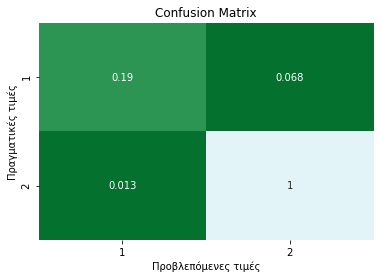


Macro avg f1 score: 89.19451763947603%
Accuracy(micro avg) f1 score: 93.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 5, 'pca__n_components': 30, 'selector__threshold': 29000}

Input > Variance Threshold > Standard scaling > Undersampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 141.99316143989563 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.90      0.78      0.84        60
           2       0.95      0.98      0.96       240

    accuracy                           0.94       300
   macro avg       0.93      0.88      0.90       300
weighted avg       0.94      0.94      0.94       300



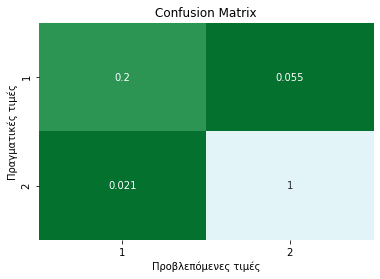


Macro avg f1 score: 90.12002341920376%
Accuracy(micro avg) f1 score: 94.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 25, 'selector__threshold': 29000}

Input > Variance Threshold > Minmax scaling > Undersampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 142.48706126213074 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.93      0.83      0.88        60
           2       0.96      0.98      0.97       240

    accuracy                           0.95       300
   macro avg       0.94      0.91      0.92       300
weighted avg       0.95      0.95      0.95       300



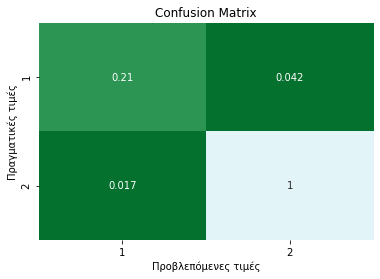


Macro avg f1 score: 92.41931990470002%
Accuracy(micro avg) f1 score: 95.33333333333334%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 20, 'selector__threshold': 29000}

Input > Standard scaling > Oversampling
***************************************************************
* Συνολικός χρόνος fit και predict: 1.481961727142334 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.98      0.70      0.82        60
           2       0.93      1.00      0.96       240

    accuracy                           0.94       300
   macro avg       0.95      0.85      0.89       300
weighted avg       0.94      0.94      0.93       300



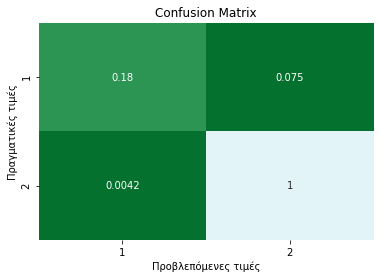


Macro avg f1 score: 88.86523021624895%
Accuracy(micro avg) f1 score: 93.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 5}

Input > Minmax scaling > Oversampling
****************************************************************
* Συνολικός χρόνος fit και predict: 1.4675719738006592 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.94      0.73      0.82        60
           2       0.94      0.99      0.96       240

    accuracy                           0.94       300
   macro avg       0.94      0.86      0.89       300
weighted avg       0.94      0.94      0.93       300



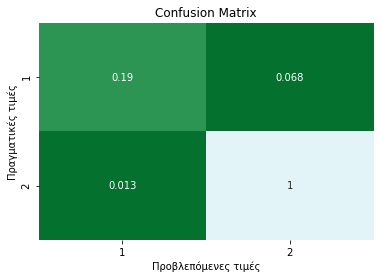


Macro avg f1 score: 89.19451763947603%
Accuracy(micro avg) f1 score: 93.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 5}

Input > Standard scaling > Undersampling
****************************************************************
* Συνολικός χρόνος fit και predict: 1.3511884212493896 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.91      0.70      0.79        60
           2       0.93      0.98      0.96       240

    accuracy                           0.93       300
   macro avg       0.92      0.84      0.87       300
weighted avg       0.93      0.93      0.92       300



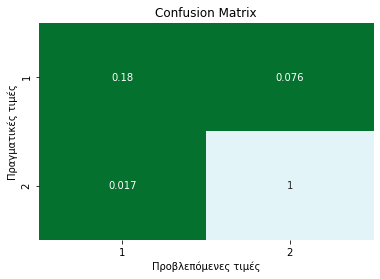


Macro avg f1 score: 87.39592086166068%
Accuracy(micro avg) f1 score: 92.66666666666666%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1}

Input > Minmax scaling > Undersampling
****************************************************************
* Συνολικός χρόνος fit και predict: 1.3430087566375732 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.97      0.58      0.73        60
           2       0.91      1.00      0.95       240

    accuracy                           0.91       300
   macro avg       0.94      0.79      0.84       300
weighted avg       0.92      0.91      0.90       300



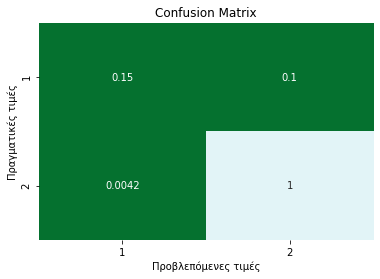


Macro avg f1 score: 83.87896825396825%
Accuracy(micro avg) f1 score: 91.33333333333333%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 3}

Input > Standard scaling > Oversampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 13.873032093048096 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.96      0.75      0.84        60
           2       0.94      0.99      0.97       240

    accuracy                           0.94       300
   macro avg       0.95      0.87      0.90       300
weighted avg       0.94      0.94      0.94       300



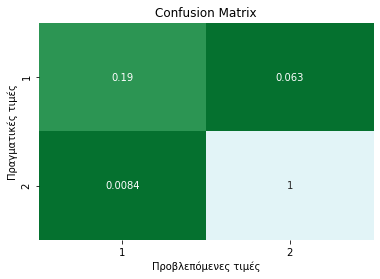


Macro avg f1 score: 90.33193683532066%
Accuracy(micro avg) f1 score: 94.33333333333334%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 3, 'pca__n_components': 20}

Input > Minmax scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 13.77328109741211 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.94      0.77      0.84        60
           2       0.94      0.99      0.97       240

    accuracy                           0.94       300
   macro avg       0.94      0.88      0.90       300
weighted avg       0.94      0.94      0.94       300



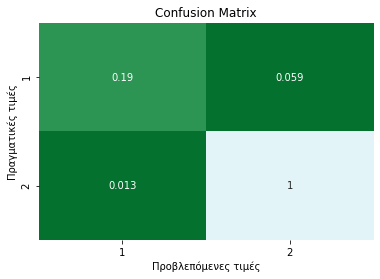


Macro avg f1 score: 90.47067396625498%
Accuracy(micro avg) f1 score: 94.33333333333334%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 5, 'pca__n_components': 20}

Input > Standard scaling > Undersampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 13.680888175964355 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.89      0.85      0.87        60
           2       0.96      0.97      0.97       240

    accuracy                           0.95       300
   macro avg       0.93      0.91      0.92       300
weighted avg       0.95      0.95      0.95       300



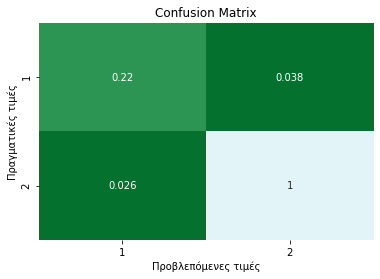


Macro avg f1 score: 92.0369485586877%
Accuracy(micro avg) f1 score: 95.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 20}

Input > Minmax scaling > Undersampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 13.502209424972534 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.90      0.77      0.83        60
           2       0.94      0.98      0.96       240

    accuracy                           0.94       300
   macro avg       0.92      0.87      0.89       300
weighted avg       0.94      0.94      0.93       300



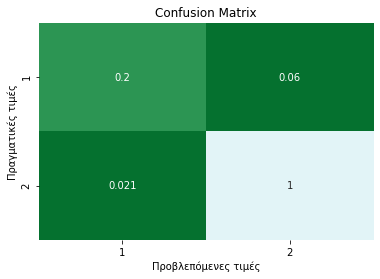


Macro avg f1 score: 89.49870115514287%
Accuracy(micro avg) f1 score: 93.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 20}

Input > Oversampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 13.305221557617188 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.91      0.83      0.87        60
           2       0.96      0.98      0.97       240

    accuracy                           0.95       300
   macro avg       0.93      0.91      0.92       300
weighted avg       0.95      0.95      0.95       300



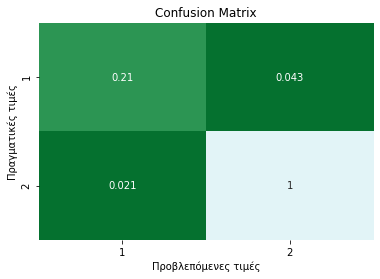


Macro avg f1 score: 91.9318691169879%
Accuracy(micro avg) f1 score: 95.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 5, 'pca__n_components': 20}

Input > Undersampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 13.204803705215454 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.93      0.83      0.88        60
           2       0.96      0.98      0.97       240

    accuracy                           0.95       300
   macro avg       0.94      0.91      0.92       300
weighted avg       0.95      0.95      0.95       300



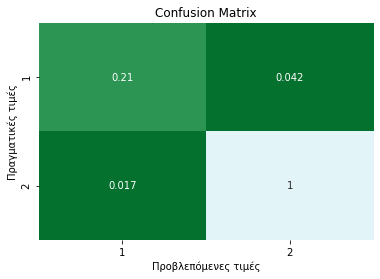


Macro avg f1 score: 92.41931990470002%
Accuracy(micro avg) f1 score: 95.33333333333334%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 20}

Input > Minmax scaling > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 13.63457465171814 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.90      0.77      0.83        60
           2       0.94      0.98      0.96       240

    accuracy                           0.94       300
   macro avg       0.92      0.87      0.89       300
weighted avg       0.94      0.94      0.93       300



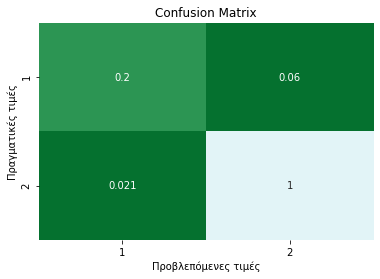


Macro avg f1 score: 89.49870115514287%
Accuracy(micro avg) f1 score: 93.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 20}



In [0]:
macro_scores = []
micro_scores = []
names = []

k_list = [1,3,5,7]
combos = all_combinations()
for code in combos:
  name, steps, indic = create_names_steps_dict(code, varthreshold, n_components)
  indic['classifier__n_neighbors'] = k_list

  pprint(name)

  macro, micro = estimation(knn, steps, trimmed_X_train, bin_trimmed_y_train, trimmed_X_test, bin_trimmed_y_test, cval=5, in_dict=indic, mem='tmp')
  macro_scores.append(macro)
  micro_scores.append(micro)
  names.append(name)

Παρουσιάζουμε τις μετρήσεις σε bar plots.

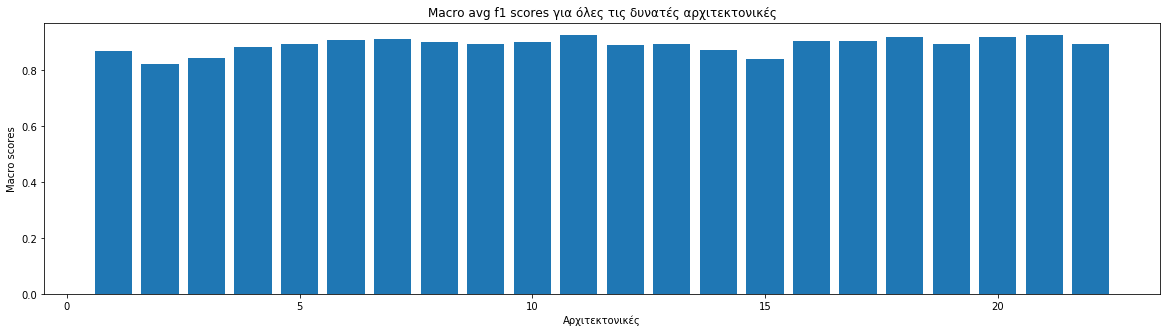

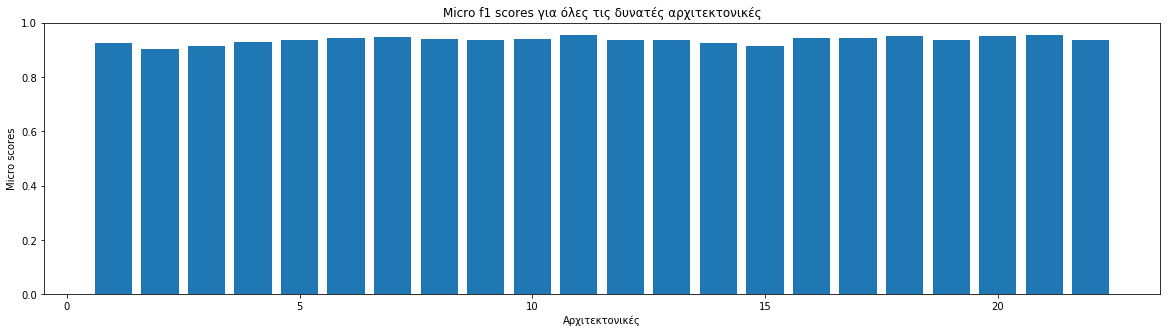


Υπόμνημα
1) Κανένα στάδιο προεπεξεργασίας
2) Input > Variance Threshold > Standard scaling
3) Input > Variance Threshold > Minmax scaling
4) Input > Variance Threshold > Standard scaling > Oversampling
5) Input > Variance Threshold > Minmax scaling > Oversampling
6) Input > Variance Threshold > Standard scaling > Undersampling
7) Input > Variance Threshold > Minmax scaling > Undersampling
8) Input > Variance Threshold > Standard scaling > Oversampling > PCA
9) Input > Variance Threshold > Minmax scaling > Oversampling > PCA
10) Input > Variance Threshold > Standard scaling > Undersampling > PCA
11) Input > Variance Threshold > Minmax scaling > Undersampling > PCA
12) Input > Standard scaling > Oversampling
13) Input > Minmax scaling > Oversampling
14) Input > Standard scaling > Undersampling
15) Input > Minmax scaling > Undersampling
16) Input > Standard scaling > Oversampling > PCA
17) Input > Minmax scaling > Oversampling > PCA
18) Input > Standard scaling > Undersampling > PCA
19) 

In [0]:
print_results(names, macro_scores, micro_scores)

Η καλύτερη αρχιτεκτονική γι’ αυτή την περίπτωση είναι πάλι η _Input > Variance Threshold > Minmax scaling > Undersampling > PCA_ . Οι βέλτιστοι υπερπαράμτεροι των μετασχηματιστών είναι {'pca__n_components': 20, 'selector__threshold': 29000}, ενώ για τον ταξινομητή είναι {'classifier__n_neighbors': 1}. 

###**Progressive Optimization**

Μελετάμε μόνο τις τιμές του threshold καθώς το PCA έχει λάβει ως καλύτερη τιμή το 20 που σημαίνει ότι είναι και η βέλτιστη γιατί σύμφωνα με την ανάλυση των δειγμάτων κατά την εισαγωγή των δεδομένων παρατηρήσαμε ότι η ποιότητα πληροφορίας για 20 χαρακτηριστικά φτάνει περίπου στο 50%.

***************************************************************
* Συνολικός χρόνος fit και predict: 3.149714708328247 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.93      0.83      0.88        60
           2       0.96      0.98      0.97       240

    accuracy                           0.95       300
   macro avg       0.94      0.91      0.92       300
weighted avg       0.95      0.95      0.95       300



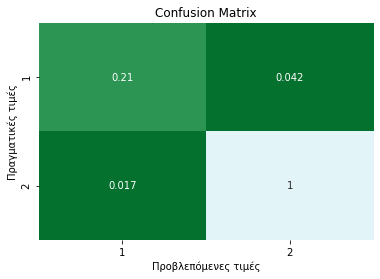


Macro avg f1 score: 92.41931990470002%
Accuracy(micro avg) f1 score: 95.33333333333334%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 20, 'selector__threshold': 29300}



In [0]:
knn_opt_var = [28000, 28300, 28600, 28900, 29000, 29300, 29600, 29900]

_, steps, indic = create_names_steps_dict("var|mmx|usm|pca", sel_varthresholds=knn_opt_var, pca_n_components=[20])
indic['classifier__n_neighbors'] = [1]
_, _ = estimation(knn, steps, trimmed_X_train, bin_trimmed_y_train, trimmed_X_test, bin_trimmed_y_test, cval=5, in_dict=indic, mem='tmp')


Αναζητούμε περαιτέρω κάποια βελτιστοποίηση στην τιμής του threshold

***************************************************************
* Συνολικός χρόνος fit και predict: 2.994511604309082 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.93      0.83      0.88        60
           2       0.96      0.98      0.97       240

    accuracy                           0.95       300
   macro avg       0.94      0.91      0.92       300
weighted avg       0.95      0.95      0.95       300



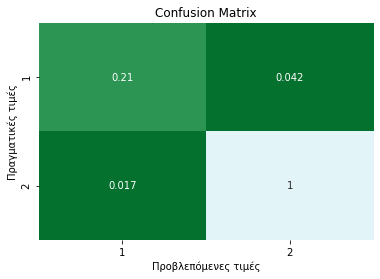


Macro avg f1 score: 92.41931990470002%
Accuracy(micro avg) f1 score: 95.33333333333334%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__n_neighbors': 1, 'pca__n_components': 20, 'selector__threshold': 29240}



In [0]:
knn_opt_var = [29200, 29220, 29240, 29260, 29280, 29300, 29320, 29340, 29360]

_, steps, indic = create_names_steps_dict("var|mmx|usm|pca", sel_varthresholds=knn_opt_var, pca_n_components=[20])
indic['classifier__n_neighbors'] = [1]
_, _ = estimation(knn, steps, trimmed_X_train, bin_trimmed_y_train, trimmed_X_test, bin_trimmed_y_test, cval=5, in_dict=indic, mem='tmp')

Βλέπουμε ότι αν και άλλαξε η τιμή του threshold σε 29240 δεν υπάρχει διαφορά στις μετρικές. Οπότε μπορούμε να αρκεστούμε σε αυτή την τιμή ως βέλτιστη.

---

Βλέπουμε τελικά ότι η βέλτιστη αριχτεκτονική για δυαδική ταξινόμηση, με ταξινομητή τον kNN, είναι η _ Input > Variance Threshold > Minmax scaling > Undersampling > PCA_ με:

1. n_neighbors = 1, για kNN
2. n_components = 20, για PCA
3. threshold = 29240, για VarianceThreshold

ως βέλτιστες υπερπαραμέτρους.

Και scores:

1. F1-macro score: 92.42%
2. F1-micro score: 95.33%

**Δηλαδή, ακρίβεια των 95.33%**

---

#**MultiLayeredPerceptron**

In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)

Και για τις δύο περιπτώσεις ακολουθούμε τα εξής βήματα:

1. Καμία βελτιστοποίηση και CV (Γ. Βaseline Classification)
2. CrossValidation και βελτιστοποίηση υπερπαραμέτρων (Δ. Βελτιστοποίηση ταξινομητών)
3. Progressive Βελτιστοποίηση (Δ. Βελτιστοποίηση ταξινομητών)

Επειδή θα χρησιμοποίησουμε τον βελτιστοποιητή 'adam' αφού έχουμε μεγάλο πλήθος δεδομένων, θα επικεντρωθούμε στη βελτιστοποίηση των εξής χαρακτηριστικών του MLP:
1. hidden_layer_sizes
2. max_iter
3. alpha

##**Ταξινόμηση με 5 κατηγορίες**

###**Καμία βελτιστοποίηση και CV**

***************************************************************
* Συνολικός χρόνος fit και predict: 0.783027172088623 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.45      0.42      0.43        60
           2       0.28      0.35      0.31        60
           3       0.24      0.25      0.25        59
           4       0.45      0.56      0.50        59
           5       0.32      0.18      0.23        62

    accuracy                           0.35       300
   macro avg       0.35      0.35      0.34       300
weighted avg       0.35      0.35      0.34       300



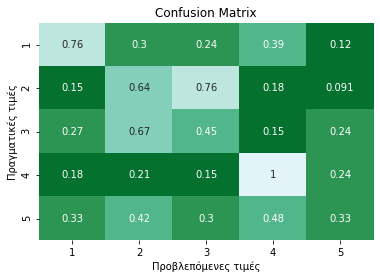


Macro avg f1 score: 34.390712491808905%
Accuracy(micro avg) f1 score: 35.0%




In [0]:
_, _ = estimation(mlp, [], trimmed_X_train, trimmed_y_train, trimmed_X_test, trimmed_y_test)

###**CrossValidation και Optimization**

1) Προσπαθούμε να βελτιώσουμε πρώτα τον ταξινομητή ως προς το μέγεθος του hidden layer. Υπάρχει ο εμπειρικός κανόνας ο οποίος ορίζει ότι το πλήθος νευρώνων των hidden layers θα πρέπει να είναι μεταξύ των μεγεθών του input layer και output layer.

****************************************************************
* Συνολικός χρόνος fit και predict: 24.228668212890625 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.44      0.40      0.42        60
           2       0.32      0.38      0.35        60
           3       0.29      0.31      0.30        59
           4       0.36      0.37      0.37        59
           5       0.33      0.27      0.30        62

    accuracy                           0.35       300
   macro avg       0.35      0.35      0.35       300
weighted avg       0.35      0.35      0.35       300



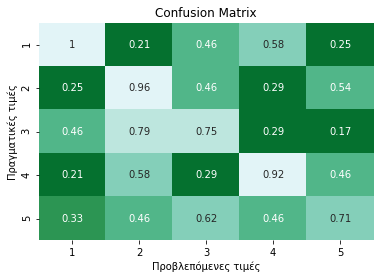


Macro avg f1 score: 34.692195272793995%
Accuracy(micro avg) f1 score: 34.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__hidden_layer_sizes': (160,)}



In [0]:
mlplayers = [(20,), (40,), (50,), (60,), (80,), (100,), (120,), (140,), (160,)]
indic = {}
indic['classifier__hidden_layer_sizes'] = mlplayers
_, _ = estimation(mlp, [], trimmed_X_train, trimmed_y_train, trimmed_X_test, trimmed_y_test, cval=5, in_dict=indic, mem='tmp')

---

Το καλύτερο σκορ το πετυχαίνει για **πλήθος perceptrons 160** στο 1 hidden layer.

---

2) Μελετάμε και το καλύτερο πλήθος επαναλήψεων.

***************************************************************
* Συνολικός χρόνος fit και predict: 11.15946626663208 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.33      0.33      0.33        60
           2       0.36      0.45      0.40        60
           3       0.30      0.27      0.29        59
           4       0.37      0.39      0.38        59
           5       0.22      0.18      0.20        62

    accuracy                           0.32       300
   macro avg       0.32      0.32      0.32       300
weighted avg       0.32      0.32      0.32       300



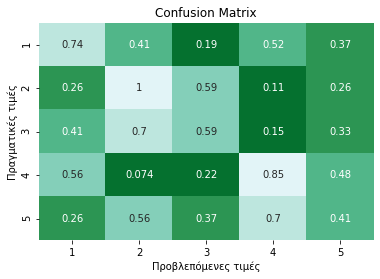


Macro avg f1 score: 31.910208908618497%
Accuracy(micro avg) f1 score: 32.33333333333333%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000}



In [0]:
mlpiters = [1000, 2000, 3000, 4000, 5000, 6000]
indic = {}
indic['classifier__hidden_layer_sizes'] = [(160,)]
indic['classifier__max_iter'] = mlpiters
_, _ = estimation(mlp, [], trimmed_X_train, trimmed_y_train, trimmed_X_test, trimmed_y_test, cval=5, in_dict=indic, mem='tmp')

---

Το καλύτερο σκορ σύμφωνα με την αναφορά προκύπτει για **αριθμό επαναλήψεων 5000**.

---

3) Μελετάμε ως προς το αλφα, την παράμετρο δηλαδή που περιορίζει τα βάρη στα perceptrons προκειμένου να μη γίνεται υπερεκπαίδευση.

****************************************************************
* Συνολικός χρόνος fit και predict: 26.482282638549805 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.46      0.52      0.48        60
           2       0.33      0.33      0.33        60
           3       0.32      0.39      0.35        59
           4       0.51      0.36      0.42        59
           5       0.21      0.19      0.20        62

    accuracy                           0.36       300
   macro avg       0.36      0.36      0.36       300
weighted avg       0.36      0.36      0.36       300



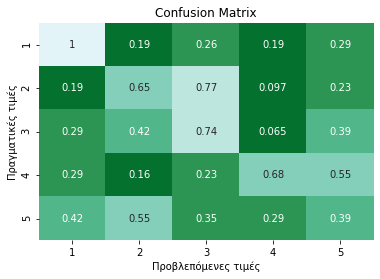


Macro avg f1 score: 35.702380663009%
Accuracy(micro avg) f1 score: 35.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000}



In [0]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
indic = {}
indic['classifier__hidden_layer_sizes'] = [(160,)]
indic['classifier__max_iter'] = [5000]
indic['classifier__alpha'] = alphas
_, _ = estimation(mlp, [], trimmed_X_train, trimmed_y_train, trimmed_X_test, trimmed_y_test, cval=5, in_dict=indic, mem='tmp')

---

Σύμφωνα με την αναφορά η καλύτερη τιμή της παραμέτρου **αλφα είναι το 0.01**.

---

4) Με τις τιμές που βρήκαμε για το MLP ελέγχουμε ποια είναι η καλύτερη δυνατή αρχιτεκτονική προεπεξεργασίας.

Κανένα στάδιο προεπεξεργασίας
***************************************************************
* Συνολικός χρόνος fit και predict: 6.099334001541138 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.47      0.40      0.43        60
           2       0.31      0.35      0.33        60
           3       0.22      0.24      0.23        59
           4       0.34      0.34      0.34        59
           5       0.24      0.23      0.23        62

    accuracy                           0.31       300
   macro avg       0.32      0.31      0.31       300
weighted avg       0.32      0.31      0.31       300



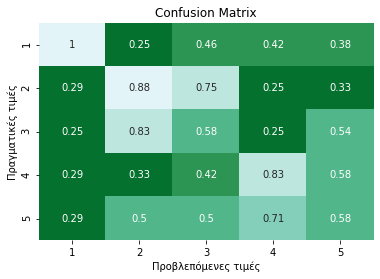


Macro avg f1 score: 31.22527859286899%
Accuracy(micro avg) f1 score: 31.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000}

Input > Variance Threshold > Standard scaling
***************************************************************
* Συνολικός χρόνος fit και predict: 43.75089120864868 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.86      0.63      0.73        60
           2       0.37      0.40      0.38        60
           3       0.37      0.46      0.41        59
           4       0.52      0.54      0.53        59
           5       0.39      0.35      0.37        62

    accuracy                           0.48       300
   macro avg       0.50      0.48      0.49       300
weighted avg       0.50      0.48      0.48       300



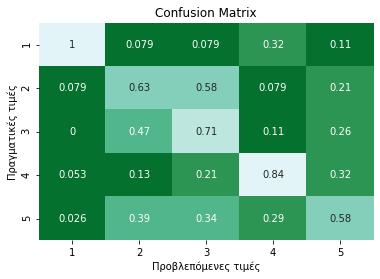


Macro avg f1 score: 48.51334231254107%
Accuracy(micro avg) f1 score: 47.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'selector__threshold': 30000}

Input > Variance Threshold > Minmax scaling
**************************************************************
* Συνολικός χρόνος fit και predict: 29.8539297580719 seconds *
**************************************************************
              precision    recall  f1-score   support

           1       0.88      0.83      0.85        60
           2       0.30      0.18      0.23        60
           3       0.05      0.02      0.03        59
           4       0.39      0.39      0.39        59
           5       0.33      0.68      0.45        62

    accuracy                           0.42       300
   macro avg       0.39      0.42      0.39       300
weighted avg       0.39      0.42      0.39       300



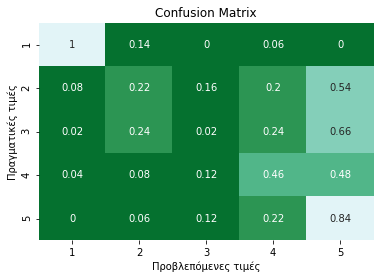


Macro avg f1 score: 38.86287995050138%
Accuracy(micro avg) f1 score: 42.333333333333336%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'selector__threshold': 30000}

Input > Variance Threshold > Standard scaling > Oversampling
***************************************************************
* Συνολικός χρόνος fit και predict: 43.39448285102844 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.79      0.68      0.73        60
           2       0.30      0.32      0.31        60
           3       0.37      0.44      0.40        59
           4       0.51      0.56      0.53        59
           5       0.39      0.31      0.34        62

    accuracy                           0.46       300
   macro avg       0.47      0.46      0.46       300
weighted avg       0.47      0.46      0.46       300



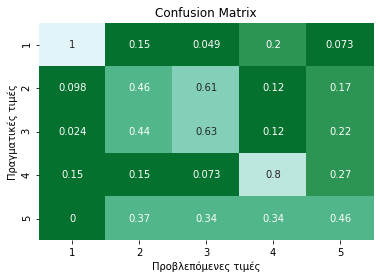


Macro avg f1 score: 46.32591304196706%
Accuracy(micro avg) f1 score: 46.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'selector__threshold': 30000}

Input > Variance Threshold > Minmax scaling > Oversampling
***************************************************************
* Συνολικός χρόνος fit και predict: 32.07833385467529 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.91      0.82      0.86        60
           2       0.23      0.45      0.31        60
           3       0.29      0.08      0.13        59
           4       0.42      0.29      0.34        59
           5       0.34      0.40      0.37        62

    accuracy                           0.41       300
   macro avg       0.44      0.41      0.40       300
weighted avg       0.44      0.41      0.40       300



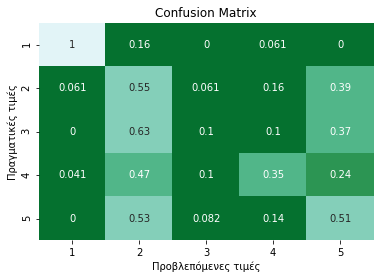


Macro avg f1 score: 40.2176180200948%
Accuracy(micro avg) f1 score: 41.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'selector__threshold': 30000}

Input > Variance Threshold > Standard scaling > Undersampling
*************************************************************
* Συνολικός χρόνος fit και predict: 42.498619556427 seconds *
*************************************************************
              precision    recall  f1-score   support

           1       0.85      0.65      0.74        60
           2       0.36      0.40      0.38        60
           3       0.35      0.46      0.40        59
           4       0.52      0.58      0.54        59
           5       0.45      0.32      0.38        62

    accuracy                           0.48       300
   macro avg       0.51      0.48      0.49       300
weighted avg       0.51      0.48      0.49       300



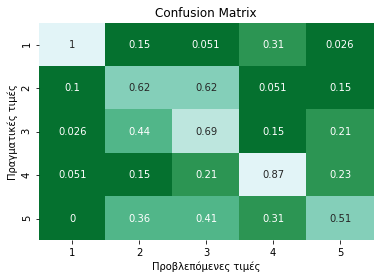


Macro avg f1 score: 48.644382532094696%
Accuracy(micro avg) f1 score: 48.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'selector__threshold': 30000}

Input > Variance Threshold > Minmax scaling > Undersampling
****************************************************************
* Συνολικός χρόνος fit και predict: 29.063079595565796 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.91      0.82      0.86        60
           2       0.32      0.20      0.24        60
           3       0.08      0.02      0.03        59
           4       0.33      0.34      0.33        59
           5       0.34      0.74      0.47        62

    accuracy                           0.43       300
   macro avg       0.40      0.42      0.39       300
weighted avg       0.40      0.43      0.39       300



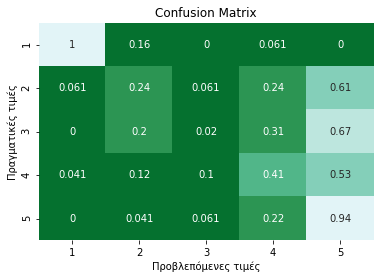


Macro avg f1 score: 38.661090111013266%
Accuracy(micro avg) f1 score: 42.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'selector__threshold': 30000}

Input > Variance Threshold > Standard scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 88.94154238700867 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.91      0.68      0.78        60
           2       0.38      0.45      0.41        60
           3       0.37      0.42      0.40        59
           4       0.48      0.54      0.51        59
           5       0.42      0.34      0.38        62

    accuracy                           0.49       300
   macro avg       0.51      0.49      0.49       300
weighted avg       0.51      0.49      0.49       300

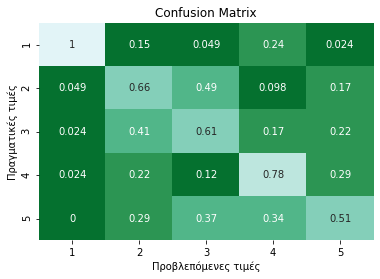


Macro avg f1 score: 49.45856052344602%
Accuracy(micro avg) f1 score: 48.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'pca__n_components': 25, 'selector__threshold': 30000}

Input > Variance Threshold > Minmax scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 227.1362166404724 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.91      0.82      0.86        60
           2       0.39      0.50      0.44        60
           3       0.34      0.36      0.35        59
           4       0.63      0.69      0.66        59
           5       0.56      0.39      0.46        62

    accuracy                           0.55       300
   macro avg       0.57      0.55      0.55       300
weighted avg       0.57      0.

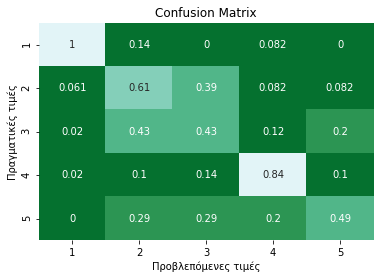


Macro avg f1 score: 55.32077013820164%
Accuracy(micro avg) f1 score: 55.00000000000001%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'pca__n_components': 25, 'selector__threshold': 10000}

Input > Variance Threshold > Standard scaling > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 86.92581152915955 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.74      0.58      0.65        60
           2       0.38      0.45      0.41        60
           3       0.39      0.44      0.42        59
           4       0.51      0.63      0.56        59
           5       0.42      0.29      0.34        62

    accuracy                           0.48       300
   macro avg       0.49      0.48      0.48       300
weighted avg       0.49     

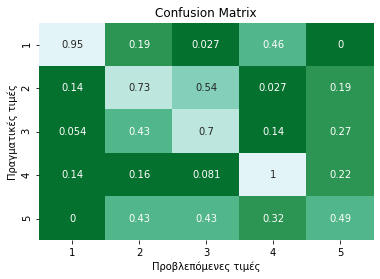


Macro avg f1 score: 47.74078311215787%
Accuracy(micro avg) f1 score: 47.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'pca__n_components': 25, 'selector__threshold': 30000}

Input > Variance Threshold > Minmax scaling > Undersampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 222.13236689567566 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.86      0.83      0.85        60
           2       0.36      0.43      0.39        60
           3       0.37      0.42      0.39        59
           4       0.60      0.63      0.61        59
           5       0.54      0.34      0.42        62

    accuracy                           0.53       300
   macro avg       0.54      0.53      0.53       300
weighted avg       0.54    

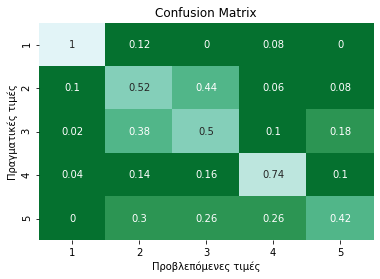


Macro avg f1 score: 53.190953804430826%
Accuracy(micro avg) f1 score: 53.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'pca__n_components': 25, 'selector__threshold': 0}

Input > Standard scaling > Oversampling
****************************************************************
* Συνολικός χρόνος fit και predict: 12.819627046585083 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.78      0.42      0.54        60
           2       0.38      0.50      0.43        60
           3       0.31      0.42      0.36        59
           4       0.54      0.54      0.54        59
           5       0.37      0.29      0.32        62

    accuracy                           0.43       300
   macro avg       0.48      0.43      0.44       300
weighted avg       0.48      0.43      0.44       300



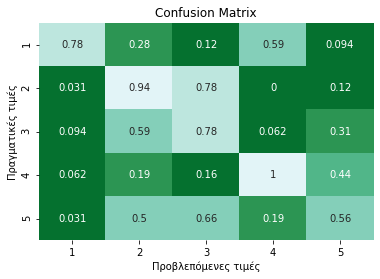


Macro avg f1 score: 43.96918250674155%
Accuracy(micro avg) f1 score: 43.333333333333336%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000}

Input > Minmax scaling > Oversampling
***************************************************************
* Συνολικός χρόνος fit και predict: 9.457622766494751 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.91      0.82      0.86        60
           2       0.25      0.27      0.26        60
           3       0.23      0.56      0.33        59
           4       0.31      0.20      0.24        59
           5       0.00      0.00      0.00        62

    accuracy                           0.37       300
   macro avg       0.34      0.37      0.34       300
weighted avg       0.34      0.37      0.34       300



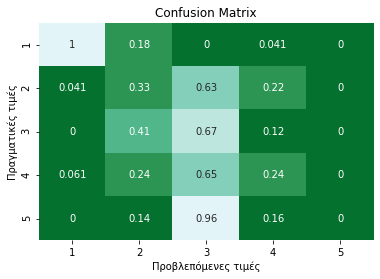


Macro avg f1 score: 33.786885427741005%
Accuracy(micro avg) f1 score: 36.666666666666664%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000}

Input > Standard scaling > Undersampling
****************************************************************
* Συνολικός χρόνος fit και predict: 13.133040428161621 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.86      0.50      0.63        60
           2       0.35      0.43      0.39        60
           3       0.34      0.47      0.40        59
           4       0.49      0.51      0.50        59
           5       0.38      0.29      0.33        62

    accuracy                           0.44       300
   macro avg       0.48      0.44      0.45       300
weighted avg       0.48      0.44      0.45       300



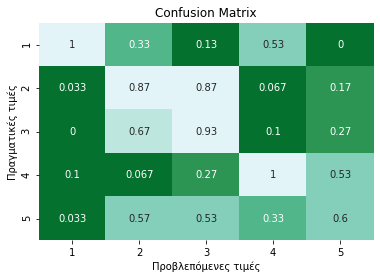


Macro avg f1 score: 44.8840496495756%
Accuracy(micro avg) f1 score: 44.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000}

Input > Minmax scaling > Undersampling
***************************************************************
* Συνολικός χρόνος fit και predict: 9.904929876327515 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.94      0.82      0.87        60
           2       0.20      0.07      0.10        60
           3       0.19      0.12      0.15        59
           4       0.38      0.15      0.22        59
           5       0.34      0.90      0.49        62

    accuracy                           0.42       300
   macro avg       0.41      0.41      0.37       300
weighted avg       0.41      0.42      0.37       300



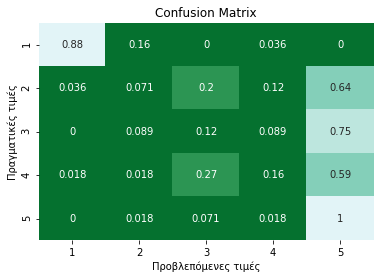


Macro avg f1 score: 36.53567545290331%
Accuracy(micro avg) f1 score: 41.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000}

Input > Standard scaling > Oversampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 27.420916080474854 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.85      0.68      0.76        60
           2       0.40      0.48      0.44        60
           3       0.34      0.44      0.39        59
           4       0.59      0.54      0.57        59
           5       0.50      0.40      0.45        62

    accuracy                           0.51       300
   macro avg       0.54      0.51      0.52       300
weighted avg       0.54      0.51      0.52       300



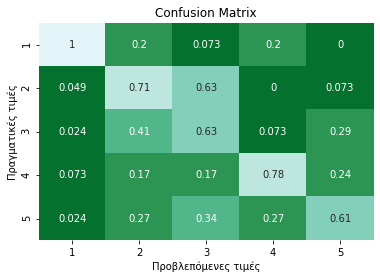


Macro avg f1 score: 51.93277273365767%
Accuracy(micro avg) f1 score: 51.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'pca__n_components': 25}

Input > Minmax scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 69.25448870658875 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.89      0.85      0.87        60
           2       0.37      0.43      0.40        60
           3       0.34      0.42      0.38        59
           4       0.61      0.59      0.60        59
           5       0.49      0.32      0.39        62

    accuracy                           0.52       300
   macro avg       0.54      0.52      0.53       300
weighted avg       0.54      0.52      0.53       300



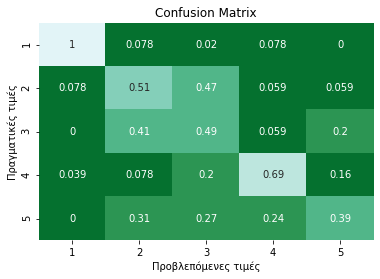


Macro avg f1 score: 52.72958153459207%
Accuracy(micro avg) f1 score: 52.33333333333333%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'pca__n_components': 25}

Input > Standard scaling > Undersampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 27.162070751190186 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.83      0.73      0.78        60
           2       0.34      0.37      0.35        60
           3       0.34      0.41      0.37        59
           4       0.61      0.61      0.61        59
           5       0.49      0.42      0.45        62

    accuracy                           0.51       300
   macro avg       0.52      0.51      0.51       300
weighted avg       0.52      0.51      0.51       300



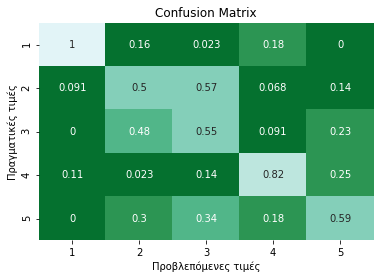


Macro avg f1 score: 51.303478908479875%
Accuracy(micro avg) f1 score: 50.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'pca__n_components': 25}

Input > Minmax scaling > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 69.08531522750854 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.84      0.72      0.77        60
           2       0.35      0.43      0.39        60
           3       0.34      0.39      0.37        59
           4       0.55      0.58      0.56        59
           5       0.46      0.34      0.39        62

    accuracy                           0.49       300
   macro avg       0.51      0.49      0.50       300
weighted avg       0.51      0.49      0.50       300



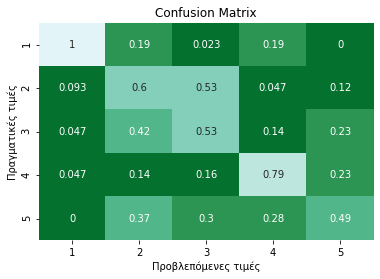


Macro avg f1 score: 49.575724026198934%
Accuracy(micro avg) f1 score: 49.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'pca__n_components': 25}

Input > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 7.167470455169678 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.48      0.47      0.47        60
           2       0.20      0.18      0.19        60
           3       0.31      0.37      0.34        59
           4       0.42      0.37      0.39        59
           5       0.27      0.27      0.27        62

    accuracy                           0.33       300
   macro avg       0.34      0.33      0.33       300
weighted avg       0.33      0.33      0.33       300



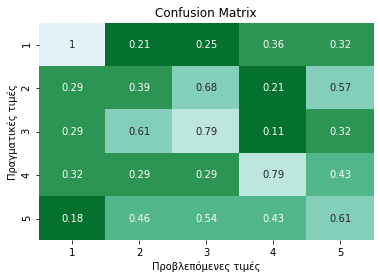


Macro avg f1 score: 33.38398600662418%
Accuracy(micro avg) f1 score: 33.33333333333333%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'pca__n_components': 50}

Input > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 7.276184558868408 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.42      0.43      0.43        60
           2       0.31      0.30      0.31        60
           3       0.35      0.42      0.38        59
           4       0.44      0.46      0.45        59
           5       0.20      0.15      0.17        62

    accuracy                           0.35       300
   macro avg       0.34      0.35      0.35       300
weighted avg       0.34      0.35      0.34       300



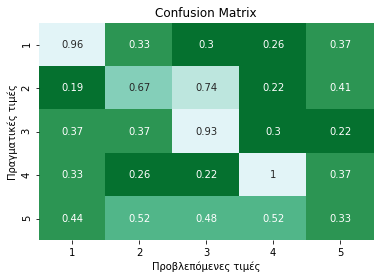


Macro avg f1 score: 34.51882603349229%
Accuracy(micro avg) f1 score: 35.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'pca__n_components': 25}

Input > Minmax scaling > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 69.18071341514587 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.89      0.82      0.85        60
           2       0.35      0.42      0.38        60
           3       0.39      0.47      0.43        59
           4       0.59      0.56      0.57        59
           5       0.49      0.37      0.42        62

    accuracy                           0.53       300
   macro avg       0.54      0.53      0.53       300
weighted avg       0.54      0.53      0.53       300



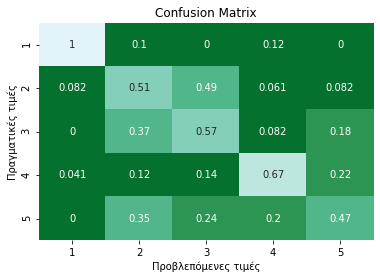


Macro avg f1 score: 53.211078504556006%
Accuracy(micro avg) f1 score: 52.666666666666664%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'pca__n_components': 25}



In [0]:
macro_scores = []
micro_scores = []
names = []

combos = all_combinations()
for code in combos:
  name, steps, indic = create_names_steps_dict(code, [0, 10000, 20000, 30000], [25, 50, 100])
  indic['classifier__hidden_layer_sizes'] = [(160,)]
  indic['classifier__max_iter'] = [5000]
  indic['classifier__alpha'] = [0.01]
  
  pprint(name)

  macro, micro = estimation(mlp, steps, trimmed_X_train, trimmed_y_train, trimmed_X_test, trimmed_y_test, cval=5, in_dict=indic, mem='tmp')
  macro_scores.append(macro)
  micro_scores.append(micro)
  names.append(name)

Παρουσιάζουμε τα αποτελέσματα στα επόμενα bar plots.

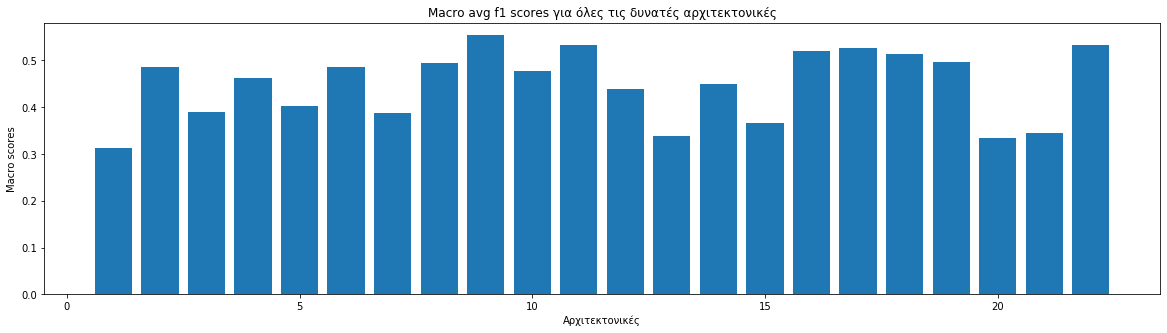

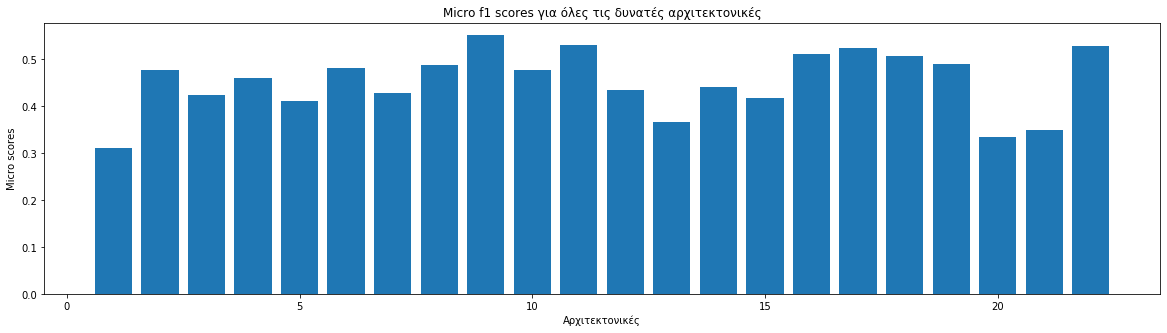


Υπόμνημα
1) Κανένα στάδιο προεπεξεργασίας
2) Input > Variance Threshold > Standard scaling
3) Input > Variance Threshold > Minmax scaling
4) Input > Variance Threshold > Standard scaling > Oversampling
5) Input > Variance Threshold > Minmax scaling > Oversampling
6) Input > Variance Threshold > Standard scaling > Undersampling
7) Input > Variance Threshold > Minmax scaling > Undersampling
8) Input > Variance Threshold > Standard scaling > Oversampling > PCA
9) Input > Variance Threshold > Minmax scaling > Oversampling > PCA
10) Input > Variance Threshold > Standard scaling > Undersampling > PCA
11) Input > Variance Threshold > Minmax scaling > Undersampling > PCA
12) Input > Standard scaling > Oversampling
13) Input > Minmax scaling > Oversampling
14) Input > Standard scaling > Undersampling
15) Input > Minmax scaling > Undersampling
16) Input > Standard scaling > Oversampling > PCA
17) Input > Minmax scaling > Oversampling > PCA
18) Input > Standard scaling > Undersampling > PCA
19) 

In [0]:
print_results(names, macro_scores, micro_scores)

Σύμφωνα με την αναφορά προκύπτει ότι ο καλύτερος εκτιμητής θα έχει τις ακόλουθες τιμές για υπερπαραμέτρους {'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (160,), 'classifier__max_iter': 5000, 'pca__n_components': 25, 'selector__threshold': 10000}. Ως καλύτερη αρχιτεκτονική προκύπτει η Input > Variance Threshold > Minmax scaling > Oversampling > PCA και για τις δύο μετρικές μας.


###**Progressive Optimization**

1) Πάνω σε αυτές τις τιμές θα επιχειρήσουμε να βελτιστοποιήσουμε το MLP ξεκινώντας πάλι από το μέγεθoς του ενδιάμεσου κρυφού επιπέδου. Δεν εξετάζουμε τη βελτιστοποίηση του PCA καθώς τα 25 components όπως αποδείξαμε και στην αρχή είναι ένα καλό κατώτατο όριο πριν αρχίσουμε να χ’ανουμε πολύτιμη πληροφορία από τα δείγματα.

***************************************************************
* Συνολικός χρόνος fit και predict: 877.1685950756073 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.87      0.77      0.81        60
           2       0.35      0.40      0.37        60
           3       0.37      0.42      0.40        59
           4       0.55      0.63      0.59        59
           5       0.57      0.40      0.47        62

    accuracy                           0.52       300
   macro avg       0.54      0.52      0.53       300
weighted avg       0.54      0.52      0.53       300



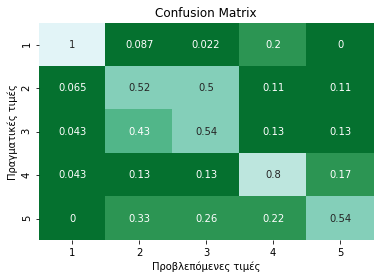


Macro avg f1 score: 52.84154825251488%
Accuracy(micro avg) f1 score: 52.33333333333333%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (165,), 'classifier__max_iter': 5000, 'pca__n_components': 25, 'selector__threshold': 15000}



In [21]:
prog_opt_layers = [(150,), (155,), (160,), (165,), (170,), (175,)]
_, steps, indic = create_names_steps_dict("var|mmx|osm|pca", [5000, 10000, 15000, 20000, 25000, 30000], [25])
indic['classifier__hidden_layer_sizes'] = prog_opt_layers
indic['classifier__max_iter'] = [5000]
indic['classifier__alpha'] = [0.01]
_, _ = estimation(mlp, steps, trimmed_X_train, trimmed_y_train, trimmed_X_test, trimmed_y_test, cval=5, in_dict=indic, mem='tmp')

Λαμβάνουμε ως αποτέλεσμα ότι το βέλτιστο μέγεθος του hidden layer είναι 165 και η βέλτιστη τιμή του threshold 15000.

2) Στη συνέχεια θα επναεξετάσουμε την ακρίβεια της υπερπαραμέτρου άλφα.

****************************************************************
* Συνολικός χρόνος fit και predict: 212.80299019813538 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.96      0.75      0.84        60
           2       0.32      0.35      0.33        60
           3       0.29      0.31      0.30        59
           4       0.58      0.61      0.60        59
           5       0.50      0.50      0.50        62

    accuracy                           0.50       300
   macro avg       0.53      0.50      0.51       300
weighted avg       0.53      0.50      0.51       300



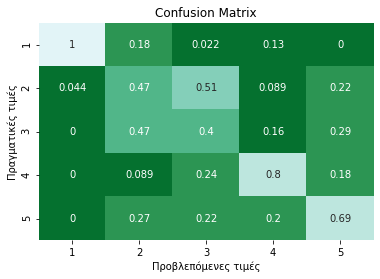


Macro avg f1 score: 51.29156236375201%
Accuracy(micro avg) f1 score: 50.33333333333333%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.09, 'classifier__hidden_layer_sizes': (165,), 'classifier__max_iter': 5000, 'pca__n_components': 25, 'selector__threshold': 15000}



In [24]:
grid_opt_alphas = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
_, steps, indic = create_names_steps_dict("var|mmx|osm|pca", [15000], [25])
indic['classifier__hidden_layer_sizes'] = [(165,)]
indic['classifier__max_iter'] = [5000]
indic['classifier__alpha'] = grid_opt_alphas
_, _ = estimation(mlp, steps, trimmed_X_train, trimmed_y_train, trimmed_X_test, trimmed_y_test, cval=5, in_dict=indic, mem='tmp')

---

Βλέπουμε τελικά ότι η βέλτιστη αριχτεκτονική για ταξινόμηση με 5 κατηγορίες, με ταξινομητή τον MLP, είναι η _ Input > Variance Threshold > Minmax scaling > Oversampling > PCA_ με:

1. hidden_layer_sizes = (165,), για MLP
2. max_iter = 5000, για MLP
3. alpha = 0.09, για MLP
4. threshold = 17000, για VarianceThreshold
5. n_components = 25, για PCA

ως βέλτιστες υπερπαραμέτρους.

Και scores:

1. F1-macro score: 51.29%
2. F1-micro score: 50.33%

**Δηλαδή, ακρίβεια των 50.33%**

---

##**Δυαδική ταξινόμηση**

Ακολουθούμε τα ίδια βήματα όπως και με τις 5 κατηγορίες.

In [0]:
bin_trimmed_y_train = trimmed_y_train.copy()
for i in range(0, len(trimmed_y_train)):
  if trimmed_y_train[i] > 1:
    bin_trimmed_y_train[i] = 2

bin_trimmed_y_test = trimmed_y_test.copy()
for i in range(0, len(trimmed_y_test)):
  if trimmed_y_test[i] > 1:
    bin_trimmed_y_test[i] = 2

###**Καμία βελτιστοποίηση και CV**

****************************************************************
* Συνολικός χρόνος fit και predict: 0.3838329315185547 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.45      0.42      0.43        60
           2       0.86      0.88      0.87       240

    accuracy                           0.78       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.78      0.78      0.78       300



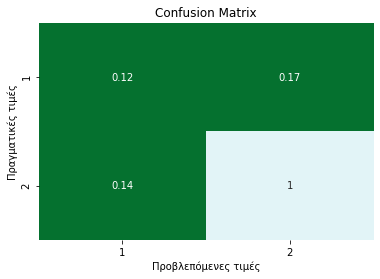


Macro avg f1 score: 65.03809950694756%
Accuracy(micro avg) f1 score: 78.33333333333333%




In [28]:
_, _ = estimation(mlp, [], trimmed_X_train, bin_trimmed_y_train, trimmed_X_test, bin_trimmed_y_test)

###**CrossValidation και Optimization**

1) Προσπαθούμε να βελτιώσουμε πρώτα τον ταξινομητή ως προς το μέγεθος του hidden layer. Υπάρχει ο εμπειρικός κανόνας ο οποίος ορίζει ότι το πλήθος νευρώνων των hidden layers θα πρέπει να είναι μεταξύ των μεγεθών του input layer και output layer.

****************************************************************
* Συνολικός χρόνος fit και predict: 12.651522159576416 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.49      0.50      0.50        60
           2       0.87      0.87      0.87       240

    accuracy                           0.80       300
   macro avg       0.68      0.69      0.68       300
weighted avg       0.80      0.80      0.80       300



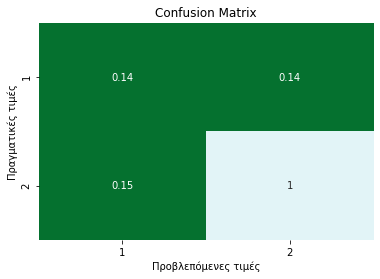


Macro avg f1 score: 68.42595627943892%
Accuracy(micro avg) f1 score: 79.66666666666666%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__hidden_layer_sizes': (120,)}



In [30]:
mlplayers = [(20,), (40,), (50,), (60,), (80,), (100,), (120,), (140,), (160,)]
indic = {}
indic['classifier__hidden_layer_sizes'] = mlplayers
_, _ = estimation(mlp, [], trimmed_X_train, bin_trimmed_y_train, trimmed_X_test, bin_trimmed_y_test, cval=5, in_dict=indic, mem='tmp')

---

Το καλύτερο σκορ το πετυχαίνει για **πλήθος perceptrons 120** στο 1 hidden layer.

---

2) Στη συνέχεια θα μελετήσουμε το πλήθος των επαναλήψεων για να βρούμε την καλύτερη τιμή. Αυτό το μέγεθος δεν απαιτεί ιδιαίτερη λεπτομέρεια καθώς αφορά έμμεσα και τη σύγκλιση του MLP, οπότε μπορούμε να περιοριστούμε σε ένα μεγάλο αριθμό. 

****************************************************************
* Συνολικός χρόνος fit και predict: 14.015807390213013 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.39      0.35      0.37        60
           2       0.38      0.40      0.39        60
           3       0.37      0.31      0.33        59
           4       0.35      0.37      0.36        59
           5       0.28      0.32      0.30        62

    accuracy                           0.35       300
   macro avg       0.35      0.35      0.35       300
weighted avg       0.35      0.35      0.35       300



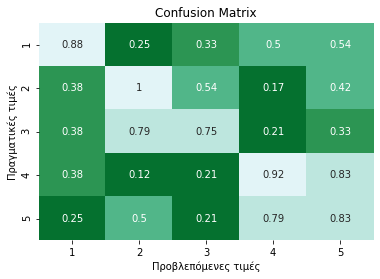


Macro avg f1 score: 35.06478806988145%
Accuracy(micro avg) f1 score: 35.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 4000}



In [31]:
mlpiters = [1000, 2000, 3000, 4000, 5000, 6000]
indic = {}
indic['classifier__hidden_layer_sizes'] = [(120,)]
indic['classifier__max_iter'] = mlpiters
_, _ = estimation(mlp, [], trimmed_X_train, trimmed_y_train, trimmed_X_test, trimmed_y_test, cval=5, in_dict=indic, mem='tmp')

---

Το καλύτερο σκορ σύμφωνα με την αναφορά προκύπτει για **αριθμό επαναλήψεων 4000**. Οπότε μπορούμε να θεωρήσουμε έναν μεγαλύτερο αριθμό επαναλήψεων προκειμένου να καλύπτουμε και τις περιπτώσεις που συγκλίνουν πιο αργά.

---

3) Σε αυτό το σημείο μελετάμε ως προς το αλφα, την παράμετρο - δηλαδή που περιορίζει τα βάρη στα perceptrons προκειμένου να μη γίνεται υπερεκπαίδευση.

***************************************************************
* Συνολικός χρόνος fit και predict: 21.73550581932068 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.38      0.35      0.37        60
           2       0.29      0.30      0.30        60
           3       0.31      0.32      0.32        59
           4       0.41      0.47      0.44        59
           5       0.24      0.21      0.22        62

    accuracy                           0.33       300
   macro avg       0.33      0.33      0.33       300
weighted avg       0.33      0.33      0.33       300



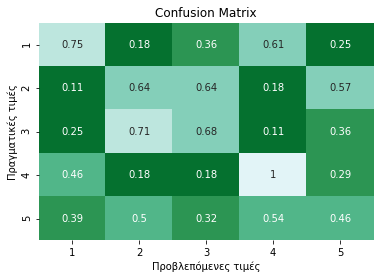


Macro avg f1 score: 32.840976762167514%
Accuracy(micro avg) f1 score: 33.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000}



In [32]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
indic = {}
indic['classifier__hidden_layer_sizes'] = [(120,)]
indic['classifier__max_iter'] = [4000, 5000]
indic['classifier__alpha'] = alphas
_, _ = estimation(mlp, [], trimmed_X_train, trimmed_y_train, trimmed_X_test, trimmed_y_test, cval=5, in_dict=indic, mem='tmp')

---

Σύμφωνα με την αναφορά η καλύτερη τιμή της παραμέτρου **αλφα είναι το 0.1**. Επίσης παρατηρείται και διορθωση του μέγιστου αριθμού επαναλήψεων καθώς η περίπτωση αυτή συγκλίνει πιο αργά.

---

4) Με τις τιμές που βρήκαμε για το MLP ελέγχουμε ποια είναι η καλύτερη δυνατή αρχιτεκτονική προεπεξεργασίας.

Κανένα στάδιο προεπεξεργασίας
***************************************************************
* Συνολικός χρόνος fit και predict: 4.552166223526001 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.32      0.33      0.33        60
           2       0.83      0.82      0.83       240

    accuracy                           0.72       300
   macro avg       0.57      0.58      0.58       300
weighted avg       0.73      0.72      0.73       300



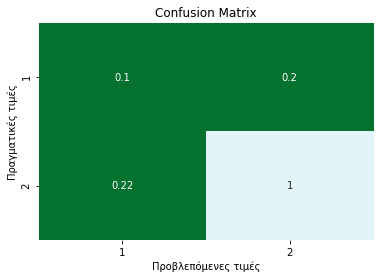


Macro avg f1 score: 57.55995295802015%
Accuracy(micro avg) f1 score: 72.33333333333334%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000}

Input > Variance Threshold > Standard scaling
**************************************************************
* Συνολικός χρόνος fit και predict: 19.6507408618927 seconds *
**************************************************************
              precision    recall  f1-score   support

           1       0.91      0.67      0.77        60
           2       0.92      0.98      0.95       240

    accuracy                           0.92       300
   macro avg       0.92      0.82      0.86       300
weighted avg       0.92      0.92      0.92       300



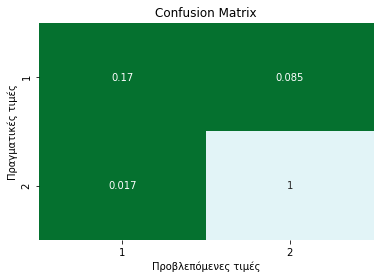


Macro avg f1 score: 86.04218362282879%
Accuracy(micro avg) f1 score: 92.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'selector__threshold': 30000}

Input > Variance Threshold > Minmax scaling
***************************************************************
* Συνολικός χρόνος fit και predict: 32.35547375679016 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.98      0.73      0.84        60
           2       0.94      1.00      0.97       240

    accuracy                           0.94       300
   macro avg       0.96      0.86      0.90       300
weighted avg       0.95      0.94      0.94       300



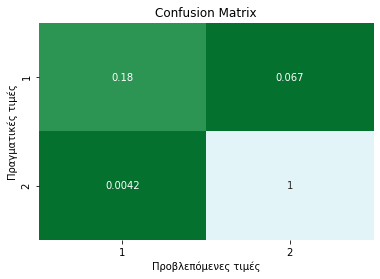


Macro avg f1 score: 90.18759018759019%
Accuracy(micro avg) f1 score: 94.33333333333334%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'selector__threshold': 20000}

Input > Variance Threshold > Standard scaling > Oversampling
***************************************************************
* Συνολικός χρόνος fit και predict: 26.57819962501526 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.93      0.68      0.79        60
           2       0.93      0.99      0.96       240

    accuracy                           0.93       300
   macro avg       0.93      0.84      0.87       300
weighted avg       0.93      0.93      0.92       300



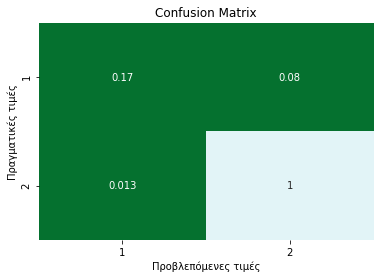


Macro avg f1 score: 87.20533498759305%
Accuracy(micro avg) f1 score: 92.66666666666666%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'selector__threshold': 30000}

Input > Variance Threshold > Minmax scaling > Oversampling
****************************************************************
* Συνολικός χρόνος fit και predict: 36.905097007751465 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.93      0.83      0.88        60
           2       0.96      0.98      0.97       240

    accuracy                           0.95       300
   macro avg       0.94      0.91      0.92       300
weighted avg       0.95      0.95      0.95       300



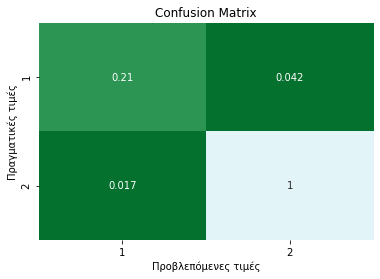


Macro avg f1 score: 92.41931990470002%
Accuracy(micro avg) f1 score: 95.33333333333334%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'selector__threshold': 0}

Input > Variance Threshold > Standard scaling > Undersampling
***************************************************************
* Συνολικός χρόνος fit και predict: 13.73668909072876 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.84      0.78      0.81        60
           2       0.95      0.96      0.95       240

    accuracy                           0.93       300
   macro avg       0.89      0.87      0.88       300
weighted avg       0.93      0.93      0.93       300



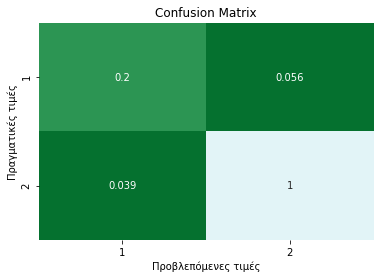


Macro avg f1 score: 88.24451410658307%
Accuracy(micro avg) f1 score: 92.66666666666666%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'selector__threshold': 30000}

Input > Variance Threshold > Minmax scaling > Undersampling
****************************************************************
* Συνολικός χρόνος fit και predict: 10.155877113342285 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.93      0.83      0.88        60
           2       0.96      0.98      0.97       240

    accuracy                           0.95       300
   macro avg       0.94      0.91      0.92       300
weighted avg       0.95      0.95      0.95       300



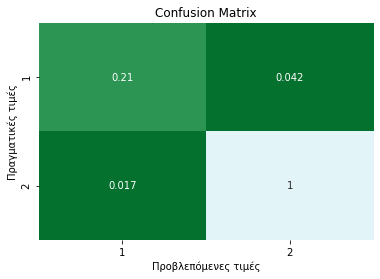


Macro avg f1 score: 92.41931990470002%
Accuracy(micro avg) f1 score: 95.33333333333334%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'selector__threshold': 30000}

Input > Variance Threshold > Standard scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 39.53618025779724 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.96      0.88      0.92        60
           2       0.97      0.99      0.98       240

    accuracy                           0.97       300
   macro avg       0.97      0.94      0.95       300
weighted avg       0.97      0.97      0.97       300



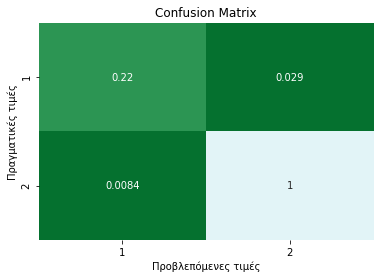


Macro avg f1 score: 95.15912147019274%
Accuracy(micro avg) f1 score: 97.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'pca__n_components': 25, 'selector__threshold': 0}

Input > Variance Threshold > Minmax scaling > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 77.65969586372375 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        60
           2       0.98      0.98      0.98       240

    accuracy                           0.97       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.97      0.97      0.97       300



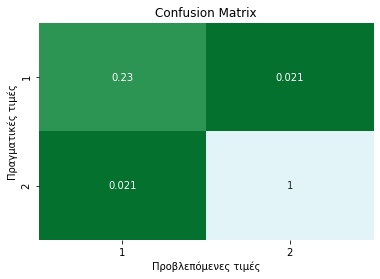


Macro avg f1 score: 94.79166666666666%
Accuracy(micro avg) f1 score: 96.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'pca__n_components': 25, 'selector__threshold': 0}

Input > Variance Threshold > Standard scaling > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 24.21041202545166 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.81      0.85      0.83        60
           2       0.96      0.95      0.96       240

    accuracy                           0.93       300
   macro avg       0.89      0.90      0.89       300
weighted avg       0.93      0.93      0.93       300



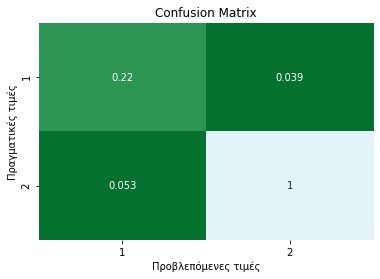


Macro avg f1 score: 89.26215677251112%
Accuracy(micro avg) f1 score: 93.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'pca__n_components': 25, 'selector__threshold': 10000}

Input > Variance Threshold > Minmax scaling > Undersampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 39.002997636795044 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.93      0.92      0.92        60
           2       0.98      0.98      0.98       240

    accuracy                           0.97       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.97      0.97      0.97       300



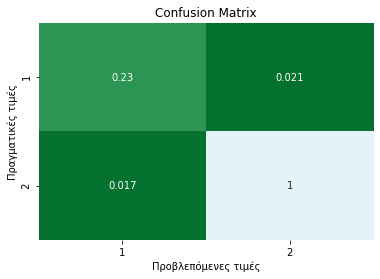


Macro avg f1 score: 95.28293645940704%
Accuracy(micro avg) f1 score: 97.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'pca__n_components': 25, 'selector__threshold': 10000}

Input > Standard scaling > Oversampling
****************************************************************
* Συνολικός χρόνος fit και predict: 10.191403150558472 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.95      0.70      0.81        60
           2       0.93      0.99      0.96       240

    accuracy                           0.93       300
   macro avg       0.94      0.85      0.88       300
weighted avg       0.93      0.93      0.93       300



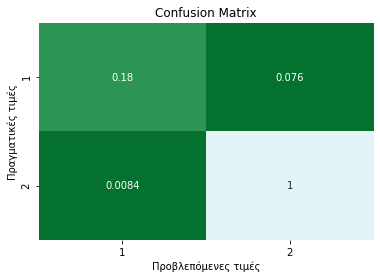


Macro avg f1 score: 88.36848635235732%
Accuracy(micro avg) f1 score: 93.33333333333333%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000}

Input > Minmax scaling > Oversampling
**************************************************************
* Συνολικός χρόνος fit και predict: 12.7652587890625 seconds *
**************************************************************
              precision    recall  f1-score   support

           1       0.88      0.85      0.86        60
           2       0.96      0.97      0.97       240

    accuracy                           0.95       300
   macro avg       0.92      0.91      0.92       300
weighted avg       0.95      0.95      0.95       300



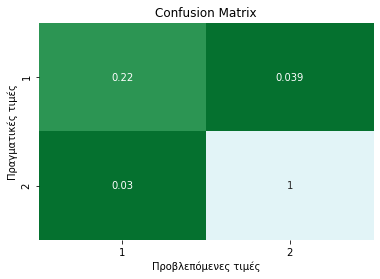


Macro avg f1 score: 91.56058794570644%
Accuracy(micro avg) f1 score: 94.66666666666667%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000}

Input > Standard scaling > Undersampling
***************************************************************
* Συνολικός χρόνος fit και predict: 5.410282135009766 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.83      0.67      0.74        60
           2       0.92      0.97      0.94       240

    accuracy                           0.91       300
   macro avg       0.88      0.82      0.84       300
weighted avg       0.90      0.91      0.90       300



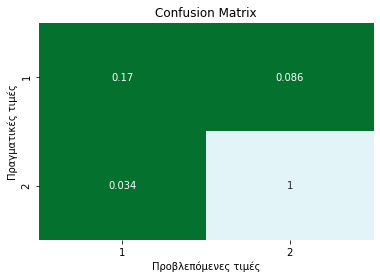


Macro avg f1 score: 84.19150858175249%
Accuracy(micro avg) f1 score: 90.66666666666666%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000}

Input > Minmax scaling > Undersampling
***************************************************************
* Συνολικός χρόνος fit και predict: 4.679221868515015 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.94      0.85      0.89        60
           2       0.96      0.99      0.98       240

    accuracy                           0.96       300
   macro avg       0.95      0.92      0.94       300
weighted avg       0.96      0.96      0.96       300



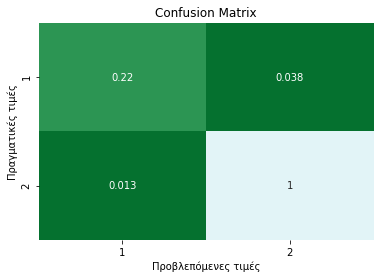


Macro avg f1 score: 93.5022742040286%
Accuracy(micro avg) f1 score: 96.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000}

Input > Standard scaling > Oversampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 12.680184602737427 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.96      0.78      0.86        60
           2       0.95      0.99      0.97       240

    accuracy                           0.95       300
   macro avg       0.95      0.89      0.92       300
weighted avg       0.95      0.95      0.95       300



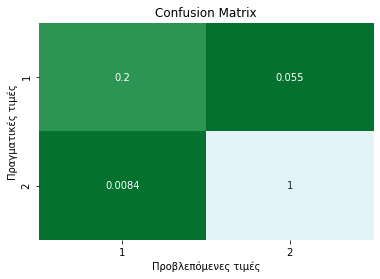


Macro avg f1 score: 91.59177114669556%
Accuracy(micro avg) f1 score: 95.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'pca__n_components': 25}

Input > Minmax scaling > Oversampling > PCA
**************************************************************
* Συνολικός χρόνος fit και predict: 24.5372052192688 seconds *
**************************************************************
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        60
           2       0.99      0.99      0.99       240

    accuracy                           0.98       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.98      0.98      0.98       300



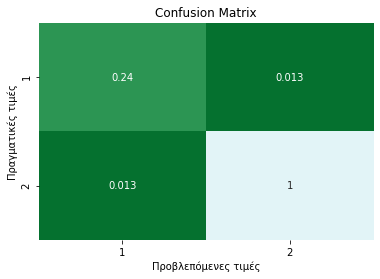


Macro avg f1 score: 96.875%
Accuracy(micro avg) f1 score: 98.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'pca__n_components': 25}

Input > Standard scaling > Undersampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 7.251559019088745 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        60
           2       0.96      0.96      0.96       240

    accuracy                           0.94       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.94      0.94      0.94       300



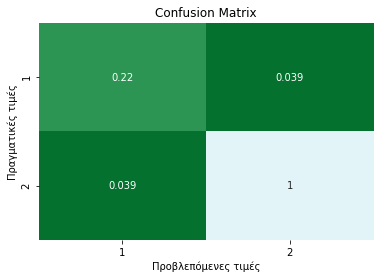


Macro avg f1 score: 90.625%
Accuracy(micro avg) f1 score: 94.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'pca__n_components': 25}

Input > Minmax scaling > Undersampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 11.994322299957275 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.87      0.75      0.80        60
           2       0.94      0.97      0.95       240

    accuracy                           0.93       300
   macro avg       0.90      0.86      0.88       300
weighted avg       0.92      0.93      0.92       300



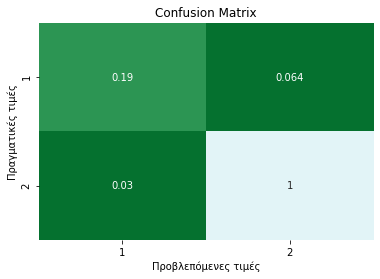


Macro avg f1 score: 87.92447306791568%
Accuracy(micro avg) f1 score: 92.66666666666666%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'pca__n_components': 100}

Input > Oversampling > PCA
***************************************************************
* Συνολικός χρόνος fit και predict: 3.919989824295044 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.55      0.62      0.58        60
           2       0.90      0.88      0.89       240

    accuracy                           0.82       300
   macro avg       0.73      0.75      0.74       300
weighted avg       0.83      0.82      0.83       300



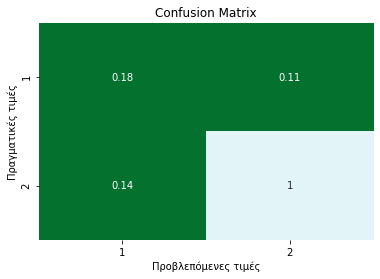


Macro avg f1 score: 73.53132126983071%
Accuracy(micro avg) f1 score: 82.33333333333334%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'pca__n_components': 50}

Input > Undersampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 1.8399922847747803 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.39      0.73      0.51        60
           2       0.91      0.71      0.80       240

    accuracy                           0.71       300
   macro avg       0.65      0.72      0.65       300
weighted avg       0.81      0.71      0.74       300



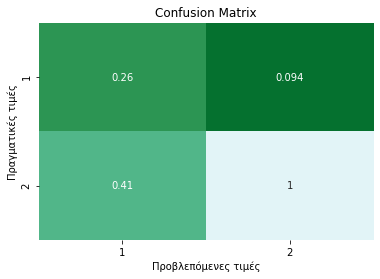


Macro avg f1 score: 65.19345960822405%
Accuracy(micro avg) f1 score: 71.33333333333334%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'pca__n_components': 100}

Input > Minmax scaling > Undersampling > PCA
****************************************************************
* Συνολικός χρόνος fit και predict: 12.168955564498901 seconds *
****************************************************************
              precision    recall  f1-score   support

           1       0.88      0.77      0.82        60
           2       0.94      0.97      0.96       240

    accuracy                           0.93       300
   macro avg       0.91      0.87      0.89       300
weighted avg       0.93      0.93      0.93       300



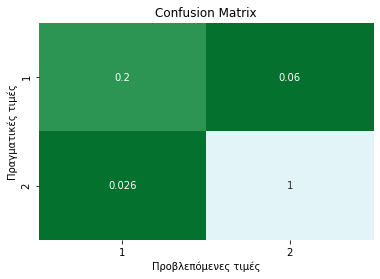


Macro avg f1 score: 89.02224824355973%
Accuracy(micro avg) f1 score: 93.33333333333333%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000, 'pca__n_components': 100}



In [33]:
macro_scores = []
micro_scores = []
names = []

xxx = all_combinations()
for code in xxx:
  name, steps, indic = create_names_steps_dict(code, [0, 10000, 20000, 30000], [25, 50, 100])
  indic['classifier__hidden_layer_sizes'] = [(120,)]
  indic['classifier__max_iter'] = [5000]
  indic['classifier__alpha'] = [0.1]
  
  pprint(name)

  macro, micro = estimation(mlp, steps, trimmed_X_train, bin_trimmed_y_train, trimmed_X_test, bin_trimmed_y_test, cval=5, in_dict=indic, mem='tmp')
  macro_scores.append(macro)
  micro_scores.append(micro)
  names.append(name)

Παρακάτω παρουσιάζουμε τα αποτελέσματα των αρχιτεκτονικών σε ένα bar plot.

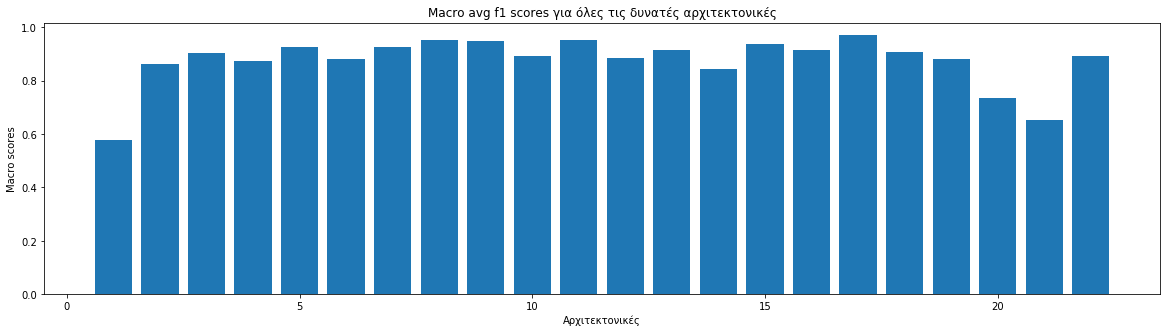

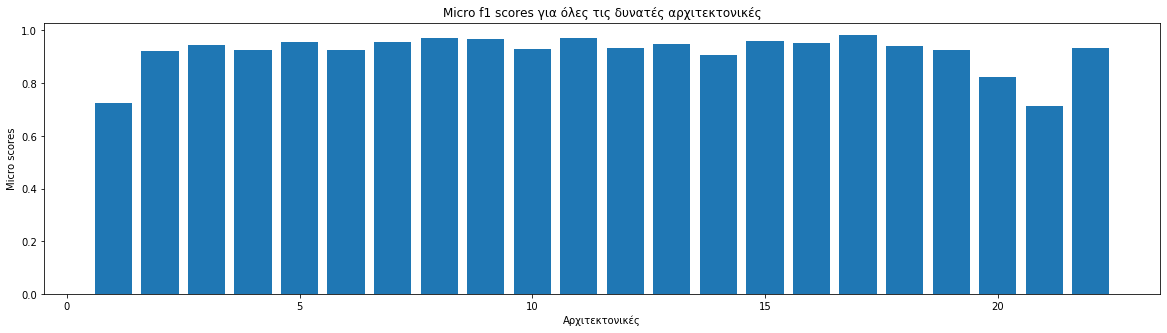


Υπόμνημα
1) Κανένα στάδιο προεπεξεργασίας
2) Input > Variance Threshold > Standard scaling
3) Input > Variance Threshold > Minmax scaling
4) Input > Variance Threshold > Standard scaling > Oversampling
5) Input > Variance Threshold > Minmax scaling > Oversampling
6) Input > Variance Threshold > Standard scaling > Undersampling
7) Input > Variance Threshold > Minmax scaling > Undersampling
8) Input > Variance Threshold > Standard scaling > Oversampling > PCA
9) Input > Variance Threshold > Minmax scaling > Oversampling > PCA
10) Input > Variance Threshold > Standard scaling > Undersampling > PCA
11) Input > Variance Threshold > Minmax scaling > Undersampling > PCA
12) Input > Standard scaling > Oversampling
13) Input > Minmax scaling > Oversampling
14) Input > Standard scaling > Undersampling
15) Input > Minmax scaling > Undersampling
16) Input > Standard scaling > Oversampling > PCA
17) Input > Minmax scaling > Oversampling > PCA
18) Input > Standard scaling > Undersampling > PCA
19) 

In [34]:
print_results(names, macro_scores, micro_scores)

---

Παρατηρούμε ότι η μέθοδος διαχωρισμού του συνολικού dataset σε δύο κατηγορίες(εξόδους) βγάζει πολύ καλύτερες προβλέψεις απ’ότι με πέντε. Με βάση αυτή την παρατήρηση και τα παραπάνω αποτελέσματα έχουμε ότι η καλύτερη αρχιτεκτονική είναι η _Input > Minmax scaling > Oversampling > PCA_ . Οι υπερπαράμετροι των μετασχηματιστών είναι 'pca__n_components': 25}. Οι υπερπαράμτεροι του ταξινομητή είναι {'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (120,), 'classifier__max_iter': 5000}.

---

###**Progressive Optimization**

Παρατηρούμε ότι το PCA έχει λάβει την ελάχιστη τιμή των 25 components, οπότε θεωρητικά δεν επιδέχεται βελτίωσης.

1) Ως πρώτο βήμα θα προσπαθήσουμε να βελτιστοποιήσουμε το πλήθος των νευρώνων-κόμβων του hidden layer του MLP για ακόμα μια φορά.

***************************************************************
* Συνολικός χρόνος fit και predict: 146.1736080646515 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.97      0.93      0.95        60
           2       0.98      0.99      0.99       240

    accuracy                           0.98       300
   macro avg       0.97      0.96      0.97       300
weighted avg       0.98      0.98      0.98       300



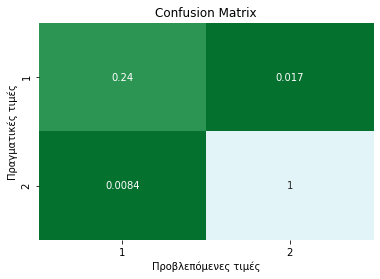


Macro avg f1 score: 96.83522047963993%
Accuracy(micro avg) f1 score: 98.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.1, 'classifier__hidden_layer_sizes': (126,), 'classifier__max_iter': 5000, 'pca__n_components': 25}



In [35]:
mlp_layers = [(i,) for i in range(110, 131)]

_, steps, indic = create_names_steps_dict("mmx|osm|pca", pca_n_components=[25])
indic['classifier__hidden_layer_sizes'] = mlp_layers
indic['classifier__max_iter'] = [5000]
indic['classifier__alpha'] = [0.1]
_, _ = estimation(mlp, steps, trimmed_X_train, bin_trimmed_y_train, trimmed_X_test, bin_trimmed_y_test, cval=5, in_dict=indic, mem='tmp')

---

Προκύπτει από την αναφορά ότι το βέλτιστο **πλήθος  perceptrons στο hidden layer είναι 126**.

---

2) Θα επανεξετάσουμε όπως και πριν την τιμή της υπερπαραμέτρου άλφα του MLP για να βρούμε τη βέλτιστη μέσα σε ένα έυρος εμπιστοσύνης.

***************************************************************
* Συνολικός χρόνος fit και predict: 50.20204019546509 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.98      0.88      0.93        60
           2       0.97      1.00      0.98       240

    accuracy                           0.97       300
   macro avg       0.98      0.94      0.96       300
weighted avg       0.97      0.97      0.97       300



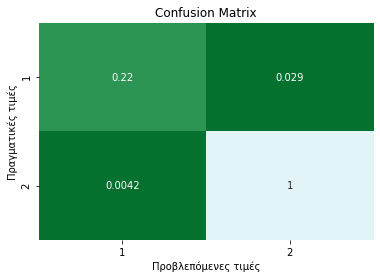


Macro avg f1 score: 95.66818280268573%
Accuracy(micro avg) f1 score: 97.33333333333334%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.2, 'classifier__hidden_layer_sizes': (126,), 'classifier__max_iter': 5000, 'pca__n_components': 25}



In [37]:
mlp_alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

_, steps, indic = create_names_steps_dict("mmx|osm|pca", pca_n_components=[25])
indic['classifier__hidden_layer_sizes'] = [(126,)]
indic['classifier__max_iter'] = [5000]
indic['classifier__alpha'] = mlp_alphas
_, _ = estimation(mlp, steps, trimmed_X_train, bin_trimmed_y_train, trimmed_X_test, bin_trimmed_y_test, cval=5, in_dict=indic, mem='tmp')

---

Άρα σύμφωνα με την αναφορά η βέλτιστη τιμή του **άλφα είναι 0.2**.

---

3) Επαναλαμβάνουμε τα ευρήματά μας για επαλήθευση τους.

***************************************************************
* Συνολικός χρόνος fit και predict: 8.655398845672607 seconds *
***************************************************************
              precision    recall  f1-score   support

           1       0.96      0.88      0.92        60
           2       0.97      0.99      0.98       240

    accuracy                           0.97       300
   macro avg       0.97      0.94      0.95       300
weighted avg       0.97      0.97      0.97       300



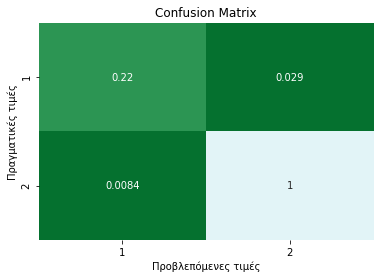


Macro avg f1 score: 95.15912147019274%
Accuracy(micro avg) f1 score: 97.0%

Βέλτιστες τιμές υπερπαραμέτρων:
{'classifier__alpha': 0.2, 'classifier__hidden_layer_sizes': (126,), 'classifier__max_iter': 5000, 'pca__n_components': 25}



In [40]:
_, steps, indic = create_names_steps_dict("mmx|osm|pca", pca_n_components=[25])
indic['classifier__hidden_layer_sizes'] = [(126,)]
indic['classifier__max_iter'] = [5000]
indic['classifier__alpha'] = [0.2]
_, _ = estimation(mlp, steps, trimmed_X_train, bin_trimmed_y_train, trimmed_X_test, bin_trimmed_y_test, cval=5, in_dict=indic, mem='tmp')

---

Βλέπουμε τελικά ότι η βέλτιστη αριχτεκτονική για δυαδική ταξινόμηση, με ταξινομητή τον MLP, είναι η _Input > Minmax scaling > Oversampling > PCA_ με:

1. hidden_layer_sizes = (126,), για MLP
2. max_iter = 5000, για MLP
3. alpha = 0.2, για MLP
4. n_components = 25, για PCA

ως βέλτιστες υπερπαραμέτρους.

Και scores:

1. F1-macro score: 95.16%
2. F1-micro score: 97.0%

**Δηλαδή, ακρίβεια των 97.0%**

---

# **Επίλογος**

Όπως προκύπτει από τα παραπάνω αποτελέσματα η αντιμετώπιση των δειγμάτων αυτού του dataset ως πρόβλημα δυαδικής ταξινόμησης οδηγεί σε μεγαλύτερα και καλύτερα ποσοστά επιτυχίας τους εκτιμητές, έναντι της περίπτωσης του να το αντιμετωπίση κανείς ως πρόβλημα ταξινόμησης σε 5 διαφορετικές κλάσεις. 

’’Δηλαδή αρκεί να το αντιμετωπίσει κάποιος ως dataset αναγνώρισης επιληπτικών κρίσεων και όχι ως dataset καταγραφής σημάτων του εγκεφάλου για 5 διαφορετικές περιπτώσεις-καταστάσεις του ασθενή.’’